# **0. Introduction**

This notebook embarks on an analytical journey through the realm of energy forecasting within the Spanish market, employing a dataset that encompasses the energy demand and prices from 2015 to 2018, alongside climatic data from Spain's principal cities. Our challenge, presented by IBM and Blue Tab, is not merely to predict energy prices with precision but also to comprehend the intricate factors that sway these figures.

**Challenge Overview**

The energy sector's landscape is perpetually in flux, with demand forecasting and price dynamics at its core. A profound understanding of these elements is paramount for judicious resource allocation and sagacious decision-making. The essence of this challenge lies in the meticulous exploration and analysis of the data at hand, aiming to achieve the following objectives:

1. *Exploratory Data Analysis (EDA)*: We shall commence with an EDA to acquaint ourselves with the dataset's nuances, investigating correlations, and scrutinizing the factors that mold energy prices.

2. *Predictive Modeling:* The crux of the challenge is to forecast energy prices effectively. We will be crafting and refining predictive models that not only forecast but also elucidate their utility in real-world scenarios.

3. *Advanced Analysis:* Beyond the surface-level examination, we delve into advanced exploratory analysis to affirm data integrity and lay a robust foundation for subsequent predictive modeling and interpretation.

# **1. Exploratory Analysis**

To lay the groundwork for an insightful EDA, we begin by configuring our environment and loading the necessary libraries. This preparatory step ensures that our data analysis proceeds without hitches and that the results are visualized effectively.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/My Drive/IBM Capstone Project/Data')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/IBM Capstone Project/Data'

## **1.1 ENERGY DATASET**

The energy dataset contains a detailed compendium of electricity generation and pricing information specific to the Spanish market, spanning from 2015 to 2018. It comprises hourly records, each offering a snapshot of various energy generation sources and the corresponding prices.

**Structure and Contents:**
The dataset encapsulates 29 columns and 35,064 entries, each entry indexed by the 'time' column, which is localized to Central European Time (CET). The dataset primarily consists of floating-point numbers, with the exception of the 'time' column, which is an object type (likely strings representing datetime objects).

**Generation Data:**
The generation data provides insights into the electricity output from a multitude of sources, including but not limited to:

- Renewable sources like biomass, solar, and wind (both offshore and onshore).
- Fossil fuels such as gas, hard coal, brown coal/lignite, oil, and derivatives like coal gas, oil shale, and peat.
- Nuclear energy and other less common sources like geothermal and marine.
These figures are given in megawatts (MW), reflecting the generation capacity at each given hour.

**Storage and Consumption:**
Hydroelectric power, a significant component of renewable energy, is represented in various forms, including run-of-river, reservoir-based, and pumped storage consumption data. These also serve as indicators of energy storage and regulation capabilities.

**Pricing and Forecasting:**
Price data is provided in two forms: the day-ahead price forecast (an estimation of energy costs for the following day) and the actual price realized. Both are essential for understanding market dynamics and are presented in euros per megawatt-hour (EUR/MWh).

The dataset also includes forecasts for solar and wind energy generation, crucial for anticipating supply fluctuations and integrating renewable sources into the energy grid efficiently.

**Completeness and Potential Issues:**
Upon inspection, certain columns like 'generation hydro pumped storage aggregated' and 'forecast wind offshore eday ahead' contain no non-null values, indicating potential gaps in the dataset. Such missing data points could pose challenges for comprehensive analysis and modeling efforts.

In [2]:
energy = pd.read_csv('energy_dataset.csv')

In [3]:
energy.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   generation hydro pumped storage aggregated  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation marine  generation nuclear  \
0                            1899.0                0.0              7096.0   
1                            1658.0                0.0              7096.0   
2                            1371.0                0.0              7099.0   
3                             779.0                0.0              7098.0   
4                             720.0                0.0              7097.0   

   generation other  generation other renewable  generation solar  \
0              43.0                        73.0              49.0   
1              43.0                        71.0              50.0   
2              43.0                        73.0              50.0   
3              43.0                        75.0              50.0   
4              43.0                        74.0              42.0   

   generation waste  generation wind offshore  generation wind onshore  \
0             196.0                       0.0                   6378.0   
1             195.0                       0.0                   5890.0   
2             196.0                       0.0                   5461.0   
3             191.0                       0.0                   5238.0   
4             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offsh

In [4]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

Before starting the EDA, is crucial to perform some transformation over the data:

*Convert String to Datetime:*
The 'time' column is parsed into datetime objects with UTC as the timezone. This ensures that the time data is consistent and in a format that can be manipulated using datetime methods.

*Remove Timezone Information:*
The .dt.tz_localize(None) method is applied to remove timezone information. This is often necessary if the timezone does not impact the analysis or if you need to compare or merge with other data that lacks timezone specificity.

*Extract Time Components:*
Additional columns for the year, month, day, and hour are created by extracting these components from the 'time' column. These attributes are crucial for analyzing patterns and cycles in the data, such as:

- Yearly trends (e.g., increased consumption during specific years)
- Monthly seasonality (e.g., higher energy use in winter months)
- Daily patterns (e.g., peak consumption during certain hours of the day)
- Hourly fluctuations (e.g., differences in energy usage between day and night)

In [5]:
#TIME
energy['time'] = pd.to_datetime(energy['time'], utc=True)

# Remove timezone information
energy['time'] = energy['time'].dt.tz_localize(None)

energy['Year'] = energy['time'].dt.year
energy['Month'] = energy['time'].dt.month
energy['Day'] = energy['time'].dt.day
energy['Hour'] = energy['time'].dt.hour

# Extracting the day of the week, where Monday=1, Sunday=7
energy['Day_of_Week'] = energy['time'].dt.dayofweek + 1

### **1.1.1 Data cleaning**

We will also check for null values in the entire energy dataset, and then will define a strategy to handle them

In [6]:
energy.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

And also will check for those columns that have just zeros, so they do not add any additional information

In [7]:
energy.describe()

time  generation biomass  \
count                35064        35045.000000   
mean   2016-12-31 10:30:00          383.513540   
min    2014-12-31 23:00:00            0.000000   
25%    2016-01-01 04:45:00          333.000000   
50%    2016-12-31 10:30:00          367.000000   
75%    2017-12-31 16:15:00          433.000000   
max    2018-12-31 22:00:00          592.000000   
std                    NaN           85.353943   

       generation fossil brown coal/lignite  \
count                          35046.000000   
mean                             448.059208   
min                                0.000000   
25%                                0.000000   
50%                              509.000000   
75%                              757.000000   
max                              999.000000   
std                              354.568590   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   
std                                   0.0            2201.830478   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   
std                    1961.601013              52.520673   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   
std                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  \
count                35046.0                                         0.0   
mean                     0.0                                         NaN   
min                      0.0                                         NaN   
25%                      0.0                                         NaN   
50%                      0.0                                         NaN   
75%                      0.0                                         NaN   
max                      0.0                                         NaN   
std                      0.0                                         NaN   

       generation hydro pumped storage consumption  \
count                                 35045.000000   
mean                                    475.577343   
min                                       0.000000   
25%                                       0.000000   
50%                                      68.000000   
75%                                     616.000000   
max                                    4523.000000   
std                                     792.406614   

       generation hydro run-of-river and poundage  \
count                                35045.000000   
mean                                   972.116108   
min                                      0.000000   
25%                                    63

Dropping these columns simplifies the dataset, allowing for more focused analysis on the relevant features. It's a crucial step to ensure the efficiency of subsequent data processing and modeling tasks by removing features that do not contribute to the analysis or might introduce noise.

In [8]:
#drop the columns with no data (Nulls or zeros)
energy = energy.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead', 'generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation wind offshore', "generation marine"], axis=1)


Identifying the distribution and pattern of null values within a dataset is a crucial step in data preprocessing and cleaning. Null values can arise due to various reasons, such as errors in data collection, transmission losses, or simply because the information was not recorded. The approach to handling these null values significantly impacts the subsequent analysis and modeling phases, making it essential to carefully consider the context and nature of these missing entries

In [9]:
#Diving into the nulls
columns_to_check = ['generation biomass',
                    'generation fossil brown coal/lignite',
                    'generation fossil gas',
                    'generation fossil hard coal',
                    'generation fossil oil',
                    'generation hydro pumped storage consumption',
                    'generation hydro run-of-river and poundage',
                    'generation hydro water reservoir',
                    'generation nuclear',
                    'generation other',
                    'generation other renewable',
                    'generation solar',
                    'generation waste',
                    'generation wind onshore',
                    'total load actual'
                    ]


null_rows = energy.loc[energy[columns_to_check].isnull().any(axis=1)]
null_rows

time  generation biomass  \
99    2015-01-05 02:00:00                 NaN   
108   2015-01-05 11:00:00                 NaN   
109   2015-01-05 12:00:00                 NaN   
110   2015-01-05 13:00:00                 NaN   
111   2015-01-05 14:00:00                 NaN   
112   2015-01-05 15:00:00                 NaN   
113   2015-01-05 16:00:00                 NaN   
451   2015-01-19 18:00:00                 NaN   
452   2015-01-19 19:00:00                 NaN   
643   2015-01-27 18:00:00                 NaN   
661   2015-01-28 12:00:00                 NaN   
751   2015-02-01 06:00:00               449.0   
752   2015-02-01 07:00:00               453.0   
753   2015-02-01 08:00:00               452.0   
756   2015-02-01 11:00:00               405.0   
757   2015-02-01 12:00:00               402.0   
758   2015-02-01 13:00:00               400.0   
759   2015-02-01 14:00:00               393.0   
760   2015-02-01 15:00:00               413.0   
761   2015-02-01 16:00:00               465.0   
762   2015-02-01 17:00:00               482.0   
763   2015-02-01 18:00:00               474.0   
2258  2015-04-05 01:00:00               371.0   
2528  2015-04-16 07:00:00                 NaN   
2623  2015-04-20 06:00:00               424.0   
2708  2015-04-23 19:00:00                 NaN   
2913  2015-05-02 08:00:00               497.0   
3554  2015-05-29 01:00:00               569.0   
3968  2015-06-15 07:00:00                 NaN   
6583  2015-10-02 06:00:00               483.0   
6586  2015-10-02 09:00:00                 NaN   
8049  2015-12-02 08:00:00                 NaN   
11236 2016-04-13 03:00:00               220.0   
11524 2016-04-25 03:00:00               190.0   
11526 2016-04-25 05:00:00               206.0   
11902 2016-05-10 21:00:00               348.0   
12672 2016-06-11 23:00:00               356.0   
13341 2016-07-09 20:00:00                 NaN   
13391 2016-07-11 22:00:00               346.0   
15272 2016-09-28 07:00:00               347.0   
15982 2016-10-27 21:00:00               351.0   
16612 2016-11-23 03:00:00                 NaN   
25164 2017-11-14 11:00:00                 0.0   
25171 2017-11-14 18:00:00                 0.0   
30185 2018-06-11 16:00:00               331.0   
30896 2018-07-11 07:00:00                 NaN   

       generation fossil brown coal/lignite  generation fossil gas  \
99                                      NaN                    NaN   
108                                     NaN                    NaN   
109                                     NaN                    NaN   
110                                     NaN                    NaN   
111                                     NaN                    NaN   
112                                     NaN                    NaN   
113                                     NaN                    NaN   
451                                     NaN                    NaN   
452                                     NaN                    NaN   
643                                     NaN                    NaN   
661                                     NaN                    NaN   
751                                   312.0                 4765.0   
752                                   312.0                 4938.0   
753                                   302.0                 4997.0   
756                                   317.0                 5247.0   
757                                   317.0                 5449.0   
758                                   317.0                 5266.0   
759                                   321.0                 5209.0   
760                                   325.0                 5642.0   
761                                   321.0                 6127.0   
762                                   326.0                 7386.0   
763                                   326.0                 7963.0   
2258                                    0.0                 5015.0   
2528                                 

In [10]:
null_rows.shape

(46, 26)


The output null_rows.shape reveals that there are 46 rows with missing values across 25 columns in the dataset. This indicates that while the dataset is largely complete, there are some instances where data is absent for certain columns within these rows.

Ensuring each timestamp in your dataset is unique is crucial for maintaining data integrity, especially for time series analyses like energy consumption forecasting. Unique timestamps guarantee that each record is distinct, preventing skewed analyses due to duplicate entries. If duplicates are found, it's important to address them by removing or consolidating the entries to maintain accurate and reliable analyses. Additionally, verifying that the dataset spans the entire intended period without gaps ensures comprehensive coverage for your analysis, allowing for more accurate modeling and forecasting of energy consumption trends.

In [11]:
#Checking uniqueness of each row
if len(energy['time'].unique()) == len(energy):
    print("All timestamps are unique.")
else:
    print("There are duplicate timestamps.")

All timestamps are unique.


In [12]:
#Checking if all hours from 01-01-2015 to 31-12-2018 are included
# Generate a complete range of hourly timestamps
full_range = pd.date_range(start=energy['time'].min(), end=energy['time'].max(), freq='H')

# Check if all generated timestamps are in your dataframe
missing_timestamps = full_range[~full_range.isin(energy['time'])]

if len(missing_timestamps) == 0:
    print("No missing hourly records.")
else:
    print(f"Missing timestamps found: {missing_timestamps}")


No missing hourly records.


So we can conclude that our energy dataset is complete and has no duplicates

To address null values effectively, the strategy involves two main steps:

Rolling Average: Fill missing values with a rolling average calculated from the six nearest non-null values. This maintains the data's natural flow and accounts for short-term trends.

Backfilling: For any remaining nulls, fill them by propagating the next valid observation backwards. This ensures the dataset is complete, especially where the rolling average isn't applicable.

This approach helps in preserving the dataset's integrity, crucial for accurate analysis and predictions.

In [13]:
#Handling nulls
for column in columns_to_check:
    # Compute the rolling average using the last 6 non-NA values
    rolling_avg = energy[column].rolling(window=6, min_periods=1).mean()

    # Fill missing values with the computed rolling average
    energy[column] = energy[column].fillna(rolling_avg)

In [14]:
# Fill remaining missing values by propagating the next valid value backward
energy.fillna(method='bfill', inplace=True)

C:\Users\alfon\AppData\Local\Temp\ipykernel_14472\1454470746.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  energy.fillna(method='bfill', inplace=True)


In [15]:
energy.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual        

Setting time as the index would involve the command energy.set_index('time', inplace=True). This makes it easier to handle time series data, allowing you to slice the data by time intervals and use time-based indexing and resampling methods.

In [16]:
energy.set_index('time', inplace=True)

### **1.2.1 Visual data exploration**


array([[<Axes: title={'center': 'generation biomass'}>,
        <Axes: title={'center': 'generation fossil brown coal/lignite'}>,
        <Axes: title={'center': 'generation fossil gas'}>,
        <Axes: title={'center': 'generation fossil hard coal'}>,
        <Axes: title={'center': 'generation fossil oil'}>],
       [<Axes: title={'center': 'generation hydro pumped storage consumption'}>,
        <Axes: title={'center': 'generation hydro run-of-river and poundage'}>,
        <Axes: title={'center': 'generation hydro water reservoir'}>,
        <Axes: title={'center': 'generation nuclear'}>,
        <Axes: title={'center': 'generation other'}>],
       [<Axes: title={'center': 'generation other renewable'}>,
        <Axes: title={'center': 'generation solar'}>,
        <Axes: title={'center': 'generation waste'}>,
        <Axes: title={'center': 'generation wind onshore'}>,
        <Axes: title={'center': 'forecast solar day ahead'}>],
       [<Axes: title={'center': 'forecast wind o

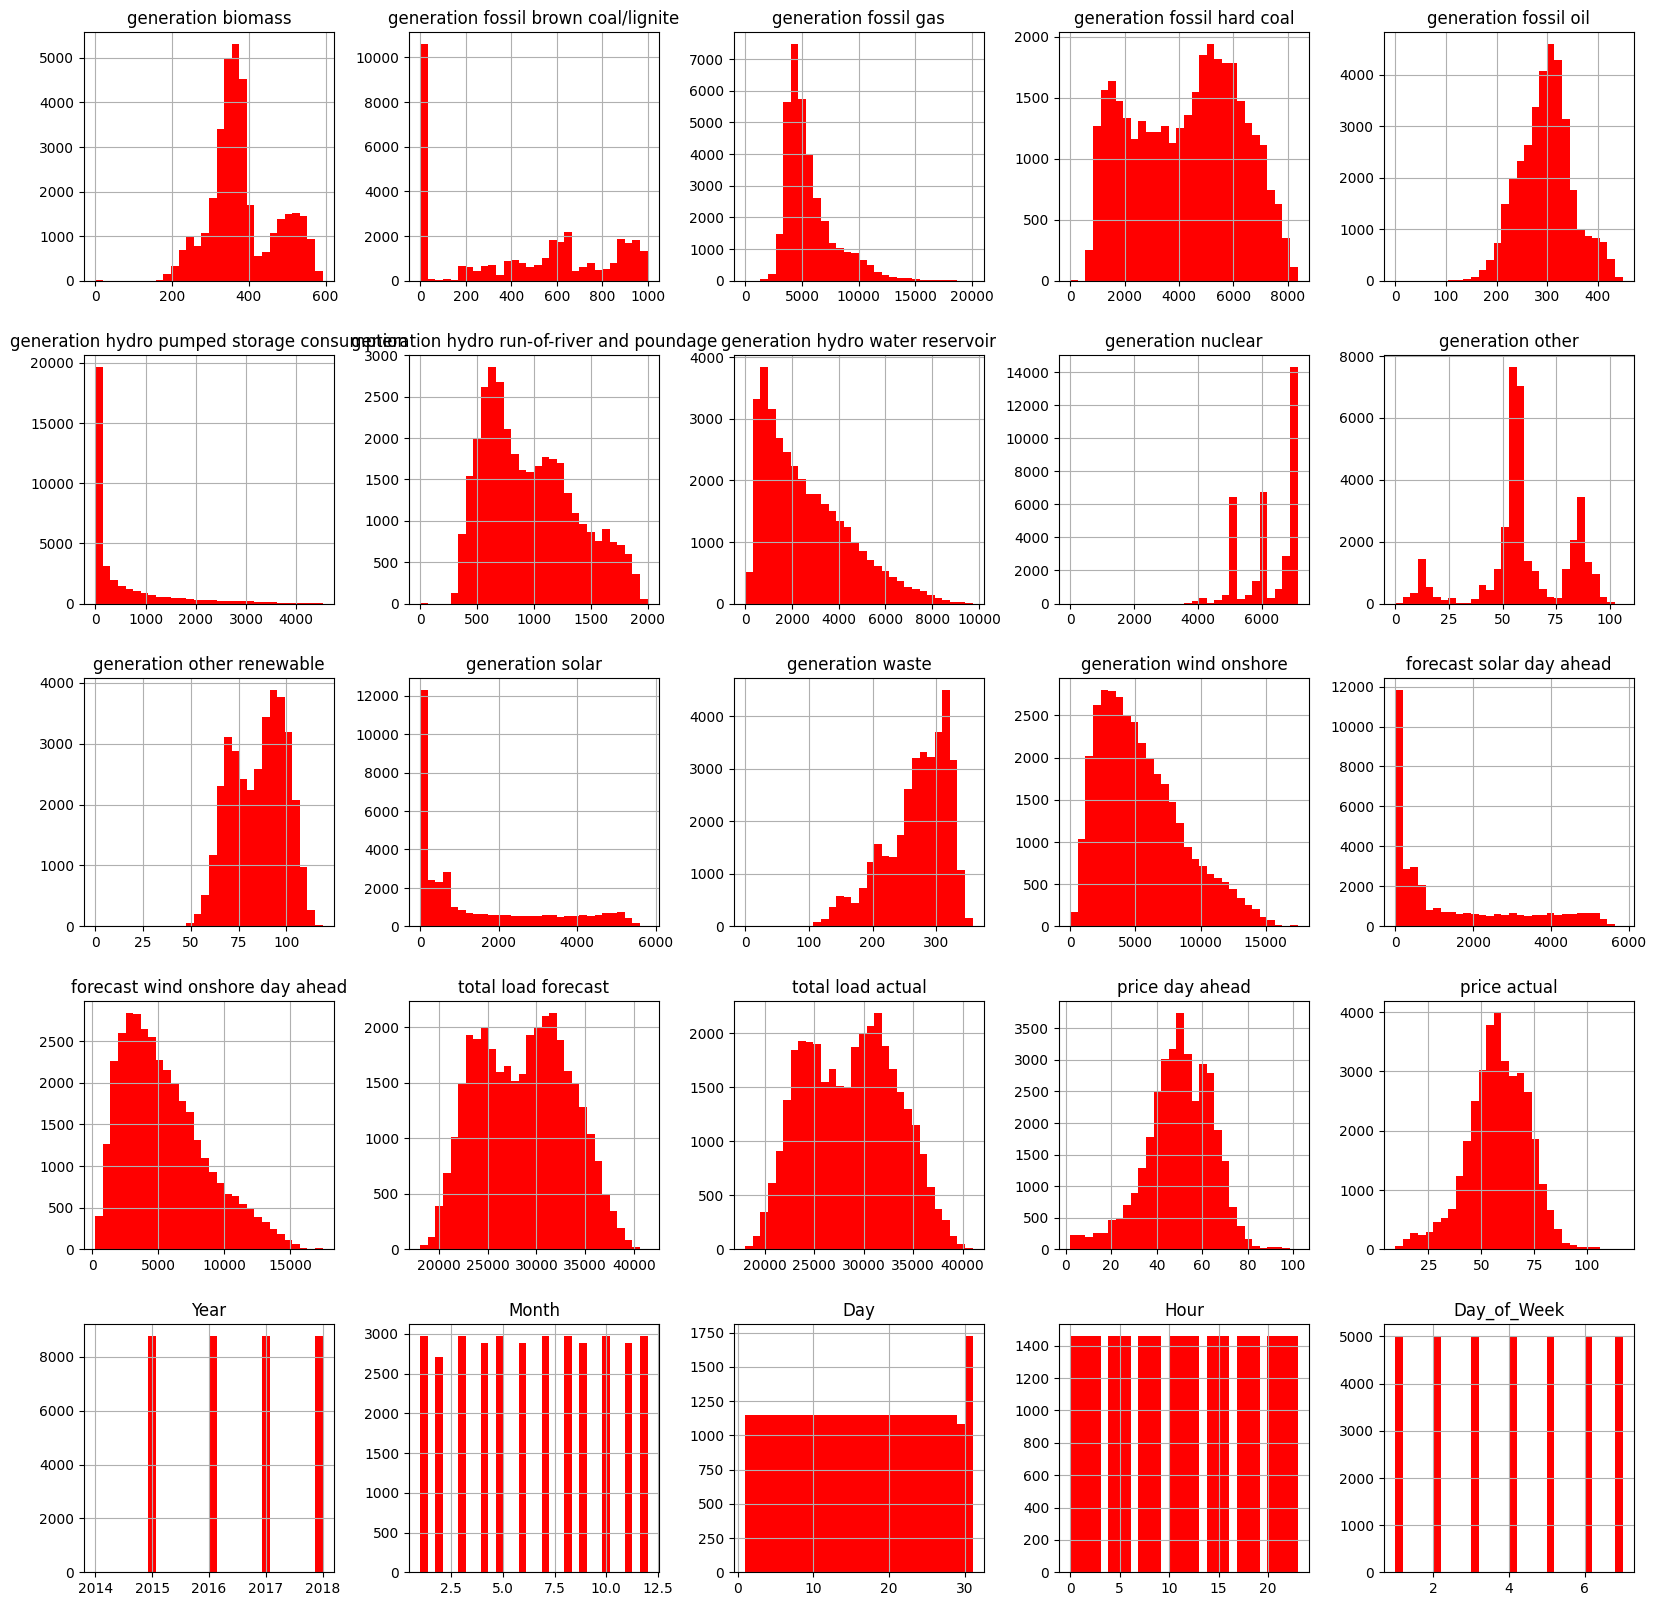

In [17]:
energy.hist(bins = 30, figsize = (20,20), color = 'r')

To understand the dynamics influencing electricity prices, we begin with a preliminary analysis focusing on the correlation between various features within our dataset and the actual electricity price, which is our target variable. Notably, the 'price day ahead'—the price predetermined by suppliers and retailers for energy consumption exhibits a significant correlation with our target. This correlation aligns with expectations due to the direct influence of anticipated energy costs on the actual market prices.

Further analysis reveals that fossil fuel-based energy sources also correlate strongly with actual electricity prices. To contextualize this finding, it is essential to grasp two key concepts: the mechanism of price setting in the electricity market and the phenomenon known as the 'thermal gap.'

Price Setting Mechanism: Electricity prices are determined 24 hours in advance based on the marginal costs of production sources. These sources are ranked by cost, from the lowest to the highest, and as demand intersects with this supply curve, the price is set. Consequently, the most cost-efficient energy sources, such as nuclear and renewables, are utilized first. Fossil fuels, being among the more expensive options, are typically brought in later to meet remaining demand, thus influencing the final price across the sector and providing a plausibble explanation to its high correlation.

Thermal Gap: This term refers to the disparity between the available capacity of cost-effective, non-fossil fuel energy sources and the total demand. When this gap widens, more expensive fossil fuel sources are required to meet demand, driving up the overall cost of electricity.

Understanding these concepts is pivotal in explaining the observed high correlation between fossil fuel usage and electricity prices. It underscores the role of production cost hierarchy and demand-supply dynamics in shaping market prices, particularly highlighting how reliance on costlier fossil fuels during peak demand periods or capacity shortfalls can significantly affect electricity pricing


In [18]:
corr_matrix = energy.corr()
corr_matrix["price actual"].sort_values(ascending=False)

price actual                                   1.000000
price day ahead                                0.732155
generation fossil hard coal                    0.465611
generation fossil gas                          0.461275
total load forecast                            0.435864
total load actual                              0.435336
generation fossil brown coal/lignite           0.363968
generation fossil oil                          0.284942
Month                                          0.281219
generation other renewable                     0.255480
Hour                                           0.237381
generation waste                               0.168667
Year                                           0.142870
generation biomass                             0.142652
forecast solar day ahead                       0.101402
generation other                               0.099884
generation solar                               0.098556
generation hydro water reservoir               0

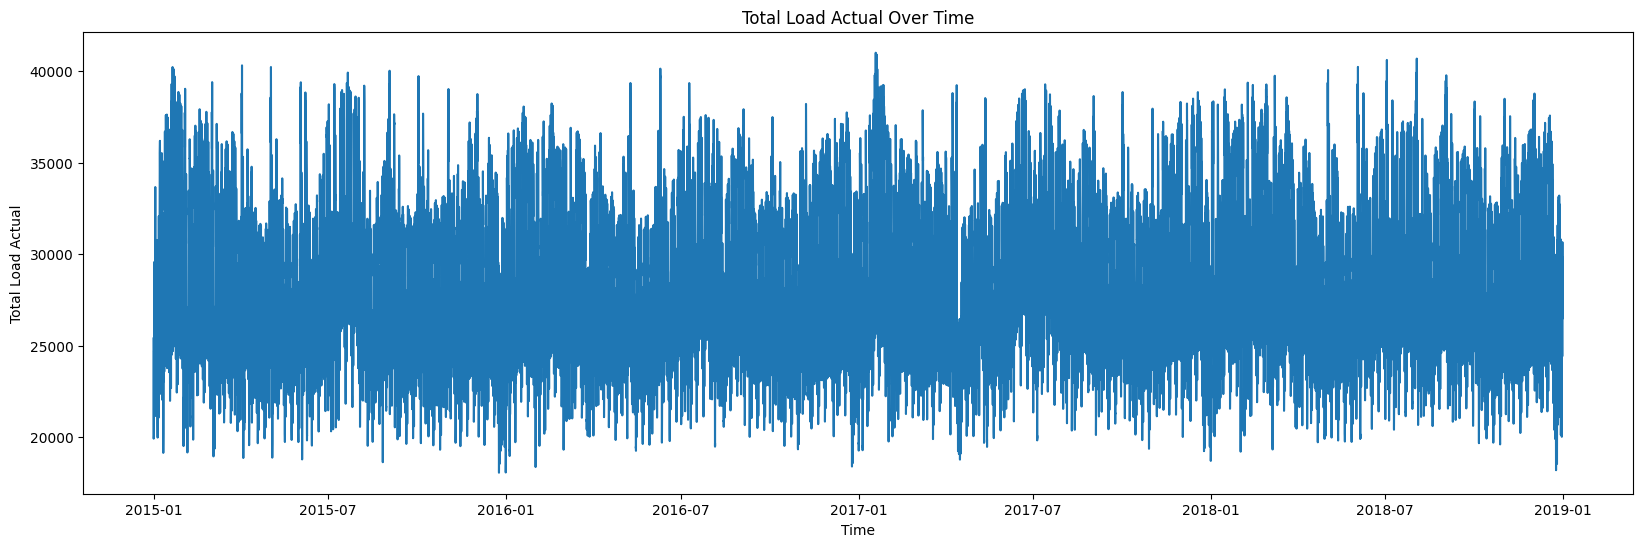

In [19]:
# Plotting the actual total load over time
plt.figure(figsize=(20, 6))
plt.plot(energy.index, energy['total load actual'])
plt.title('Total Load Actual Over Time')
plt.xlabel('Time')
plt.ylabel('Total Load Actual')
plt.show()

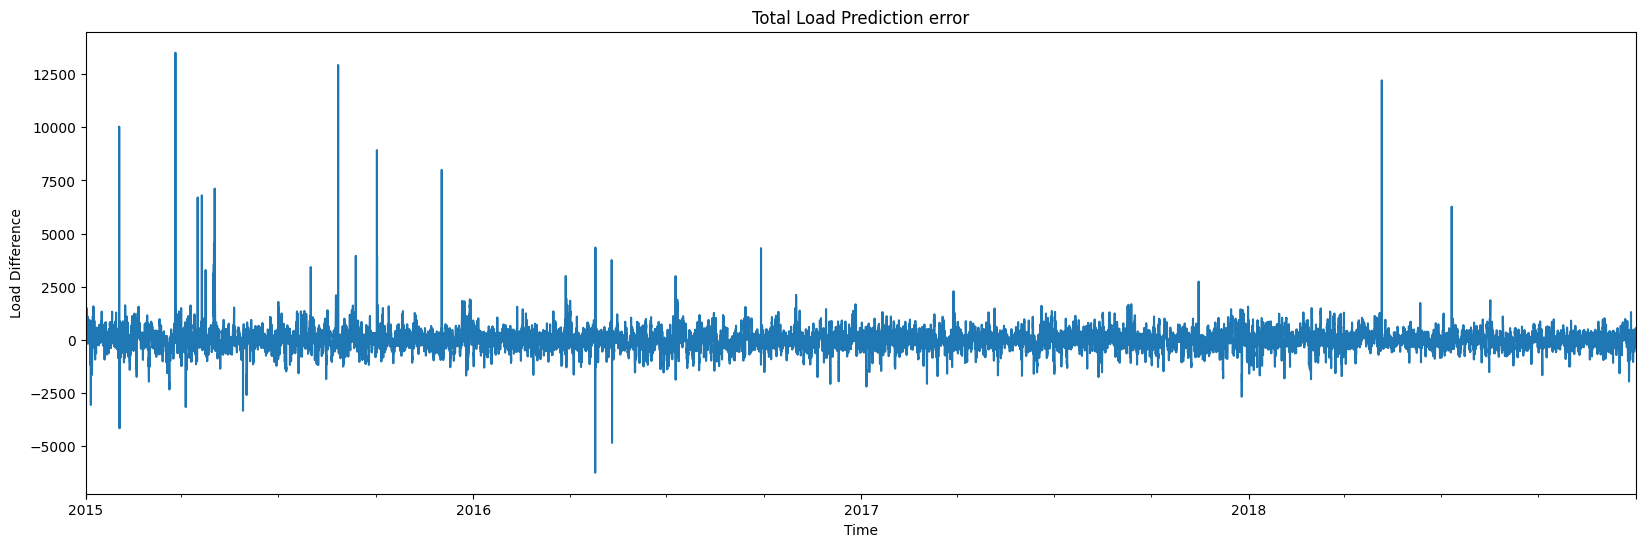

In [20]:
# Load Difference Analysis
energy['load prediction error'] = energy['total load forecast'] - energy['total load actual']

# Plotting the load difference
energy['load prediction error'].plot(figsize=(20, 6))
plt.title('Total Load Prediction error')
plt.xlabel('Time')
plt.ylabel('Load Difference')
plt.show()

The current model's high accuracy in predicting load, with a yearly MAPE between 0.93% and 1.32%, underscores its effectiveness in forecasting electricity demand. This level of predictability is vital for operational planning and enhancing efficiency within the energy sector. It suggests that, while predicting consumption levels for the following day is relatively straightforward, accurately estimating the supply mix and resulting price poses a greater challenge. This discrepancy underscores the complexity of the energy market, where supply dynamics, influenced by various generation sources and market conditions, significantly impact price determination. Thus, refining the predictive accuracy of supply mix and price remains a critical area for further research and model development.

In [21]:
# MAPE
mape_2015 = np.mean(np.abs(energy.loc[energy.index.year == 2015, 'load prediction error'] / energy.loc[energy.index.year == 2015, 'total load actual'])) * 100
mape_2016 = np.mean(np.abs(energy.loc[energy.index.year == 2016, 'load prediction error'] / energy.loc[energy.index.year == 2016, 'total load actual'])) * 100
mape_2017 = np.mean(np.abs(energy.loc[energy.index.year == 2017, 'load prediction error'] / energy.loc[energy.index.year == 2017, 'total load actual'])) * 100
mape_2018 = np.mean(np.abs(energy.loc[energy.index.year == 2018, 'load prediction error'] / energy.loc[energy.index.year == 2018, 'total load actual'])) * 100

print (f'mape 2015: {mape_2015} %')
print (f'mape 2016: {mape_2016} %')
print (f'mape 2017: {mape_2017} %')
print (f'mape 2018: {mape_2018} %')

mape 2015: 1.3222262120469137 %
mape 2016: 1.1051840818835743 %
mape 2017: 1.076894949712977 %
mape 2018: 0.9285410403534397 %


The analysis indicates that the predicted day-ahead price often underestimates the actual price, as observed from the instances where the predicted values (blue) fall below the actual values (orange). This pattern suggests a systematic bias in the forecasting model towards lower prices, highlighting an area for improvement in accurately anticipating market fluctuations.

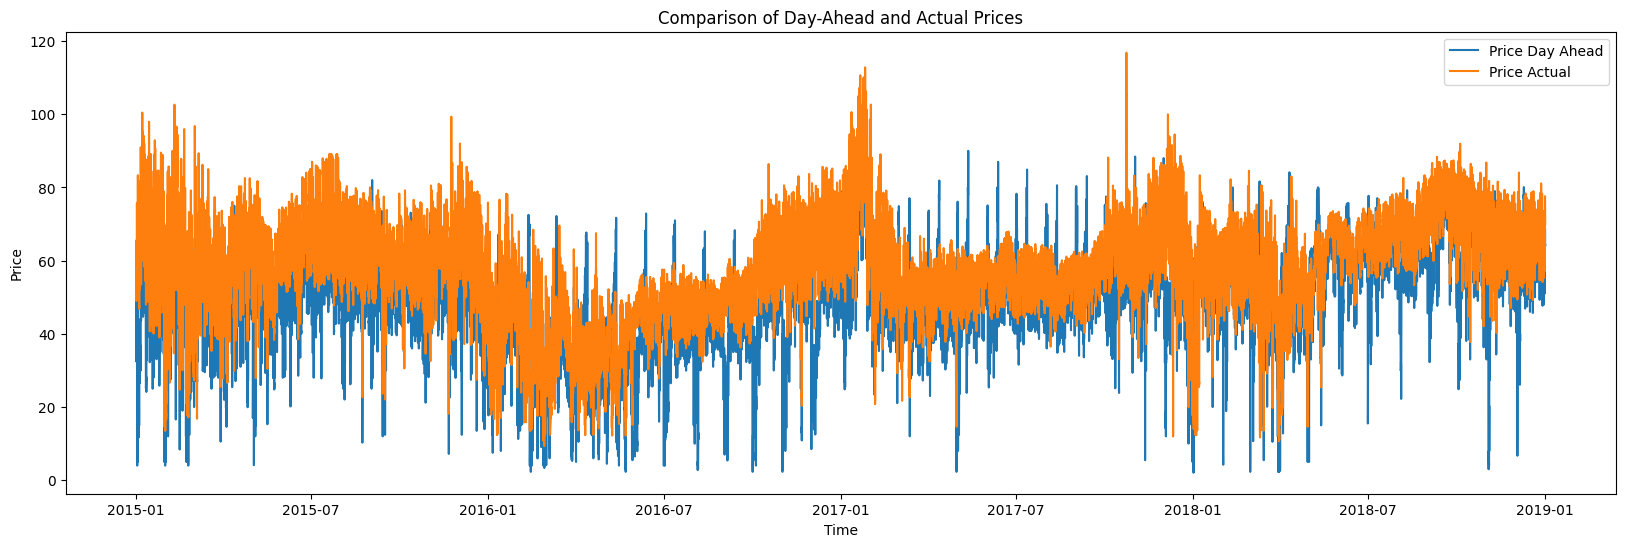

In [22]:
# Price Analysis: to compare forecasted and actual prices over time.
plt.figure(figsize=(20, 6))
plt.plot(energy.index, energy['price day ahead'], label='Price Day Ahead')
plt.plot(energy.index, energy['price actual'], label='Price Actual')
plt.title('Comparison of Day-Ahead and Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

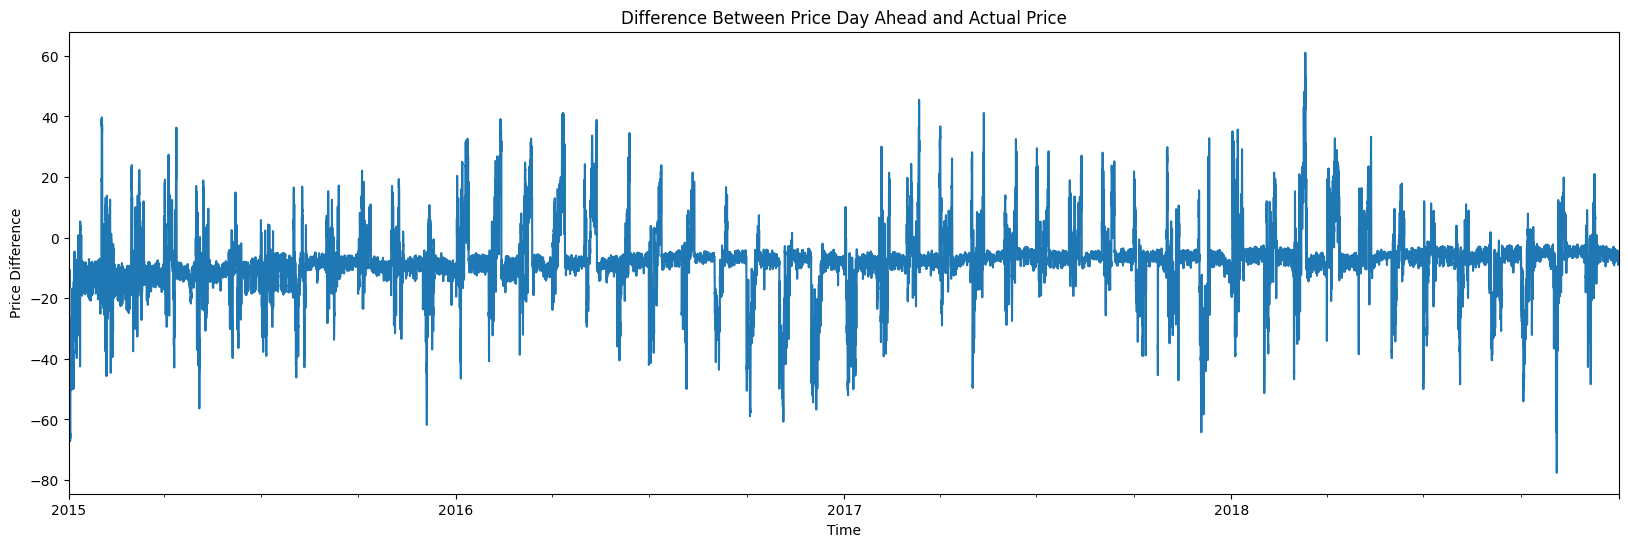

In [23]:
energy['price prediction error'] = energy['price day ahead'] - energy['price actual']

# Plotting the price difference
energy['price prediction error'].plot(figsize=(20, 6))
plt.title('Difference Between Price Day Ahead and Actual Price')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.show()

The challenge of price estimation presents a stark contrast to demand forecasting, with significantly higher errors observed. The annual Mean Absolute Percentage Error (MAPE) ranges from 15.85% to 27.16%, highlighting the complexities involved in accurately predicting energy prices. These figures set a benchmark for our predictive efforts, representing the target accuracy levels we aim to surpass. The larger error margins in price forecasting underscore the volatile nature of energy markets, where numerous unpredictable factors such as geopolitical events, changes in supply and demand, and regulatory changes can have a profound impact on prices

In [24]:
# MAPE
mape_2015 = np.mean(np.abs(energy.loc[energy.index.year == 2015, 'price prediction error'] / energy.loc[energy.index.year == 2015, 'price actual'])) * 100
mape_2016 = np.mean(np.abs(energy.loc[energy.index.year == 2016, 'price prediction error'] / energy.loc[energy.index.year == 2016, 'price actual'])) * 100
mape_2017 = np.mean(np.abs(energy.loc[energy.index.year == 2017, 'price prediction error'] / energy.loc[energy.index.year == 2017, 'price actual'])) * 100
mape_2018 = np.mean(np.abs(energy.loc[energy.index.year == 2018, 'price prediction error'] / energy.loc[energy.index.year == 2018, 'price actual'])) * 100

print (f'mape 2015: {mape_2015} %')
print (f'mape 2016: {mape_2016} %')
print (f'mape 2017: {mape_2017} %')
print (f'mape 2018: {mape_2018} %')

mape 2015: 20.655753514290122 %
mape 2016: 27.163370423634355 %
mape 2017: 16.31281468804739 %
mape 2018: 15.852792713658825 %


In [25]:
# MAPE for Solar Forecasts
solar_mape_2015 = np.mean(np.abs((energy.loc[energy.index.year == 2015, 'forecast solar day ahead'] - energy.loc[energy.index.year == 2015, 'generation solar']) / energy.loc[energy.index.year == 2015, 'generation solar'])) * 100
solar_mape_2016 = np.mean(np.abs((energy.loc[energy.index.year == 2016, 'forecast solar day ahead'] - energy.loc[energy.index.year == 2016, 'generation solar']) / energy.loc[energy.index.year == 2016, 'generation solar'])) * 100
solar_mape_2017 = np.mean(np.abs((energy.loc[energy.index.year == 2017, 'forecast solar day ahead'] - energy.loc[energy.index.year == 2017, 'generation solar']) / energy.loc[energy.index.year == 2017, 'generation solar'])) * 100
solar_mape_2018 = np.mean(np.abs((energy.loc[energy.index.year == 2018, 'forecast solar day ahead'] - energy.loc[energy.index.year == 2018, 'generation solar']) / energy.loc[energy.index.year == 2018, 'generation solar'])) * 100

# Print MAPE values
print(f'Solar MAPE 2015: {solar_mape_2015:.2f}%')
print(f'Solar MAPE 2016: {solar_mape_2016:.2f}%')
print(f'Solar MAPE 2017: {solar_mape_2017:.2f}%')
print(f'Solar MAPE 2018: {solar_mape_2018:.2f}%')

Solar MAPE 2015: 33.66%
Solar MAPE 2016: 34.99%
Solar MAPE 2017: inf%
Solar MAPE 2018: 58.90%


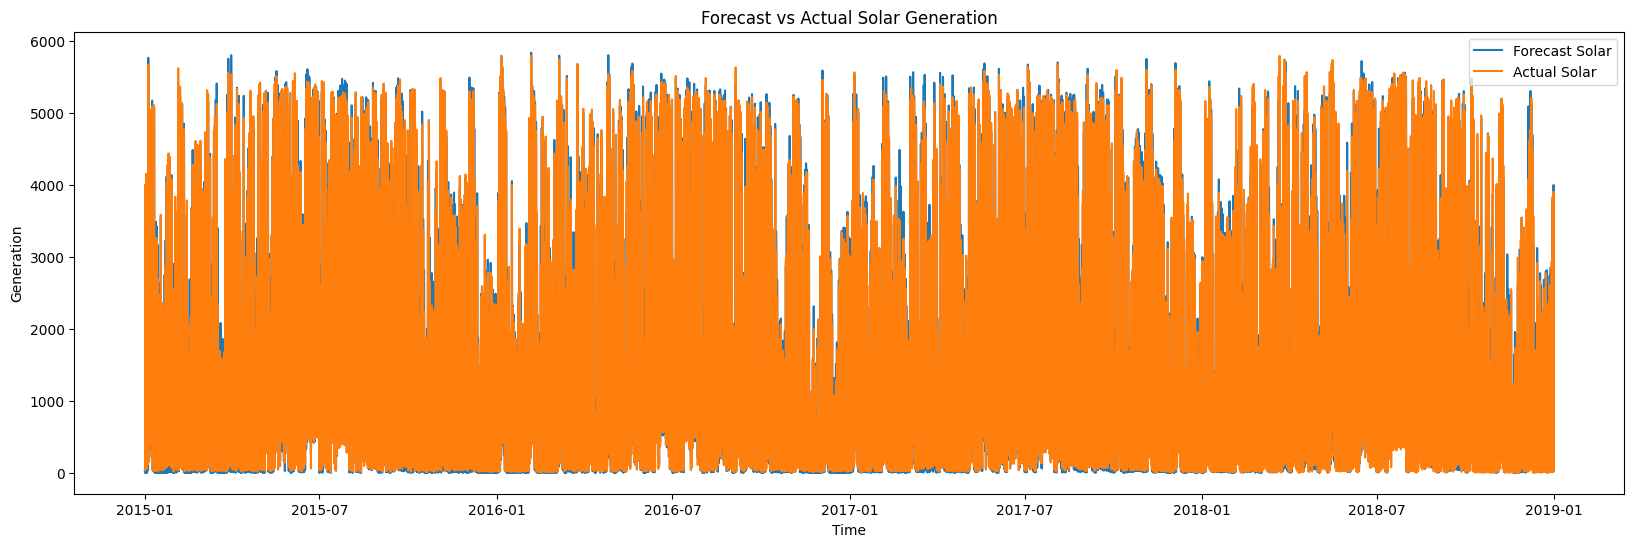

In [26]:
#Forecast vs Actual Analysis for solar
plt.figure(figsize=(20, 6))
plt.plot(energy.index, energy['forecast solar day ahead'], label='Forecast Solar')
plt.plot(energy.index, energy['generation solar'], label='Actual Solar')
plt.title('Forecast vs Actual Solar Generation')
plt.xlabel('Time')
plt.ylabel('Generation')
plt.legend()
plt.show()

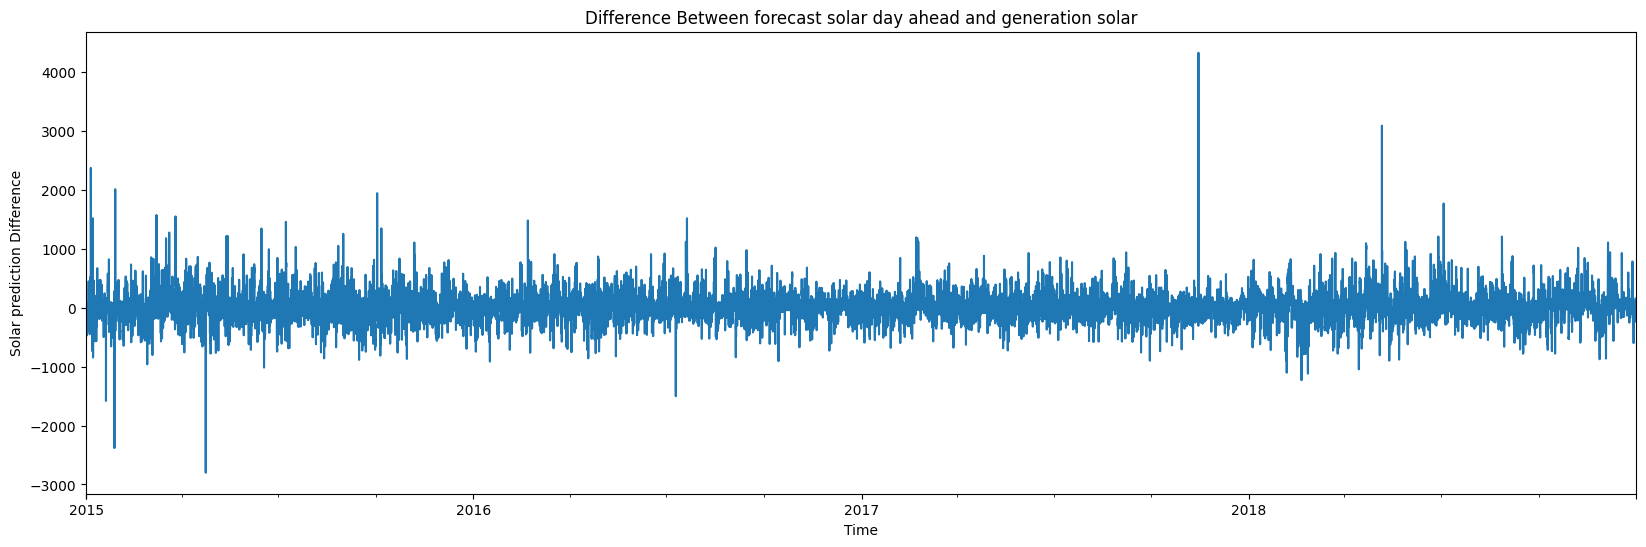

In [27]:
energy['solar prediction error'] = energy['forecast solar day ahead'] - energy['generation solar']

# Plotting the price difference
energy['solar prediction error'].plot(figsize=(20, 6))
plt.title('Difference Between forecast solar day ahead and generation solar')
plt.xlabel('Time')
plt.ylabel('Solar prediction Difference')
plt.show()

In [28]:
# MAPE for Wind Onshore Forecasts
wind_onshore_mape_2015 = np.mean(np.abs((energy.loc[energy.index.year == 2015, 'forecast wind onshore day ahead'] - energy.loc[energy.index.year == 2015, 'generation wind onshore']) / energy.loc[energy.index.year == 2015, 'generation wind onshore'])) * 100
wind_onshore_mape_2016 = np.mean(np.abs((energy.loc[energy.index.year == 2016, 'forecast wind onshore day ahead'] - energy.loc[energy.index.year == 2016, 'generation wind onshore']) / energy.loc[energy.index.year == 2016, 'generation wind onshore'])) * 100
wind_onshore_mape_2017 = np.mean(np.abs((energy.loc[energy.index.year == 2017, 'forecast wind onshore day ahead'] - energy.loc[energy.index.year == 2017, 'generation wind onshore']) / energy.loc[energy.index.year == 2017, 'generation wind onshore'])) * 100
wind_onshore_mape_2018 = np.mean(np.abs((energy.loc[energy.index.year == 2018, 'forecast wind onshore day ahead'] - energy.loc[energy.index.year == 2018, 'generation wind onshore']) / energy.loc[energy.index.year == 2018, 'generation wind onshore'])) * 100


print(f'Wind Onshore MAPE 2015: {wind_onshore_mape_2015:.2f}%')
print(f'Wind Onshore MAPE 2016: {wind_onshore_mape_2016:.2f}%')
print(f'Wind Onshore MAPE 2017: {wind_onshore_mape_2017:.2f}%')
print(f'Wind Onshore MAPE 2018: {wind_onshore_mape_2018:.2f}%')

Wind Onshore MAPE 2015: 2.23%
Wind Onshore MAPE 2016: 2.05%
Wind Onshore MAPE 2017: inf%
Wind Onshore MAPE 2018: 11.61%


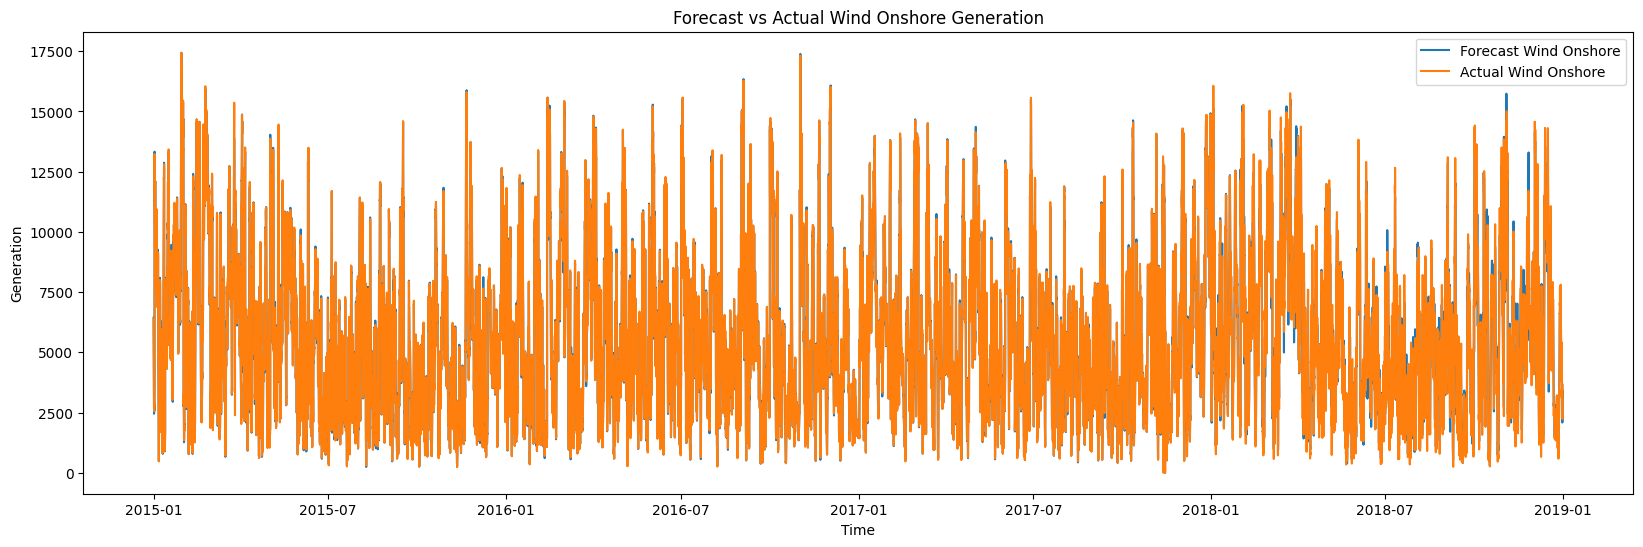

In [29]:
#Forecast vs Actual Analysis for Wind onshore
plt.figure(figsize=(20, 6))
plt.plot(energy.index, energy['forecast wind onshore day ahead'], label='Forecast Wind Onshore')
plt.plot(energy.index, energy['generation wind onshore'], label='Actual Wind Onshore')
plt.title('Forecast vs Actual Wind Onshore Generation')
plt.xlabel('Time')
plt.ylabel('Generation')
plt.legend()
plt.show()

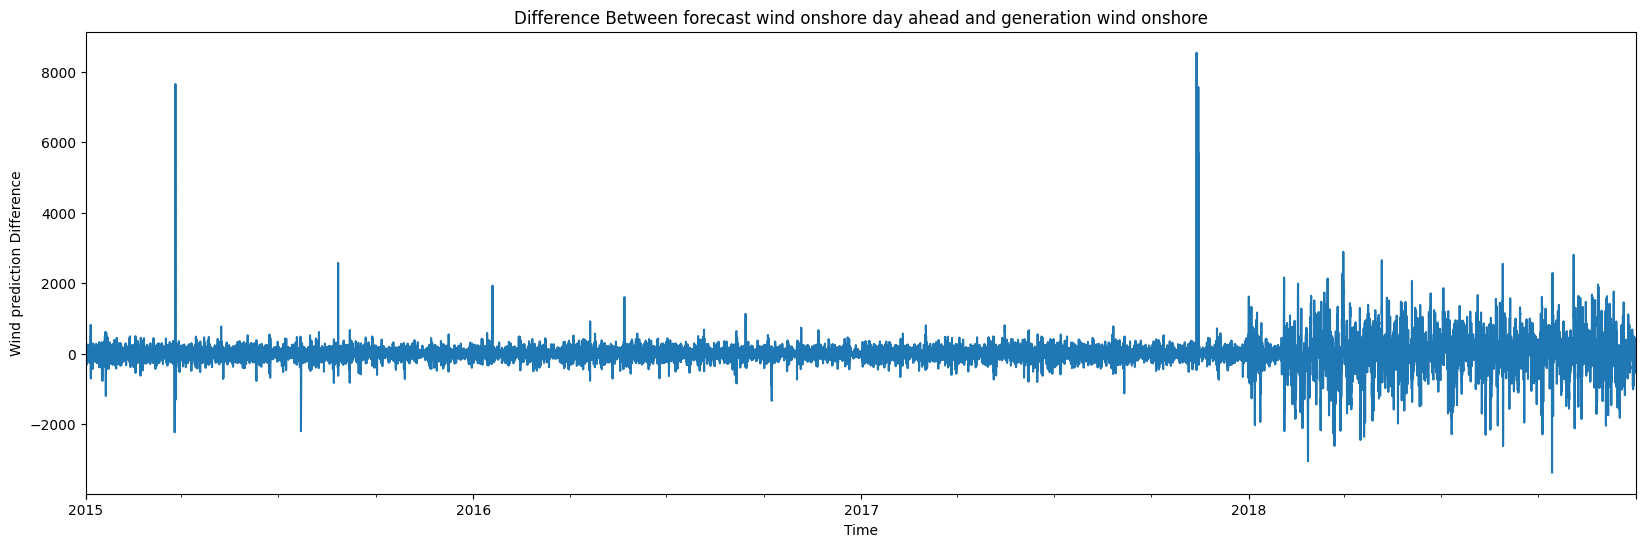

In [30]:
energy['wind prediction error'] = energy['forecast wind onshore day ahead'] - energy['generation wind onshore']

# Plotting the price difference
energy['wind prediction error'].plot(figsize=(20, 6))
plt.title('Difference Between forecast wind onshore day ahead and generation wind onshore')
plt.xlabel('Time')
plt.ylabel('Wind prediction Difference')
plt.show()

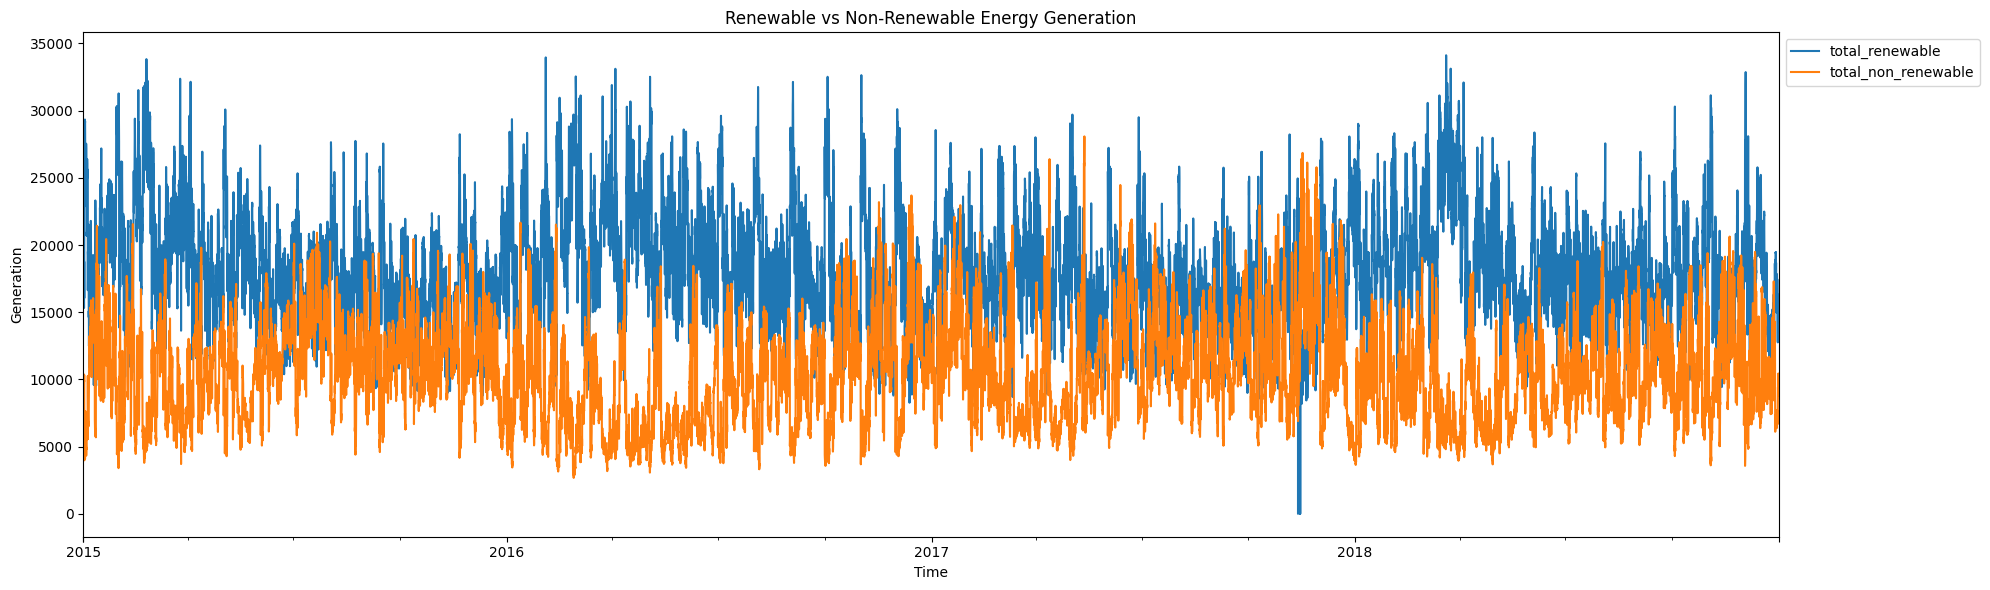

In [31]:
# Assuming columns with 'fossil' in the name are non-renewable
non_renewable_cols = [col for col in energy.columns if 'fossil' in col]
energy['total_non_renewable'] = energy[non_renewable_cols].sum(axis=1)

# Assuming the rest of the generation columns are renewable
renewable_cols = [col for col in energy.columns if 'generation' in col and col not in non_renewable_cols]
energy['total_renewable'] = energy[renewable_cols].sum(axis=1)

# Plotting renewable vs non-renewable
energy[['total_renewable', 'total_non_renewable']].plot(figsize=(20, 6))
plt.title('Renewable vs Non-Renewable Energy Generation')
plt.xlabel('Time')
plt.ylabel('Generation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

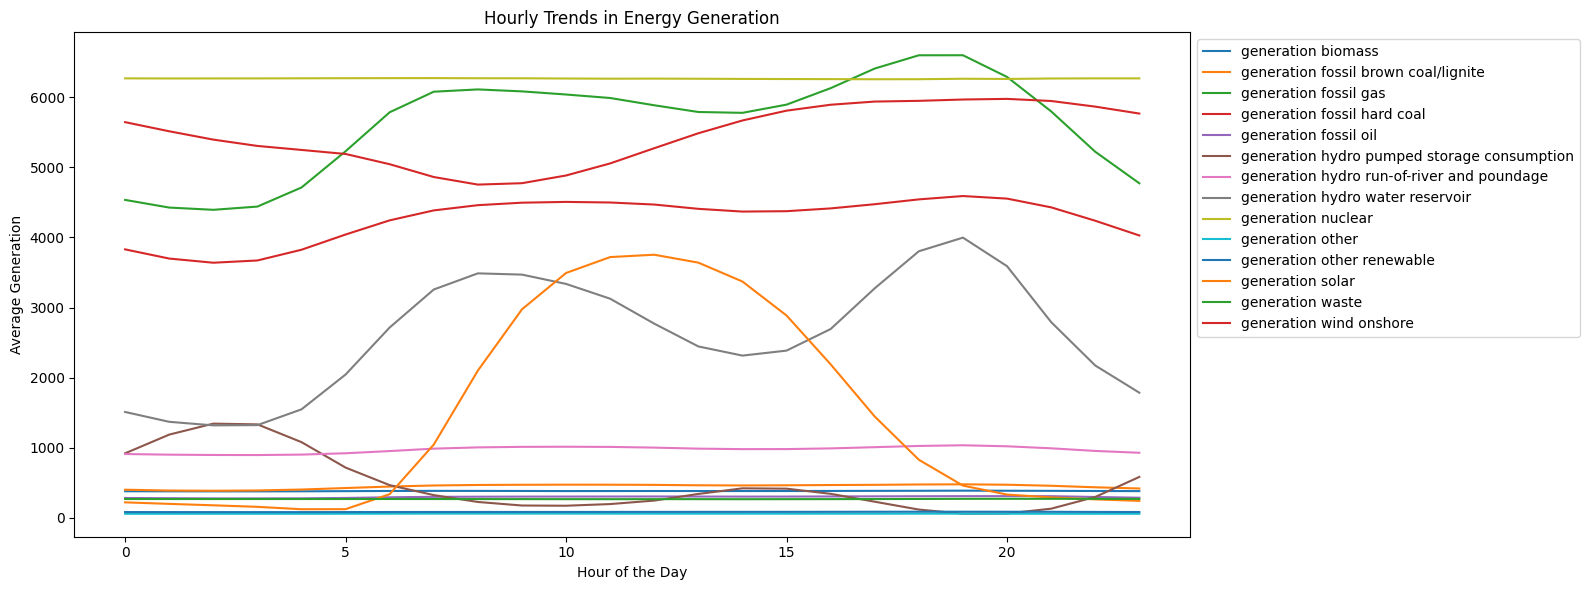

In [32]:
#Hourly Trends in Energy Generation
hourly_trends = energy.groupby('Hour').mean()
hourly_trends.filter(like='generation').plot(figsize=(16, 6))
plt.title('Hourly Trends in Energy Generation')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Generation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moving the legend outside (will edit to select few generation methods)
plt.tight_layout()
plt.show()


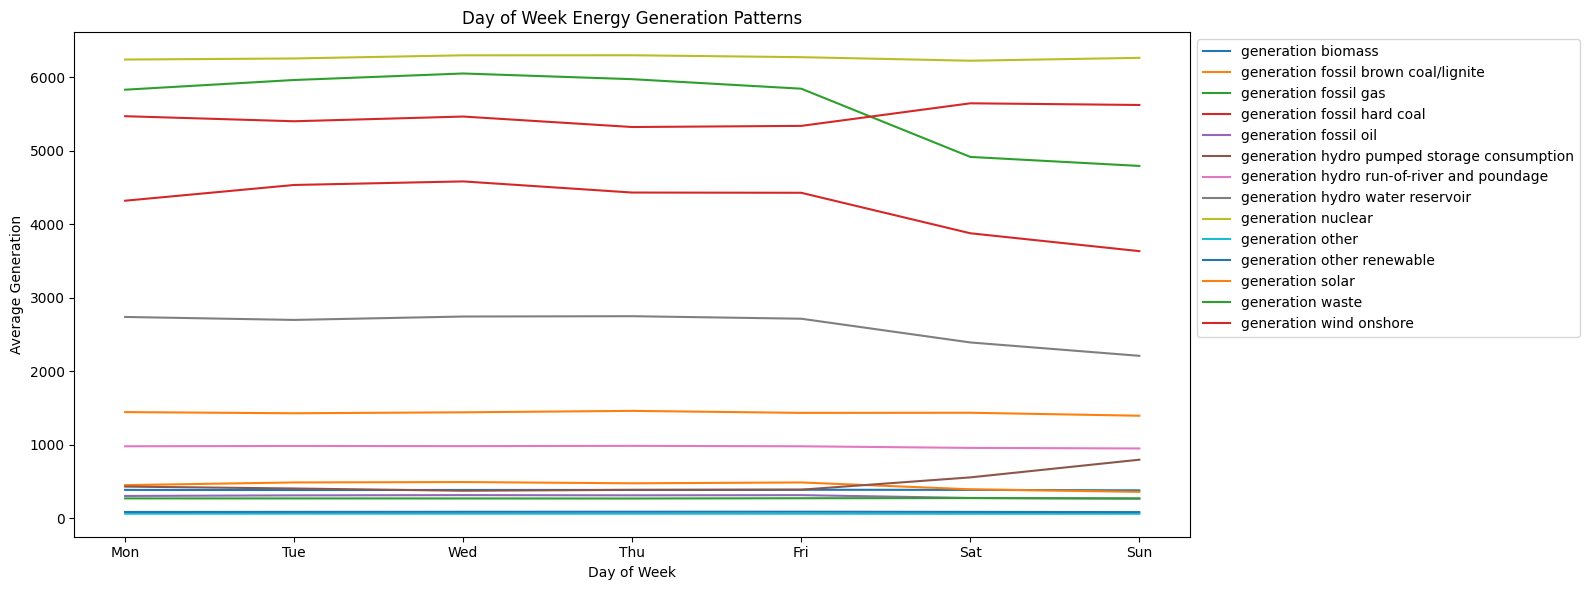

In [33]:
# Weekly trends

energy['day_of_week'] = energy.index.dayofweek

# Group by day of the week and plot
weekday_trends = energy.groupby('day_of_week').mean()
weekday_trends.filter(like='generation').plot(figsize=(16, 6))
plt.title('Day of Week Energy Generation Patterns')
plt.xlabel('Day of Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Average Generation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

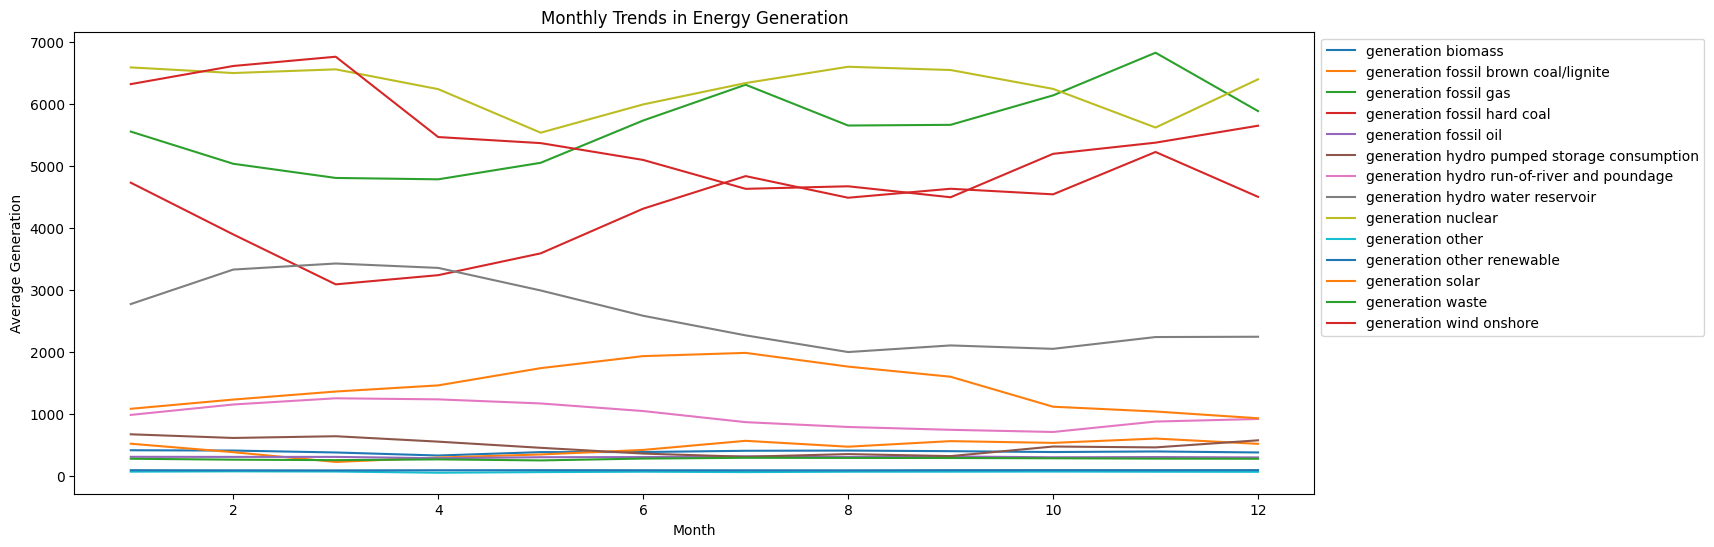

In [34]:
# Monthly trends

# Group by month and plot
monthly_trends = energy.groupby('Month').mean()
monthly_trends.filter(like='generation').plot(figsize=(16, 6))
plt.title('Monthly Trends in Energy Generation')
plt.xlabel('Month')
plt.ylabel('Average Generation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

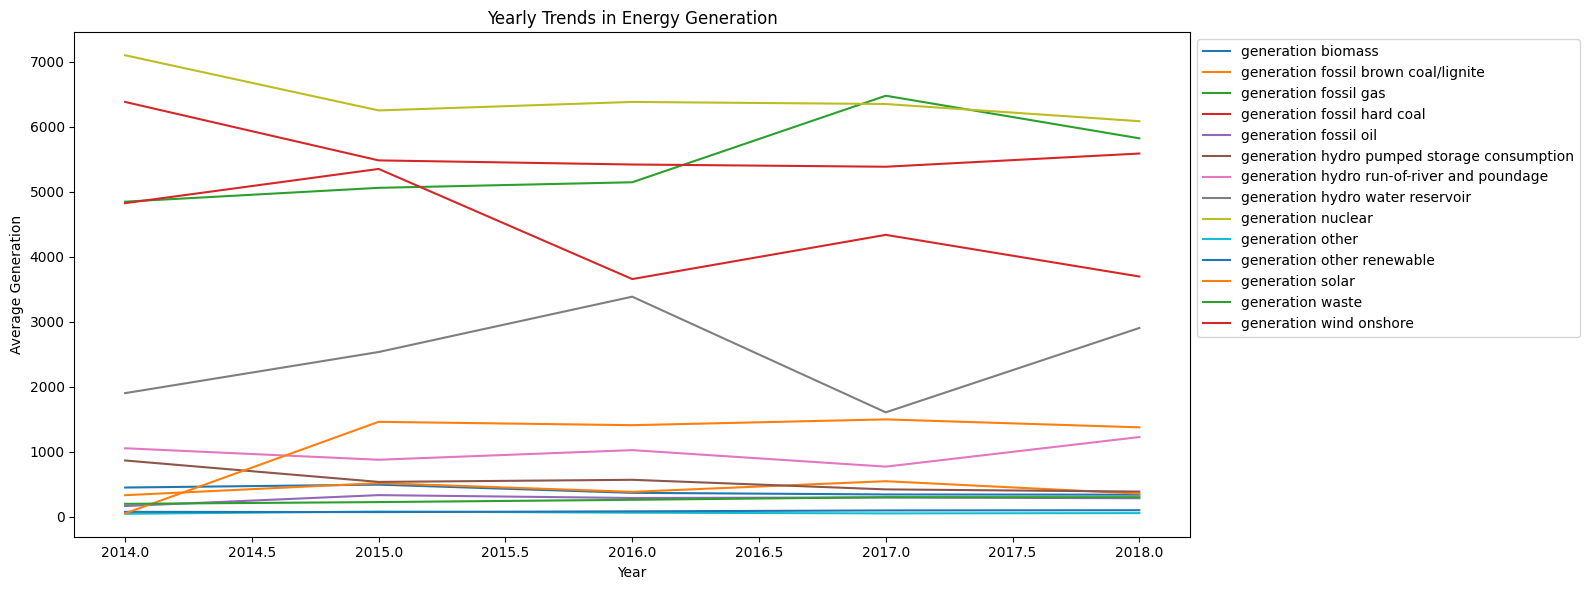

In [35]:
#Yearly trends

yearly_trends = energy.groupby('Year').mean()
yearly_trends.filter(like='generation').plot(figsize=(16, 6))
plt.title('Yearly Trends in Energy Generation')
plt.xlabel('Year')
plt.ylabel('Average Generation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### **1.1.3 Outliers analysis**

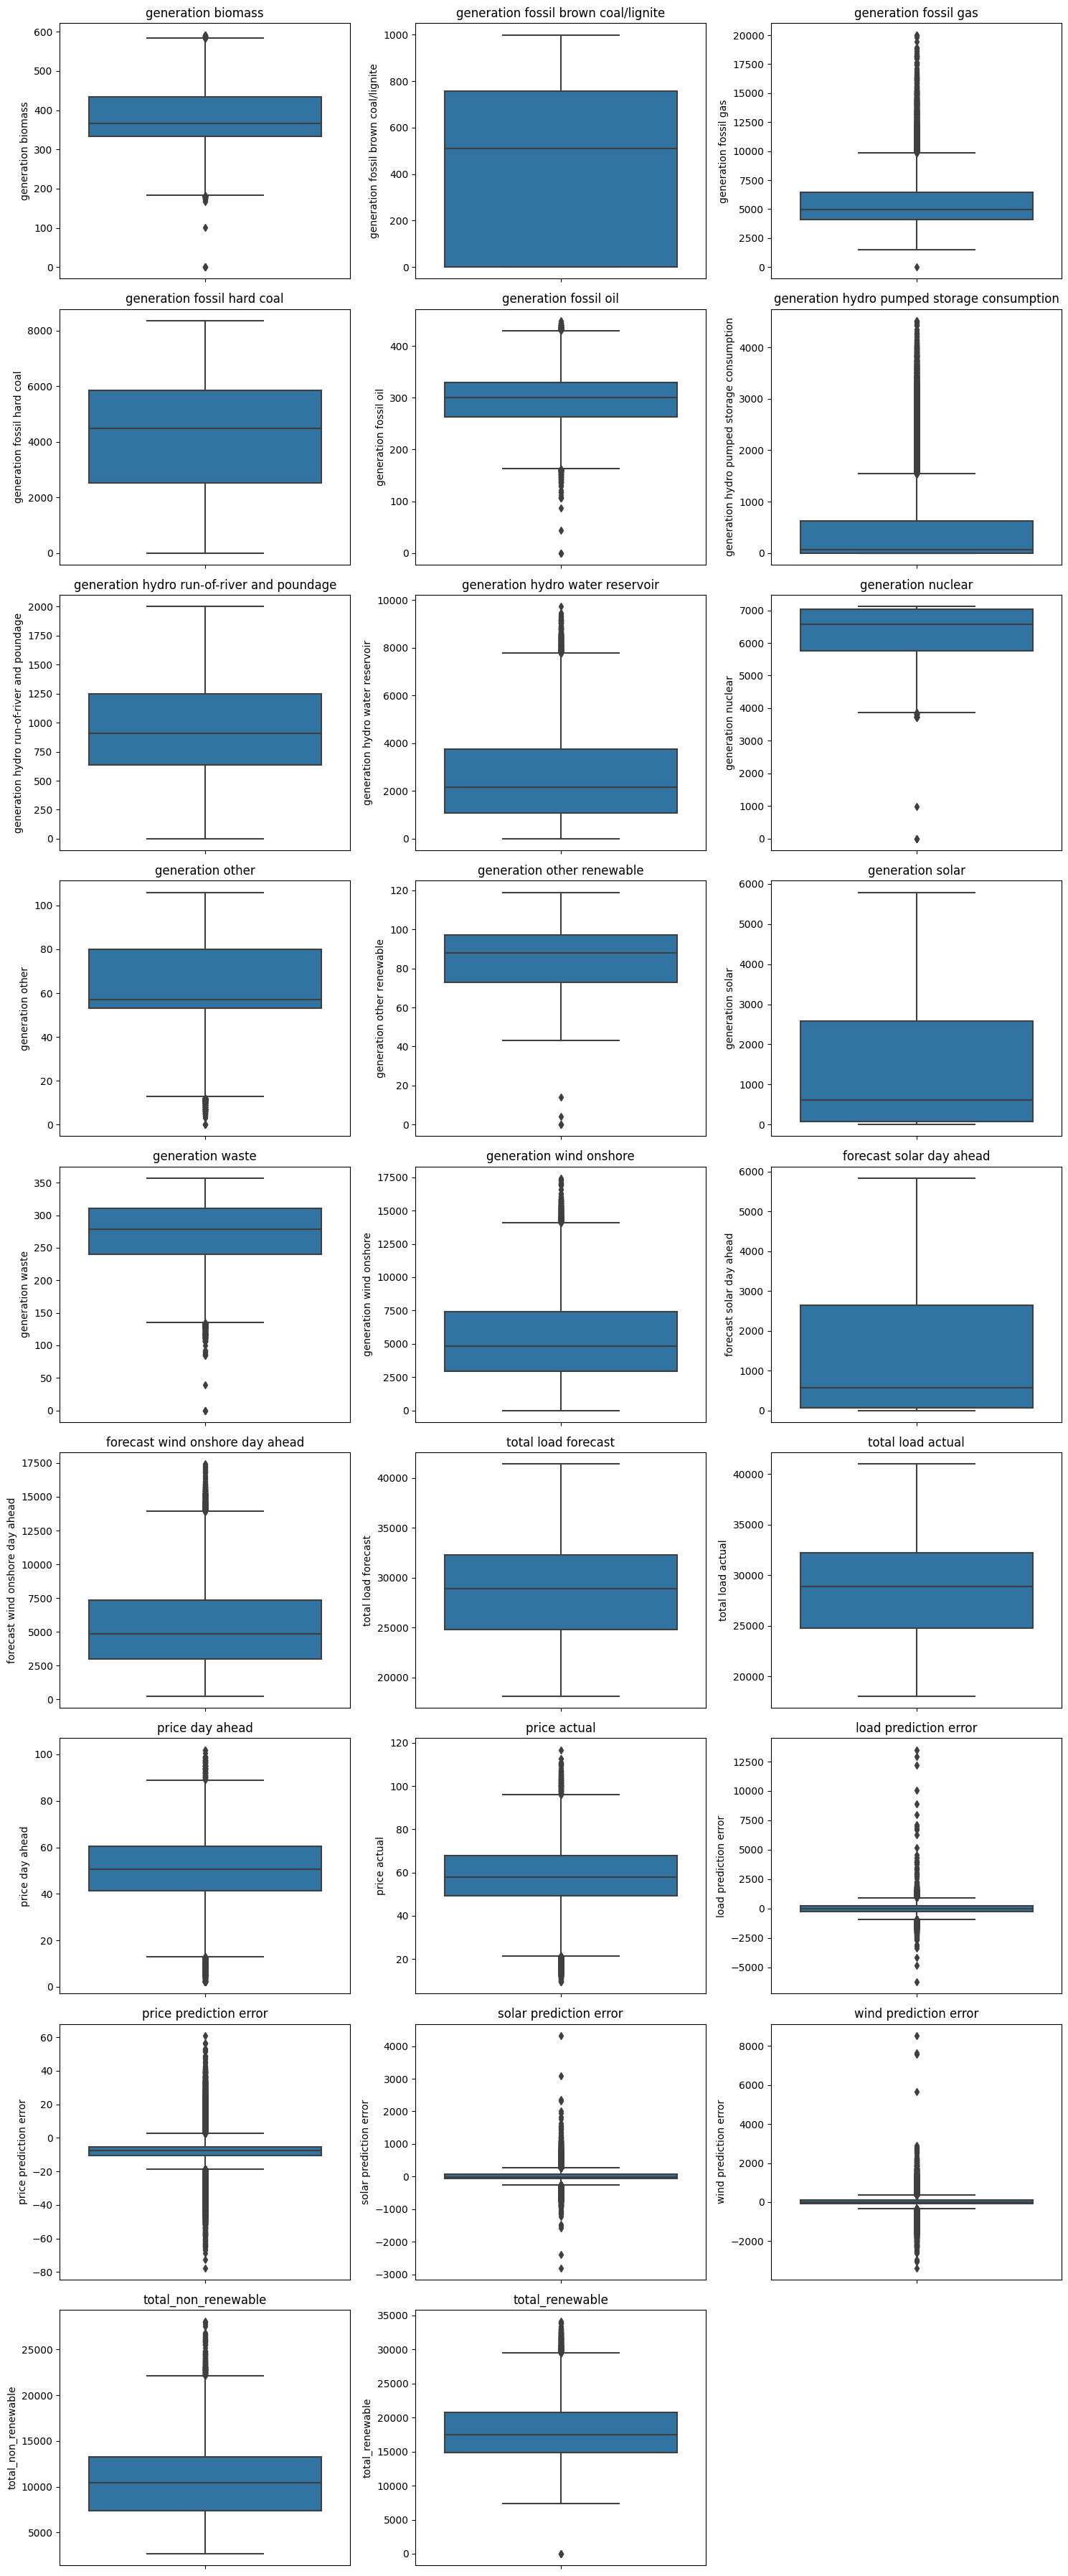

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `energy` is your DataFrame and you're interested in numeric columns
numeric_cols = energy.select_dtypes(include=['float64', 'int64']).columns  # Adjust types as necessary

# Determine the number of rows needed for subplots (3 plots per row)
n = len(numeric_cols)
rows = n // 3 + (1 if n % 3 else 0)  # Calculate rows needed

plt.figure(figsize=(15, 4 * rows))  # Adjust overall figure size as needed

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)  # Create subplot for each column
    sns.boxplot(y=energy[col])  # Note the use of 'y' for vertical box plots
    plt.title(col)
    plt.tight_layout()

plt.show()

In this analysis, outliers are treated as significant, reflecting actual market conditions rather than anomalies to be corrected. It's crucial to choose models that can handle outliers effectively, ensuring that predictions remain accurate and representative of the energy market's realities.






### **1.1.4 Feature Engineering**

There are a few features that can be easily created to have an idea of the robustness of the data provided:
- total generation: which will be the sum of all the sources actives at a given time
- exports: the difference between total generation and total load actual. Meaning that a positive number means that as the generation is greather than the consumption, the difference is exported and viceversa.

In [37]:
energy["total generation"] = energy.filter(like='generation').sum(axis=1)

In [38]:
energy["exports"] = energy["total generation"] - energy["total load actual"]

As we are working with time series, there are several time based relationships that has to be adressed via feature engineering. We have to "teach" the model that maybe a good predictor for tomorrows price at a given time is yesterdays price at the same time. In order to spots this relationships, we will run a PACF and ACF functions to identify correlations among the variables.

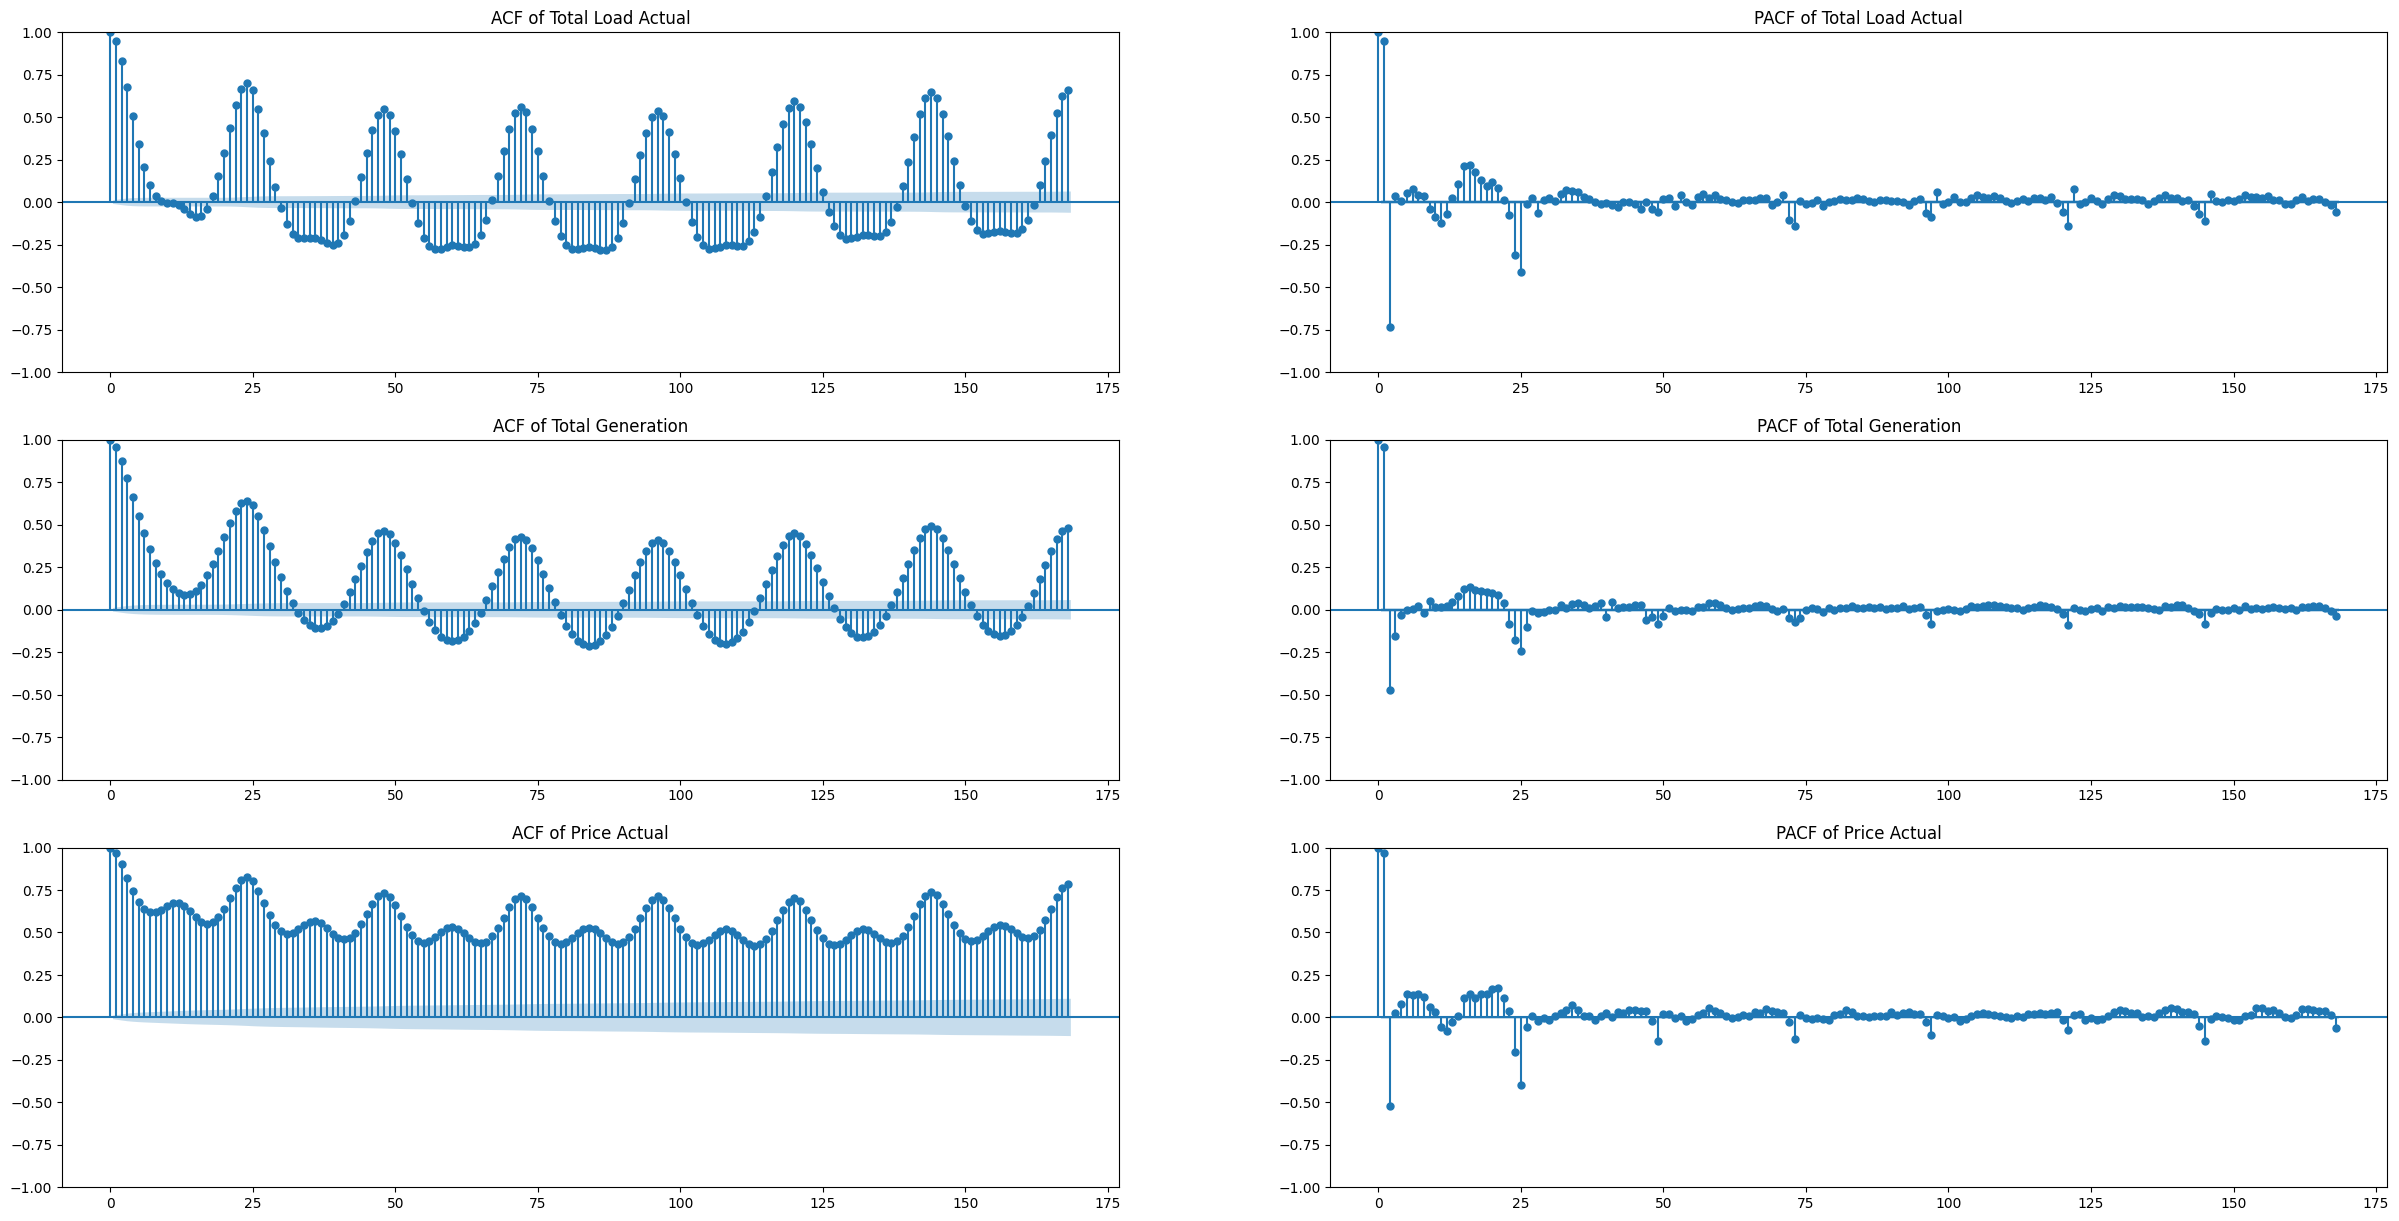

In [39]:
#Plot the ACF and PACF of the variables [total load actual, total generation, and price actual]. Indicates in the title to which plot correspond. Also put the ACF and PACF next to each other for each variable.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, figsize=(30, 15))
plot_acf(energy["total load actual"].dropna(), ax=axes[0, 0], title="ACF of Total Load Actual", lags=168)
plot_pacf(energy["total load actual"].dropna(), ax=axes[0, 1], title="PACF of Total Load Actual", lags=168)
plot_acf(energy["total generation"], ax=axes[1, 0], title="ACF of Total Generation", lags=168)
plot_pacf(energy["total generation"], ax=axes[1, 1], title="PACF of Total Generation", lags=168)
plot_acf(energy["price actual"], ax=axes[2, 0], title="ACF of Price Actual", lags=168)
plot_pacf(energy["price actual"], ax=axes[2, 1], title="PACF of Price Actual", lags=168)
plt.show()

After running the ACF and PACF analysis, the results are evident. The three variables under analysis (Load, Generation and Price) are highly correlated with its pass values. All variables shows a strong seasonality trougout the day. So lags 24, 48, 72 and also 168 (1 week ago) are strong candidates to be considered in our model.

Note that even tough all variables are strongly linked with its previous lags (t-1, t-2 and so on), given the market dynamics for setting the price, this information can't be used to set tomorrows price.

To keep the excerscise simple, we will try to predict tomorrows price (a vector of 24 different prices) with the information until 24 hours ago. So we will add three lags features:  

In [40]:
##energy['price_actual_t-48h'] = energy['price actual'].shift(48)
##energy['price_actual_t-72h'] = energy['price actual'].shift(72)
##energy['price_actual_t-168h'] = energy['price actual'].shift(168)

## Will be executed later, with all the other features

In addition to the lag features, we need to somehow tell the model that the data provided is cyclical in terms of its records. For example each day has 24 hours, and then its restarts again. So hour 1 is super close to hour 24 of the previous day. To tackle this problem, we will use cyclical encoding for hourly, weekly and

In [41]:
#Cyclical encoding

# Hour of the day
energy['sin_hour'] = np.sin(2 * np.pi * energy['Hour'] / 24)
energy['cos_hour'] = np.cos(2 * np.pi * energy['Hour'] / 24)

# Day of the week (assuming you have a 'DayOfWeek' variable which is Monday=0, Sunday=6)
energy['sin_day_week'] = np.sin(2 * np.pi * energy['Day_of_Week'] / 7)
energy['cos_day_week'] = np.cos(2 * np.pi * energy['Day_of_Week'] / 7)

# Month of the year
energy['sin_month'] = np.sin(2 * np.pi * energy['Month'] / 12)
energy['cos_month'] = np.cos(2 * np.pi * energy['Month'] / 12)

Now we need to drop some values that where created due to the lags features. The first 167 records can't look 168 periods ago, so we will get some null rows in those features.

In [42]:
energy = energy.dropna()

Re run a correlation test to see how the new features correlates with the target

In [43]:
corr_matrix = energy.corr()
corr_matrix["price actual"].sort_values(ascending=False)

price actual                                   1.000000
price day ahead                                0.732155
total_non_renewable                            0.526096
generation fossil hard coal                    0.465611
generation fossil gas                          0.461275
total load forecast                            0.435864
total load actual                              0.435336
generation fossil brown coal/lignite           0.363968
total generation                               0.298846
generation fossil oil                          0.284942
Month                                          0.281219
generation other renewable                     0.255480
Hour                                           0.237381
cos_month                                      0.196147
generation waste                               0.168667
Year                                           0.142870
generation biomass                             0.142652
forecast solar day ahead                       0

We reorginize ther dataframe, pushing the target towards the end of the data frame.

In [44]:
# Get a list of all column names except 'price actual'
cols = [col for col in energy.columns if col != 'price actual']

# Add 'price actual' to the end of the list
cols.append('price actual')

# Reorder the DataFrame based on the new column order
energy = energy[cols]

In [45]:
energy.shape

(35064, 40)

## **1.2 WEATHER DATASET**

The weather dataset comprises comprehensive climatological records for five major Spanish cities: Valencia, Barcelona, Sevilla, Madrid, and Bilbao, spanning various time points. It features 178,396 entries, each timestamped and detailed with a range of meteorological data, including temperature (in Kelvin), atmospheric pressure (in hPa), humidity (%), wind speed (m/s) and direction (degrees), as well as precipitation information (rain and snow in mm for the past 1 and 3 hours) and cloud cover (%). Additionally, it provides categorical weather descriptions (e.g., "clear", "cloudy") along with specific weather condition codes and icons for visualization purposes. This dataset serves as a crucial component for analyzing weather's influence on energy consumption and pricing, offering insights into how different weather conditions impact energy demand and supply dynamics in Spain.

In [46]:
weather = pd.read_csv('weather_features.csv')

In [47]:
#Converting the dt_iso column into date time
weather['dt_iso'] = pd.to_datetime(weather['dt_iso'], utc=True)

In [48]:
weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0 2014-12-31 23:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
1 2015-01-01 00:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2 2015-01-01 01:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
3 2015-01-01 02:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
4 2015-01-01 03:00:00+00:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [49]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   dt_iso               178396 non-null  datetime64[ns, UTC]
 1   city_name            178396 non-null  object             
 2   temp                 178396 non-null  float64            
 3   temp_min             178396 non-null  float64            
 4   temp_max             178396 non-null  float64            
 5   pressure             178396 non-null  int64              
 6   humidity             178396 non-null  int64              
 7   wind_speed           178396 non-null  int64              
 8   wind_deg             178396 non-null  int64              
 9   rain_1h              178396 non-null  float64            
 10  rain_3h              178396 non-null  float64            
 11  snow_3h              178396 non-null  float64            
 12  cl

In [50]:
weather.shape

(178396, 17)

The weather data frame it does contains duplicates. We will drop them to avoid over counting

In [51]:
weather = weather.drop_duplicates()

In [52]:
unique_city_names = weather['city_name'].unique()
print(unique_city_names)

['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


In [53]:
# Converted the temperatures from Kelvin to Celsius for easier interpretation.
weather['temp'] = weather['temp'] - 273.15
weather['temp_min'] = weather['temp_min'] - 273.15
weather['temp_max'] = weather['temp_max'] - 273.15

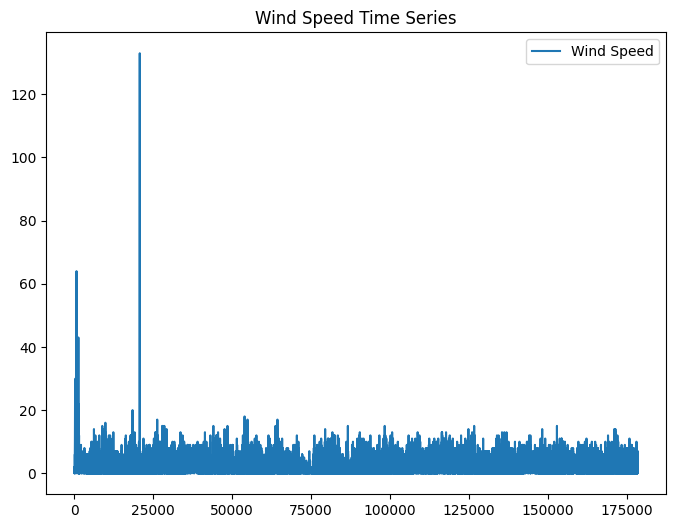

In [54]:
# Wind Analysis: The variability of wind speed and its prevailing directions.
plt.figure(figsize=(8, 6))
plt.plot(weather.index, weather['wind_speed'], label='Wind Speed')
plt.title('Wind Speed Time Series')
plt.legend()
plt.show()

In [55]:
weather.describe()

temp       temp_min       temp_max      pressure  \
count  178375.000000  178375.000000  178375.000000  1.783750e+05   
mean       16.468578      15.180465      17.941227  1.069267e+03   
std         8.026512       7.955778       8.612781  5.969983e+03   
min       -10.910000     -10.910000     -10.910000  0.000000e+00   
25%        10.520000       9.333000      11.500000  1.013000e+03   
50%        16.000000      15.000000      17.000000  1.018000e+03   
75%        22.000000      20.581000      24.000000  1.022000e+03   
max        42.450000      42.000000      48.000000  1.008371e+06   

            humidity     wind_speed       wind_deg        rain_1h  \
count  178375.000000  178375.000000  178375.000000  178375.000000   
mean       68.422733       2.470688     166.592555       0.075499   
std        21.903495       2.095956     116.610753       0.398870   
min         0.000000       0.000000       0.000000       0.000000   
25%        53.000000       1.000000      55.000000       0.000000   
50%        72.000000       2.000000     177.000000       0.000000   
75%        87.000000       4.000000     270.000000       0.000000   
max       100.000000     133.000000     360.000000      12.000000   

             rain_3h        snow_3h     clouds_all     weather_id  
count  178375.000000  178375.000000  178375.000000  178375.000000  
mean        0.000379       0.004763      25.075302     759.828804  
std         0.007285       0.222617      30.774908     108.737032  
min         0.000000       0.000000       0.000000     200.000000  
25%         0.000000       0.000000       0.000000     800.000000  
50%         0.000000       0.000000      20.000000     800.000000  
75%         0.000000       0.000000      40.000000     801.000000  
max         2.315000      21.500000     100.000000     804.000000

In [56]:
#Drop temp_min and temp_max due to multicolinearity. Also some variables that does not carry relevant information
weather = weather.drop(["temp_min","temp_max","weather_icon", "weather_description", "weather_id"], axis = 1)

Some of the variables are continous and more simple to understand, but some others like the wind degree need to be carefully studied, as they represent a value between 0 and 360°. So again cyclical encoding has to be applied

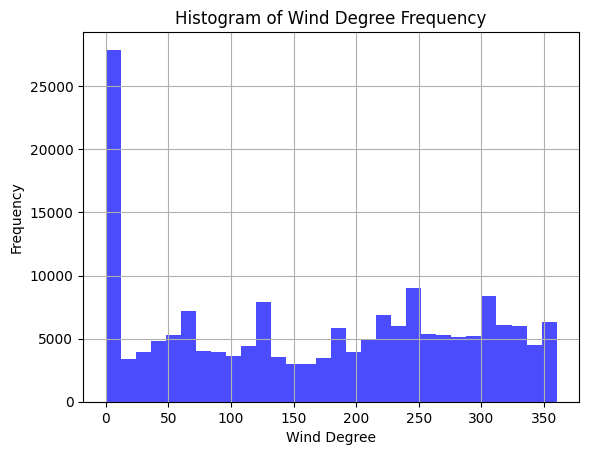

In [57]:
plt.hist(weather['wind_deg'], bins=30, color='blue', alpha=0.7)  # Adjust bins and styling as desired
plt.xlabel('Wind Degree')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Degree Frequency')
plt.grid(True)
plt.show()

In [58]:
import numpy as np

# Convert wind_deg to radians
weather['wind_deg_rad'] = np.deg2rad(weather['wind_deg'])

# Create sin and cos components
weather['wind_deg_sin'] = np.sin(weather['wind_deg_rad'])
weather['wind_deg_cos'] = np.cos(weather['wind_deg_rad'])

In [59]:
weather = weather.drop(columns = ["wind_deg_rad", "wind_deg"] , axis = 1)

In [60]:
weather.head()

dt_iso city_name   temp  pressure  humidity  wind_speed  \
0 2014-12-31 23:00:00+00:00  Valencia -2.675      1001        77           1   
1 2015-01-01 00:00:00+00:00  Valencia -2.675      1001        77           1   
2 2015-01-01 01:00:00+00:00  Valencia -3.464      1002        78           0   
3 2015-01-01 02:00:00+00:00  Valencia -3.464      1002        78           0   
4 2015-01-01 03:00:00+00:00  Valencia -3.464      1002        78           0   

   rain_1h  rain_3h  snow_3h  clouds_all weather_main  wind_deg_sin  \
0      0.0      0.0      0.0           0        clear      0.882948   
1      0.0      0.0      0.0           0        clear      0.882948   
2      0.0      0.0      0.0           0        clear      0.390731   
3      0.0      0.0      0.0           0        clear      0.390731   
4      0.0      0.0      0.0           0        clear      0.390731   

   wind_deg_cos  
0      0.469472  
1      0.469472  
2      0.920505  
3      0.920505  
4      0.920505

We will also explore the variable rain_ and snow_ to get an idea of the values that contains. We will realize that most of the records are 0.

In [61]:
weather['rain_1h'].value_counts()

rain_1h
0.00     158988
0.30      12794
0.90       5196
3.00       1310
12.00        85
2.29          1
0.25          1
Name: count, dtype: int64

In [62]:
weather['rain_3h'].value_counts()

rain_3h
0.0000    176521
0.0100       214
0.0050       187
0.0150       128
0.0250        74
           ...  
0.0525         2
0.0730         2
0.0830         1
2.3150         1
0.0530         1
Name: count, Length: 89, dtype: int64

In [63]:
weather['snow_3h'].value_counts()

snow_3h
0.000    178108
1.500        15
2.700        15
0.700        12
0.200        12
          ...  
0.001         2
1.049         1
1.187         1
0.243         1
0.335         1
Name: count, Length: 66, dtype: int64

In [64]:
weather['clouds_all'].value_counts()

clouds_all
0     82178
20    31000
75    21940
40    13667
92     4380
      ...  
97        2
63        2
96        1
11        1
93        1
Name: count, Length: 97, dtype: int64

Different from what we had on the energy dataframe, the weather df does not contain any null values

In [65]:
weather.isnull().sum()

dt_iso          0
city_name       0
temp            0
pressure        0
humidity        0
wind_speed      0
rain_1h         0
rain_3h         0
snow_3h         0
clouds_all      0
weather_main    0
wind_deg_sin    0
wind_deg_cos    0
dtype: int64

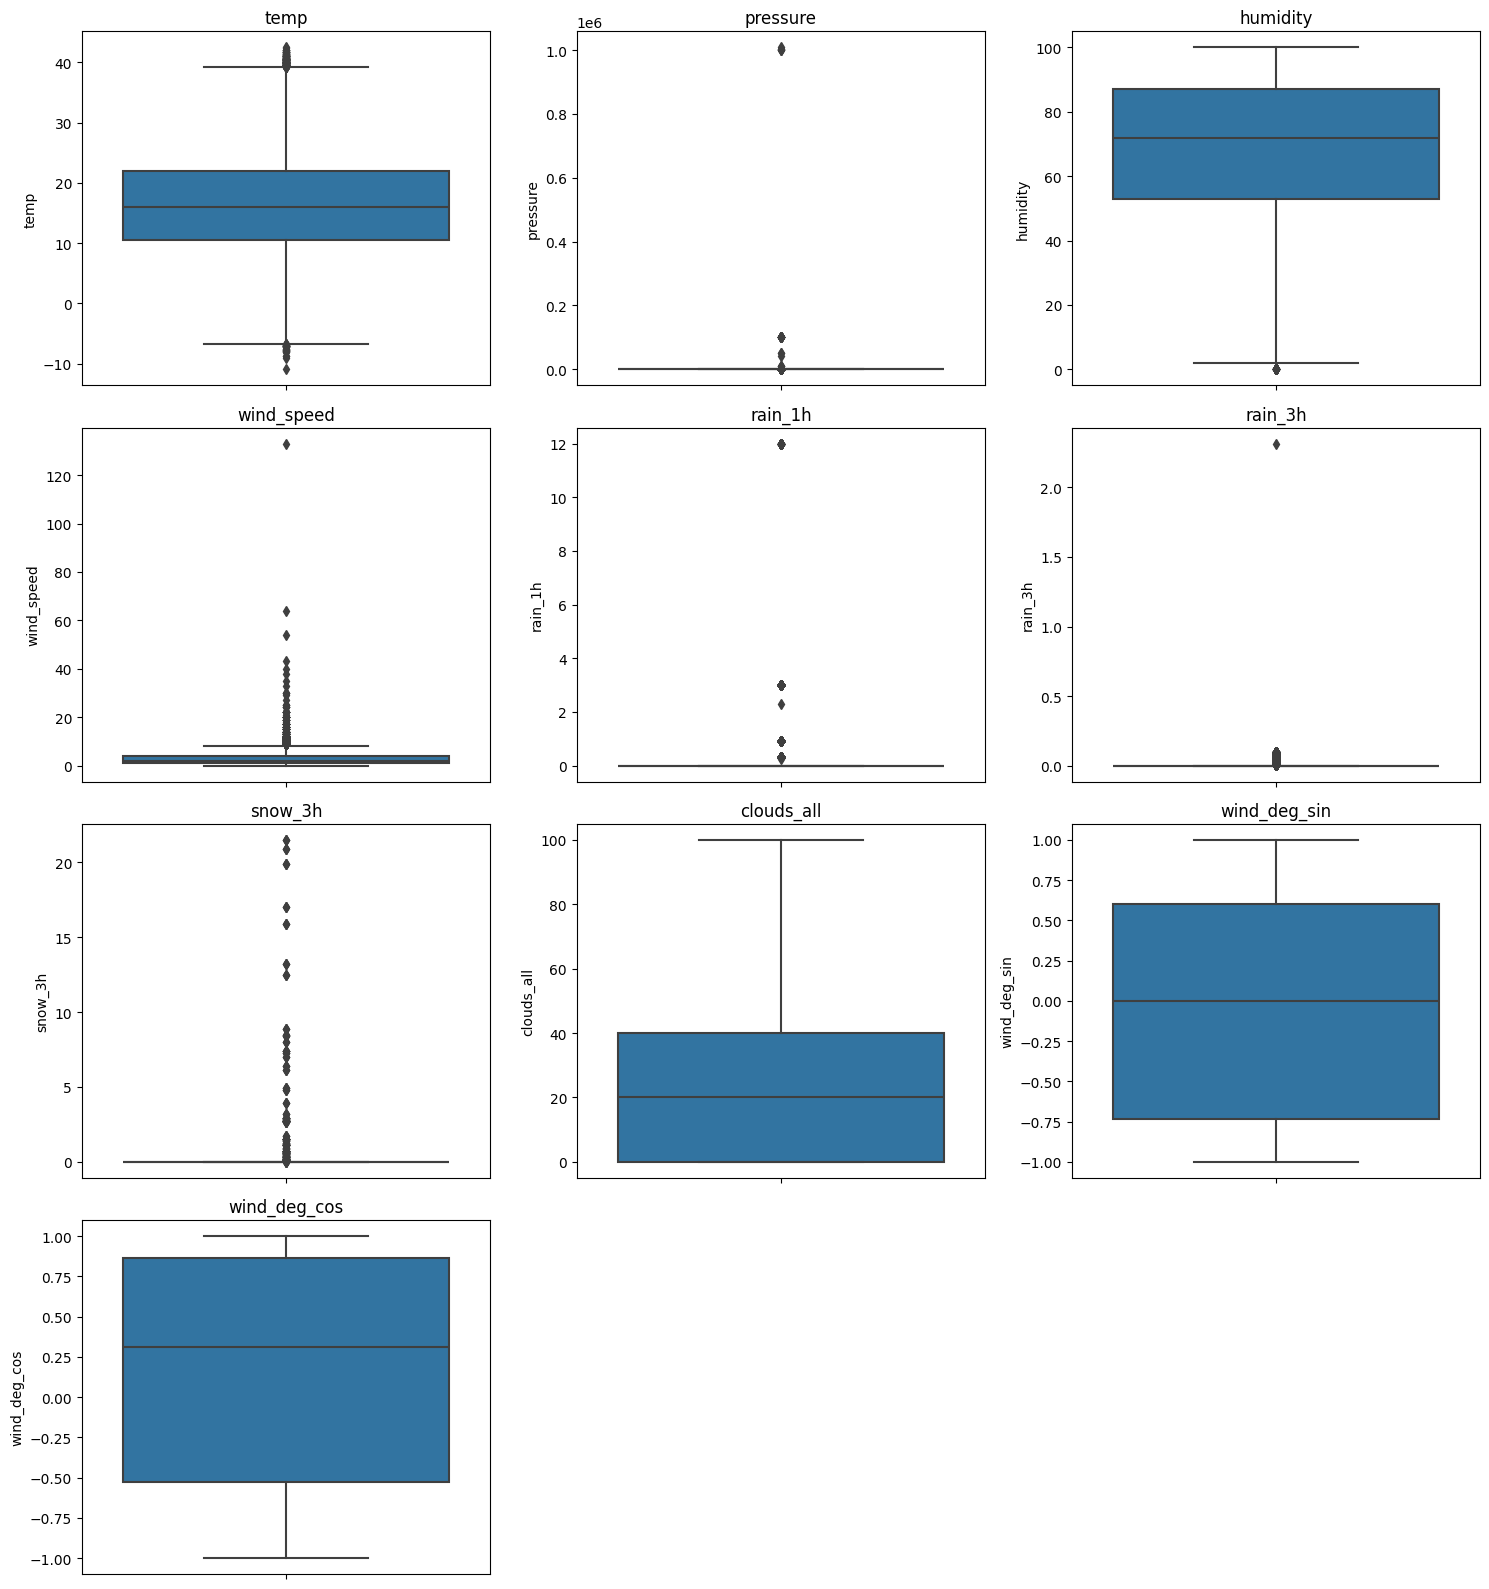

In [66]:
weather_num = weather.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows needed for subplots (3 plots per row)
n = len(weather_num)
rows = n // 3 + (1 if n % 3 else 0)  # Calculate rows needed

plt.figure(figsize=(15, 4 * rows))  # Adjust overall figure size as needed

for i, col in enumerate(weather_num, 1):
    plt.subplot(rows, 3, i)  # Create subplot for each column
    sns.boxplot(y=weather[col])  # Note the use of 'y' for vertical box plots
    plt.title(col)
    plt.tight_layout()

plt.show()

From now onwards, we will manipulate the weather dataframe separately for each city:

In [67]:
weather.set_index('dt_iso', inplace=True)

In [68]:
weather_bilbao = weather[weather['city_name'] == 'Bilbao']
weather_valencia = weather[weather['city_name'] == 'Valencia']
weather_madrid = weather[weather['city_name'] == 'Madrid']
weather_barcelona = weather[weather['city_name'] == ' Barcelona']
weather_seville = weather[weather['city_name'] == 'Seville']

In [69]:
# City-specific DataFrames dictionary
city_dfs = {
    'Bilbao': weather_bilbao,
    'Valencia': weather_valencia,
    'Madrid': weather_madrid,
    'Barcelona': weather_barcelona,
    'Seville': weather_seville
}

In [70]:
# Loop through each city DataFrame to count duplicate 'date_iso' in the index
for city, df in city_dfs.items():
    # Count the duplicate indices
    duplicate_count = df.index.duplicated().sum()
    print(f"{city} has {duplicate_count} duplicate date_iso entries.")

Bilbao has 883 duplicate date_iso entries.
Valencia has 76 duplicate date_iso entries.
Madrid has 1199 duplicate date_iso entries.
Barcelona has 408 duplicate date_iso entries.
Seville has 489 duplicate date_iso entries.


In [71]:
for city, df in city_dfs.items():
    print(f"{city} DataFrame shape: {df.shape}")

Bilbao DataFrame shape: (35947, 12)
Valencia DataFrame shape: (35140, 12)
Madrid DataFrame shape: (36263, 12)
Barcelona DataFrame shape: (35472, 12)
Seville DataFrame shape: (35553, 12)


Similarly on what we did before, we will check if any record is missing from the period that we are studying. Ideally, each of our 5 dataframes should have 35064 records, but all of them has a higher number, so we will need to handle duplicated values

In [72]:
# Define start and end dates
start = '2015-01-01 00:00'
end = '2018-12-31 23:00'

# Generate the complete range of hourly timestamps
date_range = pd.date_range(start=start, end=end, freq='H')

# Convert to DataFrame if needed for comparison (optional)
complete_df = pd.DataFrame(date_range, columns=['dt_iso'])

In [73]:
len(complete_df)

35064

### **1.2.4 Feature Engineering**

Many of the features of this dataframe are categorical, so a strategy to handle them such as categorical or one hot encoding will be applied.

From now onwards, we will generate two dataframes:
- 1. OHE: to be used on RNN
- 2. CAT Encoder: to be used on tree based models

In [74]:
#Will start with OHE
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'weather_main' is present in all dataframes and you want to apply OHE to this column

def process_weather_data(df):
    # Make a copy to avoid modifying the original DataFrame
    weather_copy = df.copy()

    # Initialize OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # Assuming 'weather_main' is a column you want to encode
    if 'weather_main' in weather_copy.columns:
        encoded_columns = encoder.fit_transform(weather_copy[['weather_main']])
        encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['weather_main']))
        # Ensuring index alignment before concatenation
        encoded_df.index = weather_copy.index
        # Concatenate the original DataFrame with the encoded DataFrame
        weather_copy = pd.concat([weather_copy, encoded_df], axis=1)
        # Drop the original 'weather_main' column
        weather_copy.drop('weather_main', axis=1, inplace=True)
    else:
        print("Column 'weather_main' not found in DataFrame")

    # If you need to work with 'dt_iso' as an index in further operations, just use weather_copy.index

    return weather_copy

In [75]:
def remove_duplicates_and_average(df):
    # Define a base dictionary for aggregation
    agg_dict = {
        'temp': 'mean',
        'pressure': 'mean',
        'humidity': 'mean',
        'wind_speed': 'mean',
        'rain_1h': 'mean',
        'rain_3h': 'mean',
        'snow_3h': 'mean',
        'clouds_all': 'mean',
    }

    # List of possible weather main categories after OHE
    weather_categories = [
        'weather_main_clear', 'weather_main_clouds', 'weather_main_drizzle',
        'weather_main_dust', 'weather_main_fog', 'weather_main_haze',
        'weather_main_mist', 'weather_main_rain', 'weather_main_smoke',
        'weather_main_snow', 'weather_main_squall', 'weather_main_thunderstorm'
    ]

    # Update agg_dict with weather categories present in the DataFrame
    for category in weather_categories:
        if category in df.columns:
            agg_dict[category] = 'max'

    # Group by index ('dt_iso') and 'city_name', and calculate the mean for specified columns
    # and the max for weather related columns
    df_mean = df.groupby([df.index, 'city_name']).agg(agg_dict)

    # Reset index to make 'dt_iso' and 'city_name' as regular columns
    df_mean.reset_index(inplace=True)

    # If 'dt_iso' was previously set as index, reindex
    if 'dt_iso' in df_mean.columns:
        df_mean.set_index('dt_iso', inplace=True)

    return df_mean

In [76]:
# List of weather DataFrames
weather_dfs = [weather_bilbao, weather_valencia, weather_madrid, weather_barcelona, weather_seville]
cleaned_ohe_dfs = []

# Process each DataFrame
for df in weather_dfs:
    # Apply OneHotEncoding
    df_ohe = process_weather_data(df)
    # Remove duplicates and average
    df_cleaned_ohe = remove_duplicates_and_average(df_ohe)
    cleaned_ohe_dfs.append(df_cleaned_ohe)

# Unpack the list to individual DataFrames
bilbao_clean_ohe, valencia_clean_ohe, madrid_clean_ohe, barcelona_clean_ohe, seville_clean_ohe = cleaned_ohe_dfs

# Now, each variable (bilbao_clean_ohe, valencia_clean_ohe, etc.) holds the respective processed DataFrame

c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sp

Finally we have got what we needed, 5 dataframes with the 35064 records

In [77]:
print("bilbao_clean_ohe shape:", bilbao_clean_ohe.shape)
print("valencia_clean_ohe shape:", valencia_clean_ohe.shape)
print("madrid_clean_ohe shape:", madrid_clean_ohe.shape)
print("barcelona_clean_ohe shape:", barcelona_clean_ohe.shape)
print("seville_clean_ohe shape:", seville_clean_ohe.shape)

bilbao_clean_ohe shape: (35064, 18)
valencia_clean_ohe shape: (35064, 18)
madrid_clean_ohe shape: (35064, 18)
barcelona_clean_ohe shape: (35064, 18)
seville_clean_ohe shape: (35064, 20)


So far we have finalized the OHE process for the 5 different Data Frames. Now we will proceed with the second approach, which is the Label Encoder

In [78]:
from sklearn.preprocessing import LabelEncoder

def process_weather_data_label_encoder(df, city_name):
    # Make a deep copy to avoid SettingWithCopyWarning
    df = df.copy()

    # Initialize the LabelEncoder
    encoder = LabelEncoder()

    # Check if 'weather_main' column exists and apply LabelEncoder
    if 'weather_main' in df.columns:
        df['weather_main_encoded'] = encoder.fit_transform(df['weather_main'])
        df.drop('weather_main', axis=1, inplace=True)

    # Assuming 'dt_iso' is set as index, if not, set it as the index
    if df.index.name != 'dt_iso':
        df.set_index('dt_iso', inplace=True)

    # Separate numeric and non-numeric columns for aggregation
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Remove duplicates while keeping the max value of 'weather_main_encoded'
    # and calculating the mean for numeric columns
    df_agg = df.groupby(df.index).agg({'weather_main_encoded': 'max', **{col: 'mean' for col in numeric_cols}})

    # Add city name to the DataFrame
    df_agg['city_name'] = city_name

    return df_agg


In [79]:
# Define your city-specific DataFrames here
weather_dfs = {
    "bilbao": weather_bilbao,
    "valencia": weather_valencia,
    "madrid": weather_madrid,
    "barcelona": weather_barcelona,
    "seville": weather_seville
}

processed_dfs = {}

# Apply the process to each DataFrame
for city_name, df in weather_dfs.items():
    processed_dfs[city_name] = process_weather_data_label_encoder(df, city_name)

# Now, processed_dfs contains your processed DataFrames
# Access them like this: processed_dfs['bilbao'], processed_dfs['valencia'], etc.

# If you prefer separate variables for each city
bilbao_clean_label = processed_dfs['bilbao']
valencia_clean_label = processed_dfs['valencia']
madrid_clean_label = processed_dfs['madrid']
barcelona_clean_label = processed_dfs['barcelona']
seville_clean_label = processed_dfs['seville']


In [80]:
print("bilbao_clean_label shape:", bilbao_clean_label.shape)
print("valencia_clean_label shape:", valencia_clean_label.shape)
print("madrid_clean_label shape:", madrid_clean_label.shape)
print("barcelona_clean_label shape:", barcelona_clean_label.shape)
print("seville_clean_label shape:", seville_clean_label.shape)

bilbao_clean_label shape: (35064, 12)
valencia_clean_label shape: (35064, 12)
madrid_clean_label shape: (35064, 12)
barcelona_clean_label shape: (35064, 12)
seville_clean_label shape: (35064, 12)


Similar to what we have done before, now we have the 5 differents dataframes with all its record per city. Note that this dataframes have less features as they treat the weather_main as one feature and encode it in just one column.

Now we will perform separetly the merge of the OHE dataframes and the Label Encoded data frame with the energy dataframe. But, before doing this, we will rename the columns of each dataframe in order to identify which feature correspond to each city. The following code will allow us to rename every column, but the dt_iso column

In [81]:
# List of city names and corresponding DataFrames for One-Hot Encoded data
cities_ohe = ['bilbao', 'valencia', 'madrid', 'barcelona', 'seville']
dfs_ohe = [
    bilbao_clean_ohe,
    valencia_clean_ohe,
    madrid_clean_ohe,
    barcelona_clean_ohe,
    seville_clean_ohe
]

# Rename columns for One-Hot Encoded dataframes
for city, df in zip(cities_ohe, dfs_ohe):
    df.columns = [f'{city}_' + col if col != 'dt_iso' else col for col in df.columns]

# List of city names and corresponding DataFrames for Label Encoded data
cities_label = ['bilbao', 'valencia', 'madrid', 'barcelona', 'seville']
dfs_label = [
    bilbao_clean_label,
    valencia_clean_label,
    madrid_clean_label,
    barcelona_clean_label,
    seville_clean_label
]

# Rename columns for Label Encoded dataframes
for city, df in zip(cities_label, dfs_label):
    df.columns = [f'{city}_' + col if col != 'dt_iso' else col for col in df.columns]

# Now, all columns in each DataFrame are prefixed with the city name, except for 'dt_iso'

Before performing the join with the energy df, we have to convert the index column to the same dtype

In [82]:
print(energy.index.dtype)
print(valencia_clean_ohe.index.dtype)
# Repeat for other DataFrames as needed

datetime64[ns]
datetime64[ns, UTC]


In [83]:
# List of all DataFrame variables
dataframes = [
    bilbao_clean_ohe, valencia_clean_ohe, madrid_clean_ohe, barcelona_clean_ohe, seville_clean_ohe,
    bilbao_clean_label, valencia_clean_label, madrid_clean_label, barcelona_clean_label, seville_clean_label
]

# Convert the index of each DataFrame to timezone-naive
for df in dataframes:
    df.index = df.index.tz_localize(None)

In [84]:
# Perform the left outer joins
energy_weather_ohe = energy.join([valencia_clean_ohe, madrid_clean_ohe, barcelona_clean_ohe, seville_clean_ohe, bilbao_clean_ohe], how='left')
energy_weather_label = energy.join([valencia_clean_label, madrid_clean_label, barcelona_clean_label, seville_clean_label, bilbao_clean_label], how='left')

In [85]:
print(energy_weather_ohe.shape)
print(energy_weather_label.shape)

(35064, 132)
(35064, 100)


In [86]:
energy_weather_ohe.head()

generation biomass  generation fossil brown coal/lignite  \
time                                                                            
2014-12-31 23:00:00               447.0                                 329.0   
2015-01-01 00:00:00               449.0                                 328.0   
2015-01-01 01:00:00               448.0                                 323.0   
2015-01-01 02:00:00               438.0                                 254.0   
2015-01-01 03:00:00               428.0                                 187.0   

                     generation fossil gas  generation fossil hard coal  \
time                                                                      
2014-12-31 23:00:00                 4844.0                       4821.0   
2015-01-01 00:00:00                 5196.0                       4755.0   
2015-01-01 01:00:00                 4857.0                       4581.0   
2015-01-01 02:00:00                 4314.0                       4131.0   
2015-01-01 03:00:00                 4130.0                       3840.0   

                     generation fossil oil  \
time                                         
2014-12-31 23:00:00                  162.0   
2015-01-01 00:00:00                  158.0   
2015-01-01 01:00:00                  157.0   
2015-01-01 02:00:00                  160.0   
2015-01-01 03:00:00                  156.0   

                     generation hydro pumped storage consumption  \
time                                                               
2014-12-31 23:00:00                                        863.0   
2015-01-01 00:00:00                                        920.0   
2015-01-01 01:00:00                                       1164.0   
2015-01-01 02:00:00                                       1503.0   
2015-01-01 03:00:00                                       1826.0   

                     generation hydro run-of-river and poundage  \
time                                                              
2014-12-31 23:00:00                                      1051.0   
2015-01-01 00:00:00                                      1009.0   
2015-01-01 01:00:00                                       973.0   
2015-01-01 02:00:00                                       949.0   
2015-01-01 03:00:00                                       953.0   

                     generation hydro water reservoir  generation nuclear  \
time                                                                        
2014-12-31 23:00:00                            1899.0              7096.0   
2015-01-01 00:00:00                            1658.0              7096.0   
2015-01-01 01:00:00                            1371.0              7099.0   
2015-01-01 02:00:00                             779.0              7098.0   
2015-01-01 03:00:00                             720.0              7097.0   

                     generation other  generation other renewable  \
time                                                                
2014-12-31 23:00:00              43.0                        73.0   
2015-01-01 00:00:00              43.0                        71.0   
2015-01-01 01:00:00              43.0                        73.0   
2015-01-01 02:00:00              43.0                        75.0   
2015-01-01 03:00:00              43.0                        74.0   

                     generation solar  generation waste  \
time                                                      
2014-12-31 23:00:00              49.0             196.0   
2015-01-01 00:00:00              50.0             195.0   
2015-01-01 01:00:00              50.0             196.0   
2015-01-01 02:00:00              50.0             191.0   
2015-01-01 03:00:00              42.0             189.0   

                     generation wind onshore  forecast solar day ahead  \
time                                                                     
2014-12-31 23:00:00                   6378.0                      17.0 

We will rearrange both dataframes a little to have a more clear structure (with the target at the end, and other minor changes)

In [87]:
new_column_order = [
    'valencia_city_name', 'valencia_temp', 'valencia_pressure', 'valencia_humidity', 'valencia_wind_speed', 'valencia_rain_1h', 'valencia_rain_3h', 'valencia_snow_3h', 'valencia_clouds_all', 'valencia_weather_main_clear', 'valencia_weather_main_clouds', 'valencia_weather_main_drizzle', 'valencia_weather_main_fog', 'valencia_weather_main_haze', 'valencia_weather_main_mist', 'valencia_weather_main_rain', 'valencia_weather_main_smoke', 'valencia_weather_main_thunderstorm', 'madrid_city_name', 'madrid_temp', 'madrid_pressure', 'madrid_humidity', 'madrid_wind_speed', 'madrid_rain_1h', 'madrid_rain_3h', 'madrid_snow_3h', 'madrid_clouds_all', 'madrid_weather_main_clear', 'madrid_weather_main_clouds', 'madrid_weather_main_drizzle', 'madrid_weather_main_fog', 'madrid_weather_main_haze', 'madrid_weather_main_mist', 'madrid_weather_main_rain', 'madrid_weather_main_snow', 'madrid_weather_main_thunderstorm', 'barcelona_city_name', 'barcelona_temp', 'barcelona_pressure', 'barcelona_humidity', 'barcelona_wind_speed', 'barcelona_rain_1h', 'barcelona_rain_3h', 'barcelona_snow_3h', 'barcelona_clouds_all', 'barcelona_weather_main_clear', 'barcelona_weather_main_clouds', 'barcelona_weather_main_drizzle', 'barcelona_weather_main_dust', 'barcelona_weather_main_fog', 'barcelona_weather_main_mist', 'barcelona_weather_main_rain', 'barcelona_weather_main_snow', 'barcelona_weather_main_thunderstorm', 'seville_city_name', 'seville_temp', 'seville_pressure', 'seville_humidity', 'seville_wind_speed', 'seville_rain_1h', 'seville_rain_3h', 'seville_snow_3h', 'seville_clouds_all', 'seville_weather_main_clear', 'seville_weather_main_clouds', 'seville_weather_main_drizzle', 'seville_weather_main_dust', 'seville_weather_main_fog', 'seville_weather_main_haze', 'seville_weather_main_mist', 'seville_weather_main_rain', 'seville_weather_main_smoke', 'seville_weather_main_squall', 'seville_weather_main_thunderstorm', 'bilbao_city_name', 'bilbao_temp', 'bilbao_pressure', 'bilbao_humidity', 'bilbao_wind_speed', 'bilbao_rain_1h', 'bilbao_rain_3h', 'bilbao_snow_3h', 'bilbao_clouds_all', 'bilbao_weather_main_clear', 'bilbao_weather_main_clouds', 'bilbao_weather_main_drizzle', 'bilbao_weather_main_fog', 'bilbao_weather_main_haze', 'bilbao_weather_main_mist', 'bilbao_weather_main_rain', 'bilbao_weather_main_snow', 'bilbao_weather_main_thunderstorm', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'Year', 'Month', 'Day', 'Hour', 'Day_of_Week', 'load prediction error', 'price prediction error', 'solar prediction error', 'wind prediction error', 'total_non_renewable', 'total_renewable', 'day_of_week', 'total generation', 'exports', 'sin_hour', 'cos_hour', 'sin_day_week', 'cos_day_week', 'sin_month', 'cos_month', 'price actual'
]

In [88]:
energy_weather_ohe = energy_weather_ohe[new_column_order]

In [89]:
energy_weather_ohe.head()

valencia_city_name  valencia_temp  valencia_pressure  \
time                                                                       
2014-12-31 23:00:00           Valencia         -2.675             1001.0   
2015-01-01 00:00:00           Valencia         -2.675             1001.0   
2015-01-01 01:00:00           Valencia         -3.464             1002.0   
2015-01-01 02:00:00           Valencia         -3.464             1002.0   
2015-01-01 03:00:00           Valencia         -3.464             1002.0   

                     valencia_humidity  valencia_wind_speed  valencia_rain_1h  \
time                                                                            
2014-12-31 23:00:00               77.0                  1.0               0.0   
2015-01-01 00:00:00               77.0                  1.0               0.0   
2015-01-01 01:00:00               78.0                  0.0               0.0   
2015-01-01 02:00:00               78.0                  0.0               0.0   
2015-01-01 03:00:00               78.0                  0.0               0.0   

                     valencia_rain_3h  valencia_snow_3h  valencia_clouds_all  \
time                                                                           
2014-12-31 23:00:00               0.0               0.0                  0.0   
2015-01-01 00:00:00               0.0               0.0                  0.0   
2015-01-01 01:00:00               0.0               0.0                  0.0   
2015-01-01 02:00:00               0.0               0.0                  0.0   
2015-01-01 03:00:00               0.0               0.0                  0.0   

                     valencia_weather_main_clear  \
time                                               
2014-12-31 23:00:00                          1.0   
2015-01-01 00:00:00                          1.0   
2015-01-01 01:00:00                          1.0   
2015-01-01 02:00:00                          1.0   
2015-01-01 03:00:00                          1.0   

                     valencia_weather_main_clouds  \
time                                                
2014-12-31 23:00:00                           0.0   
2015-01-01 00:00:00                           0.0   
2015-01-01 01:00:00                           0.0   
2015-01-01 02:00:00                           0.0   
2015-01-01 03:00:00                           0.0   

                     valencia_weather_main_drizzle  valencia_weather_main_fog  \
time                                                                            
2014-12-31 23:00:00                            0.0                        0.0   
2015-01-01 00:00:00                            0.0                        0.0   
2015-01-01 01:00:00                            0.0                        0.0   
2015-01-01 02:00:00                            0.0                        0.0   
2015-01-01 03:00:00                            0.0                        0.0   

                     valencia_weather_main_haze  valencia_weather_main_mist  \
time                                                                          
2014-12-31 23:00:00                         0.0                         0.0   
2015-01-01 00:00:00                         0.0                         0.0   
2015-01-01 01:00:00                         0.0                         0.0   
2015-01-01 02:00:00                         0.0                         0.0   
2015-01-01 03:00:00                         0.0                         0.0   

                     valencia_weather_main_rain  valencia_weather_main_smoke  \
time                                                                           
2014-12-31 23:00:00                         0.0                          0.0   
2015-01-01 00:00:00                         0.0                          0.0   
2015-01-01 01:00:00                         0.0                          0.0   
2015-01-01 02:00:00                         0.0                          0.0   
2015-01-01 03:00:00

In [90]:
# List of columns to drop
columns_to_drop = [
    'valencia_city_name', 'madrid_city_name', 'barcelona_city_name', 'seville_city_name', 'bilbao_city_name',
    'Year', 'Month', 'day_of_week', "Day_of_Week", 'Hour','price prediction error', "price day ahead"
]

# Drop the columns from the DataFrame
energy_weather_ohe = energy_weather_ohe.drop(columns=columns_to_drop)

In [91]:
energy_weather_ohe.head()

valencia_temp  valencia_pressure  valencia_humidity  \
time                                                                       
2014-12-31 23:00:00         -2.675             1001.0               77.0   
2015-01-01 00:00:00         -2.675             1001.0               77.0   
2015-01-01 01:00:00         -3.464             1002.0               78.0   
2015-01-01 02:00:00         -3.464             1002.0               78.0   
2015-01-01 03:00:00         -3.464             1002.0               78.0   

                     valencia_wind_speed  valencia_rain_1h  valencia_rain_3h  \
time                                                                           
2014-12-31 23:00:00                  1.0               0.0               0.0   
2015-01-01 00:00:00                  1.0               0.0               0.0   
2015-01-01 01:00:00                  0.0               0.0               0.0   
2015-01-01 02:00:00                  0.0               0.0               0.0   
2015-01-01 03:00:00                  0.0               0.0               0.0   

                     valencia_snow_3h  valencia_clouds_all  \
time                                                         
2014-12-31 23:00:00               0.0                  0.0   
2015-01-01 00:00:00               0.0                  0.0   
2015-01-01 01:00:00               0.0                  0.0   
2015-01-01 02:00:00               0.0                  0.0   
2015-01-01 03:00:00               0.0                  0.0   

                     valencia_weather_main_clear  \
time                                               
2014-12-31 23:00:00                          1.0   
2015-01-01 00:00:00                          1.0   
2015-01-01 01:00:00                          1.0   
2015-01-01 02:00:00                          1.0   
2015-01-01 03:00:00                          1.0   

                     valencia_weather_main_clouds  \
time                                                
2014-12-31 23:00:00                           0.0   
2015-01-01 00:00:00                           0.0   
2015-01-01 01:00:00                           0.0   
2015-01-01 02:00:00                           0.0   
2015-01-01 03:00:00                           0.0   

                     valencia_weather_main_drizzle  valencia_weather_main_fog  \
time                                                                            
2014-12-31 23:00:00                            0.0                        0.0   
2015-01-01 00:00:00                            0.0                        0.0   
2015-01-01 01:00:00                            0.0                        0.0   
2015-01-01 02:00:00                            0.0                        0.0   
2015-01-01 03:00:00                            0.0                        0.0   

                     valencia_weather_main_haze  valencia_weather_main_mist  \
time                                                                          
2014-12-31 23:00:00                         0.0                         0.0   
2015-01-01 00:00:00                         0.0                         0.0   
2015-01-01 01:00:00                         0.0                         0.0   
2015-01-01 02:00:00                         0.0                         0.0   
2015-01-01 03:00:00                         0.0                         0.0   

                     valencia_weather_main_rain  valencia_weather_main_smoke  \
time                                                                           
2014-12-31 23:00:00                         0.0                          0.0   
2015-01-01 00:00:00                         0.0                          0.0   
2015-01-01 01:00:00                         0.0                          0.0   
2015-01-01 02:00:00                         0.0                          0.0   
2015-01-01 03:00:00                         0.0                          0.0   

                     valencia_weather_main_thunderstorm  madrid_temp  \


As previously explained, predicting future energy prices relies solely on historical data from previous time periods. Considering the dynamics of the market, it's essential to note that every day at noon, regulators (suppliers and retailers) convene to set the prices for the following 24 hours, known as the day-ahead market.

This means they only have access to past information. Let's illustrate this with an example: Let's designate today at noon as t=0. According to market dynamics, we need to forecast the hourly electricity prices for t=24 through t=48. Since t=48 represents the furthest point we need to predict, we can only utilize information from 48 time periods ago (from t=0).

Therefore, we will shift all the features accordingly to align them with each hourly price, creating lags of 48, 72, and 168 hours. These lags were chosen based on their highest correlation with the target variable.


In [92]:
# Define lag periods
lags = [48, 72, 168]

# Step 1: Create an empty DataFrame to store lagged features
lagged_features = pd.DataFrame(index=energy_weather_ohe.index)

# Step 2: Iterate through each feature and lag it by the specified periods
for col in energy_weather_ohe.columns:
    if col not in ['total load forecast', 'forecast solar day ahead', 'forecast wind onshore day ahead', "sin_hour",	"cos_hour",	"cos_day_week","sin_day_week","sin_month",	"cos_month"]:
        lagged_cols = {}
        for lag in lags:
            lagged_col_name = f"{col}_{lag}"
            lagged_col = energy_weather_ohe[col].shift(lag)
            lagged_cols[lagged_col_name] = lagged_col
        lagged_features = pd.concat([lagged_features, pd.DataFrame(lagged_cols)], axis=1)
    else:
        lagged_features[col] = energy_weather_ohe[col]  # Keep the original values for excluded columns

# Step 3: Compute correlation with "price actual" for all lagged features
correlations = lagged_features.corrwith(energy_weather_ohe['price actual'])

# Step 4: Filter features with correlation greater than 10%
threshold = 0.4  # Adjust as needed
highly_correlated_features = lagged_features.loc[:, correlations.abs() > threshold]

# Combine highly correlated features with the target variable
energy_weather_ohe_model = pd.concat([highly_correlated_features, energy_weather_ohe['price actual']], axis=1)

# Step 5: Compute correlation of highly correlated features with the target variable
correlations_highly_correlated = highly_correlated_features.corrwith(energy_weather_ohe['price actual'])

# Sort the correlations
correlations_highly_correlated = correlations_highly_correlated.sort_values(ascending=False)

c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [93]:
# Display the resulting DataFrame and correlations
energy_weather_ohe_model.tail()

total load forecast  total load actual_168  \
time                                                              
2018-12-31 18:00:00              30619.0                29570.0   
2018-12-31 19:00:00              29932.0                28474.0   
2018-12-31 20:00:00              27903.0                26583.0   
2018-12-31 21:00:00              25450.0                24287.0   
2018-12-31 22:00:00              24424.0                23231.0   

                     total_non_renewable_168  price actual_48  \
time                                                            
2018-12-31 18:00:00                  11470.0            71.01   
2018-12-31 19:00:00                  11500.0            70.72   
2018-12-31 20:00:00                  11042.0            70.34   
2018-12-31 21:00:00                   9934.0            68.65   
2018-12-31 22:00:00                  10027.0            68.31   

                     price actual_72  price actual_168  price actual  
time                                                                  
2018-12-31 18:00:00            77.10             75.30         77.02  
2018-12-31 19:00:00            73.60             74.95         76.16  
2018-12-31 20:00:00            69.21             73.16         74.30  
2018-12-31 21:00:00            67.53             70.39         69.89  
2018-12-31 22:00:00            64.08             70.20         69.88

In [94]:
print("\nCorrelations of highly correlated features with 'price actual' (sorted):")
print(correlations_highly_correlated)


Correlations of highly correlated features with 'price actual' (sorted):
price actual_168           0.789117
price actual_48            0.733770
price actual_72            0.718370
total_non_renewable_168    0.438067
total load forecast        0.435864
total load actual_168      0.400748
dtype: float64


In [95]:
##energy_weather_ohe_model.to_csv('energy_weather_ohe_model.csv', index=True)

In [96]:
energy_weather_label.head()

generation biomass  generation fossil brown coal/lignite  \
time                                                                            
2014-12-31 23:00:00               447.0                                 329.0   
2015-01-01 00:00:00               449.0                                 328.0   
2015-01-01 01:00:00               448.0                                 323.0   
2015-01-01 02:00:00               438.0                                 254.0   
2015-01-01 03:00:00               428.0                                 187.0   

                     generation fossil gas  generation fossil hard coal  \
time                                                                      
2014-12-31 23:00:00                 4844.0                       4821.0   
2015-01-01 00:00:00                 5196.0                       4755.0   
2015-01-01 01:00:00                 4857.0                       4581.0   
2015-01-01 02:00:00                 4314.0                       4131.0   
2015-01-01 03:00:00                 4130.0                       3840.0   

                     generation fossil oil  \
time                                         
2014-12-31 23:00:00                  162.0   
2015-01-01 00:00:00                  158.0   
2015-01-01 01:00:00                  157.0   
2015-01-01 02:00:00                  160.0   
2015-01-01 03:00:00                  156.0   

                     generation hydro pumped storage consumption  \
time                                                               
2014-12-31 23:00:00                                        863.0   
2015-01-01 00:00:00                                        920.0   
2015-01-01 01:00:00                                       1164.0   
2015-01-01 02:00:00                                       1503.0   
2015-01-01 03:00:00                                       1826.0   

                     generation hydro run-of-river and poundage  \
time                                                              
2014-12-31 23:00:00                                      1051.0   
2015-01-01 00:00:00                                      1009.0   
2015-01-01 01:00:00                                       973.0   
2015-01-01 02:00:00                                       949.0   
2015-01-01 03:00:00                                       953.0   

                     generation hydro water reservoir  generation nuclear  \
time                                                                        
2014-12-31 23:00:00                            1899.0              7096.0   
2015-01-01 00:00:00                            1658.0              7096.0   
2015-01-01 01:00:00                            1371.0              7099.0   
2015-01-01 02:00:00                             779.0              7098.0   
2015-01-01 03:00:00                             720.0              7097.0   

                     generation other  generation other renewable  \
time                                                                
2014-12-31 23:00:00              43.0                        73.0   
2015-01-01 00:00:00              43.0                        71.0   
2015-01-01 01:00:00              43.0                        73.0   
2015-01-01 02:00:00              43.0                        75.0   
2015-01-01 03:00:00              43.0                        74.0   

                     generation solar  generation waste  \
time                                                      
2014-12-31 23:00:00              49.0             196.0   
2015-01-01 00:00:00              50.0             195.0   
2015-01-01 01:00:00              50.0             196.0   
2015-01-01 02:00:00              50.0             191.0   
2015-01-01 03:00:00              42.0             189.0   

                     generation wind onshore  forecast solar day ahead  \
time                                                                     
2014-12-31 23:00:00                   6378.0                      17.0 

In [97]:
new_column_order = ['valencia_weather_main_encoded', 'valencia_temp', 'valencia_pressure', 'valencia_humidity', 'valencia_wind_speed', 'valencia_rain_1h', 'valencia_rain_3h', 'valencia_snow_3h', 'valencia_clouds_all', 'valencia_wind_deg_sin', 'valencia_wind_deg_cos', 'valencia_city_name', 'madrid_weather_main_encoded', 'madrid_temp', 'madrid_pressure', 'madrid_humidity', 'madrid_wind_speed', 'madrid_rain_1h', 'madrid_rain_3h', 'madrid_snow_3h', 'madrid_clouds_all', 'madrid_wind_deg_sin', 'madrid_wind_deg_cos', 'madrid_city_name', 'barcelona_weather_main_encoded', 'barcelona_temp', 'barcelona_pressure', 'barcelona_humidity', 'barcelona_wind_speed', 'barcelona_rain_1h', 'barcelona_rain_3h', 'barcelona_snow_3h', 'barcelona_clouds_all', 'barcelona_wind_deg_sin', 'barcelona_wind_deg_cos', 'barcelona_city_name', 'seville_weather_main_encoded', 'seville_temp', 'seville_pressure', 'seville_humidity', 'seville_wind_speed', 'seville_rain_1h', 'seville_rain_3h', 'seville_snow_3h', 'seville_clouds_all', 'seville_wind_deg_sin', 'seville_wind_deg_cos', 'seville_city_name', 'bilbao_weather_main_encoded', 'bilbao_temp', 'bilbao_pressure', 'bilbao_humidity', 'bilbao_wind_speed', 'bilbao_rain_1h', 'bilbao_rain_3h', 'bilbao_snow_3h', 'bilbao_clouds_all', 'bilbao_wind_deg_sin', 'bilbao_wind_deg_cos', 'bilbao_city_name', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'Year', 'Month', 'Day', 'Hour', 'Day_of_Week', 'load prediction error', 'price prediction error', 'solar prediction error', 'wind prediction error', 'total_non_renewable', 'total_renewable', 'day_of_week', 'total generation', 'exports', 'sin_hour', 'cos_hour', 'sin_day_week', 'cos_day_week', 'sin_month', 'cos_month', 'price actual']

In [98]:
energy_weather_label = energy_weather_label[new_column_order]

In [99]:
energy_weather_label.head()

valencia_weather_main_encoded  valencia_temp  \
time                                                                
2014-12-31 23:00:00                            0.0         -2.675   
2015-01-01 00:00:00                            0.0         -2.675   
2015-01-01 01:00:00                            0.0         -3.464   
2015-01-01 02:00:00                            0.0         -3.464   
2015-01-01 03:00:00                            0.0         -3.464   

                     valencia_pressure  valencia_humidity  \
time                                                        
2014-12-31 23:00:00             1001.0               77.0   
2015-01-01 00:00:00             1001.0               77.0   
2015-01-01 01:00:00             1002.0               78.0   
2015-01-01 02:00:00             1002.0               78.0   
2015-01-01 03:00:00             1002.0               78.0   

                     valencia_wind_speed  valencia_rain_1h  valencia_rain_3h  \
time                                                                           
2014-12-31 23:00:00                  1.0               0.0               0.0   
2015-01-01 00:00:00                  1.0               0.0               0.0   
2015-01-01 01:00:00                  0.0               0.0               0.0   
2015-01-01 02:00:00                  0.0               0.0               0.0   
2015-01-01 03:00:00                  0.0               0.0               0.0   

                     valencia_snow_3h  valencia_clouds_all  \
time                                                         
2014-12-31 23:00:00               0.0                  0.0   
2015-01-01 00:00:00               0.0                  0.0   
2015-01-01 01:00:00               0.0                  0.0   
2015-01-01 02:00:00               0.0                  0.0   
2015-01-01 03:00:00               0.0                  0.0   

                     valencia_wind_deg_sin  valencia_wind_deg_cos  \
time                                                                
2014-12-31 23:00:00               0.882948               0.469472   
2015-01-01 00:00:00               0.882948               0.469472   
2015-01-01 01:00:00               0.390731               0.920505   
2015-01-01 02:00:00               0.390731               0.920505   
2015-01-01 03:00:00               0.390731               0.920505   

                    valencia_city_name  madrid_weather_main_encoded  \
time                                                                  
2014-12-31 23:00:00           valencia                          0.0   
2015-01-01 00:00:00           valencia                          0.0   
2015-01-01 01:00:00           valencia                          0.0   
2015-01-01 02:00:00           valencia                          0.0   
2015-01-01 03:00:00           valencia                          0.0   

                     madrid_temp  madrid_pressure  madrid_humidity  \
time                                                                 
2014-12-31 23:00:00       -5.825            971.0             63.0   
2015-01-01 00:00:00       -5.825            971.0             63.0   
2015-01-01 01:00:00       -6.964            971.0             64.0   
2015-01-01 02:00:00       -6.964            971.0             64.0   
2015-01-01 03:00:00       -6.964            971.0             64.0   

                     madrid_wind_speed  madrid_rain_1h  madrid_rain_3h  \
time                                                                     
2014-12-31 23:00:00                1.0             0.0             0.0   
2015-01-01 00:00:00                1.0             0.0             0.0   
2015-01-01 01:00:00                1.0             0.0             0.0   
2015-01-01 02:00:00                1.0             0.0             0.0   
2015-01-01 03:00:00                1.0             0.0             0.0   

                     madrid_snow_3h  madrid_clouds_all  madrid_wind_deg_sin  \
time                                      

In [100]:
# List of columns to drop
columns_to_drop = [
    'valencia_city_name', 'madrid_city_name', 'barcelona_city_name', 'seville_city_name', 'bilbao_city_name',
    'Year', 'Month', 'day_of_week', "Day_of_Week", "Day", 'Hour','price prediction error', "price day ahead"
]

# Drop the columns from the DataFrame
energy_weather_label = energy_weather_label.drop(columns=columns_to_drop)

In [101]:
energy_weather_label.head()

valencia_weather_main_encoded  valencia_temp  \
time                                                                
2014-12-31 23:00:00                            0.0         -2.675   
2015-01-01 00:00:00                            0.0         -2.675   
2015-01-01 01:00:00                            0.0         -3.464   
2015-01-01 02:00:00                            0.0         -3.464   
2015-01-01 03:00:00                            0.0         -3.464   

                     valencia_pressure  valencia_humidity  \
time                                                        
2014-12-31 23:00:00             1001.0               77.0   
2015-01-01 00:00:00             1001.0               77.0   
2015-01-01 01:00:00             1002.0               78.0   
2015-01-01 02:00:00             1002.0               78.0   
2015-01-01 03:00:00             1002.0               78.0   

                     valencia_wind_speed  valencia_rain_1h  valencia_rain_3h  \
time                                                                           
2014-12-31 23:00:00                  1.0               0.0               0.0   
2015-01-01 00:00:00                  1.0               0.0               0.0   
2015-01-01 01:00:00                  0.0               0.0               0.0   
2015-01-01 02:00:00                  0.0               0.0               0.0   
2015-01-01 03:00:00                  0.0               0.0               0.0   

                     valencia_snow_3h  valencia_clouds_all  \
time                                                         
2014-12-31 23:00:00               0.0                  0.0   
2015-01-01 00:00:00               0.0                  0.0   
2015-01-01 01:00:00               0.0                  0.0   
2015-01-01 02:00:00               0.0                  0.0   
2015-01-01 03:00:00               0.0                  0.0   

                     valencia_wind_deg_sin  valencia_wind_deg_cos  \
time                                                                
2014-12-31 23:00:00               0.882948               0.469472   
2015-01-01 00:00:00               0.882948               0.469472   
2015-01-01 01:00:00               0.390731               0.920505   
2015-01-01 02:00:00               0.390731               0.920505   
2015-01-01 03:00:00               0.390731               0.920505   

                     madrid_weather_main_encoded  madrid_temp  \
time                                                            
2014-12-31 23:00:00                          0.0       -5.825   
2015-01-01 00:00:00                          0.0       -5.825   
2015-01-01 01:00:00                          0.0       -6.964   
2015-01-01 02:00:00                          0.0       -6.964   
2015-01-01 03:00:00                          0.0       -6.964   

                     madrid_pressure  madrid_humidity  madrid_wind_speed  \
time                                                                       
2014-12-31 23:00:00            971.0             63.0                1.0   
2015-01-01 00:00:00            971.0             63.0                1.0   
2015-01-01 01:00:00            971.0             64.0                1.0   
2015-01-01 02:00:00            971.0             64.0                1.0   
2015-01-01 03:00:00            971.0             64.0                1.0   

                     madrid_rain_1h  madrid_rain_3h  madrid_snow_3h  \
time                                                                  
2014-12-31 23:00:00             0.0             0.0             0.0   
2015-01-01 00:00:00             0.0             0.0             0.0   
2015-01-01 01:00:00             0.0             0.0             0.0   
2015-01-01 02:00:00             0.0             0.0             0.0   
2015-01-01 03:00:00             0.0             0.0             0.0   

                     madrid_clouds_all  madrid_wind_deg_sin  \
time                                                          
2014-12-31 23:00

In [102]:
# Define lag periods
lags = [48, 72, 168]

# Step 1: Create an empty DataFrame to store lagged features
lagged_features_label = pd.DataFrame(index=energy_weather_label.index)

# Step 2: Iterate through each feature and lag it by the specified periods
for col in energy_weather_label.columns:
    if col not in ['total load forecast', 'forecast solar day ahead', 'forecast wind onshore day ahead', "sin_hour",	"cos_hour",	"cos_day_week","sin_day_week","sin_month",	"cos_month"]:
        lagged_cols = {}
        for lag in lags:
            lagged_col_name = f"{col}_{lag}"
            lagged_col = energy_weather_label[col].shift(lag)
            lagged_cols[lagged_col_name] = lagged_col
        lagged_features_label = pd.concat([lagged_features_label, pd.DataFrame(lagged_cols)], axis=1)
    else:
        lagged_features_label[col] = energy_weather_label[col]  # Keep the original values for excluded columns

# Step 3: Compute correlation with "price actual" for all lagged features
correlations_label = lagged_features_label.corrwith(energy_weather_label['price actual'])

# Step 4: Filter features with correlation greater than 10%
threshold = 0.4  # Adjust as needed
highly_correlated_features_label = lagged_features_label.loc[:, correlations_label.abs() > threshold]

# Combine highly correlated features with the target variable
energy_weather_label_model = pd.concat([highly_correlated_features_label, energy_weather_label['price actual']], axis=1)

# Step 5: Compute correlation of highly correlated features with the target variable
correlations_highly_correlated_label = highly_correlated_features_label.corrwith(energy_weather_label['price actual'])

# Sort the correlations
correlations_highly_correlated_label = correlations_highly_correlated_label.sort_values(ascending=False)


c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [103]:
energy_weather_label_model.tail()

total load forecast  total load actual_168  \
time                                                              
2018-12-31 18:00:00              30619.0                29570.0   
2018-12-31 19:00:00              29932.0                28474.0   
2018-12-31 20:00:00              27903.0                26583.0   
2018-12-31 21:00:00              25450.0                24287.0   
2018-12-31 22:00:00              24424.0                23231.0   

                     total_non_renewable_168  price actual_48  \
time                                                            
2018-12-31 18:00:00                  11470.0            71.01   
2018-12-31 19:00:00                  11500.0            70.72   
2018-12-31 20:00:00                  11042.0            70.34   
2018-12-31 21:00:00                   9934.0            68.65   
2018-12-31 22:00:00                  10027.0            68.31   

                     price actual_72  price actual_168  price actual  
time                                                                  
2018-12-31 18:00:00            77.10             75.30         77.02  
2018-12-31 19:00:00            73.60             74.95         76.16  
2018-12-31 20:00:00            69.21             73.16         74.30  
2018-12-31 21:00:00            67.53             70.39         69.89  
2018-12-31 22:00:00            64.08             70.20         69.88

In [104]:
# Display correlations of highly correlated features with 'price actual' (sorted)
print("\nCorrelations of highly correlated features with 'price actual' (sorted):")
print(correlations_highly_correlated_label)


Correlations of highly correlated features with 'price actual' (sorted):
price actual_168           0.789117
price actual_48            0.733770
price actual_72            0.718370
total_non_renewable_168    0.438067
total load forecast        0.435864
total load actual_168      0.400748
dtype: float64


In [105]:
# Save DataFrame to CSV files with index
energy_weather_label_model.to_csv('energy_weather_label_model.csv')
energy_weather_ohe_model.to_csv('energy_weather_ohe_model.csv')

# **2. Model Development**

To approach the development of the models, we will try different approaches combining different features and aproximations. We will train a tree based model (XGBoost) in order to ... we will also train a RNN that will allow us to keep in memory some of the information of the model. We will also try with an ARIMA model, to see how the different approaches works.

It is crucial to understand at this point that

In [106]:
# Reload DataFrame from CSV files
energy_weather_label_model = pd.read_csv('energy_weather_label_model.csv', index_col=0)
energy_weather_ohe_model = pd.read_csv('energy_weather_ohe_model.csv', index_col=0)

## **2.1 ARIMA**

In [107]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [108]:
energy_weather_label_model = energy_weather_label_model.dropna()

In [109]:
energy_weather_label_model.tail()

total load forecast  total load actual_168  \
time                                                              
2018-12-31 18:00:00              30619.0                29570.0   
2018-12-31 19:00:00              29932.0                28474.0   
2018-12-31 20:00:00              27903.0                26583.0   
2018-12-31 21:00:00              25450.0                24287.0   
2018-12-31 22:00:00              24424.0                23231.0   

                     total_non_renewable_168  price actual_48  \
time                                                            
2018-12-31 18:00:00                  11470.0            71.01   
2018-12-31 19:00:00                  11500.0            70.72   
2018-12-31 20:00:00                  11042.0            70.34   
2018-12-31 21:00:00                   9934.0            68.65   
2018-12-31 22:00:00                  10027.0            68.31   

                     price actual_72  price actual_168  price actual  
time                                                                  
2018-12-31 18:00:00            77.10             75.30         77.02  
2018-12-31 19:00:00            73.60             74.95         76.16  
2018-12-31 20:00:00            69.21             73.16         74.30  
2018-12-31 21:00:00            67.53             70.39         69.89  
2018-12-31 22:00:00            64.08             70.20         69.88

Considering the information displayed in the ACF and PACF of the chapter above, we can consider building an ARIMA model that only considers order=(2, 0, 3), seasonal_order=(1, 0, 1, 24), meaning that the AR part will capture 2 previous lags and 1 seasonal lag and that the moving average will capture 3 lags and 1 seasonal lags. No difference were required.

Still, the ARIMA model has a limitation and is that we only can consider what it is predicted from t+24 until t+48.

c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


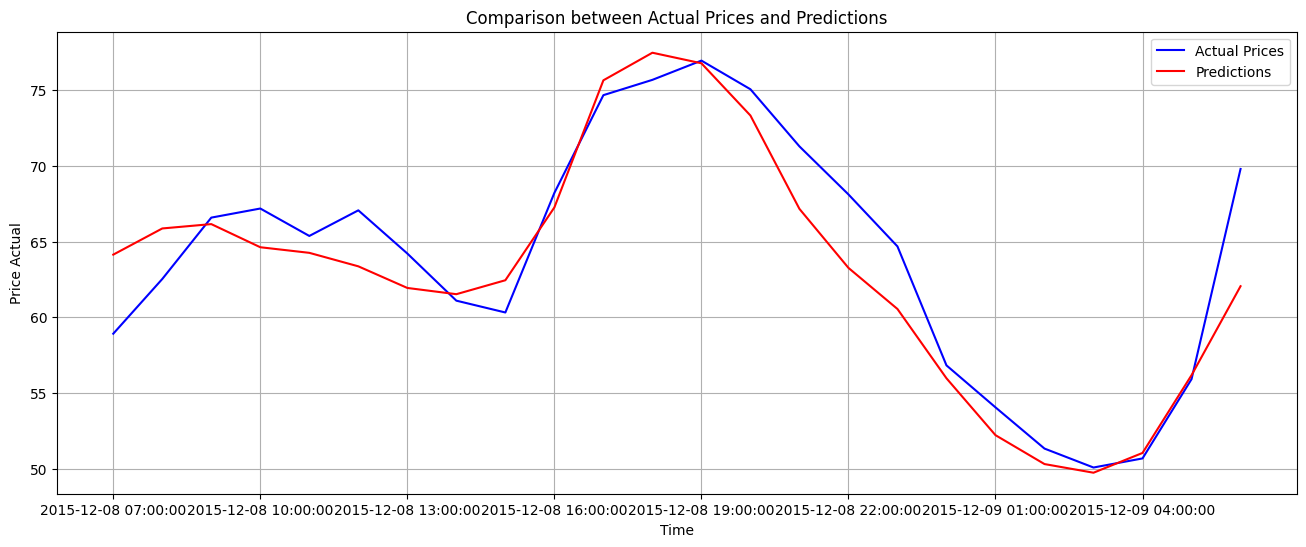

MAPE for iteration 1: 3.40%


c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\state

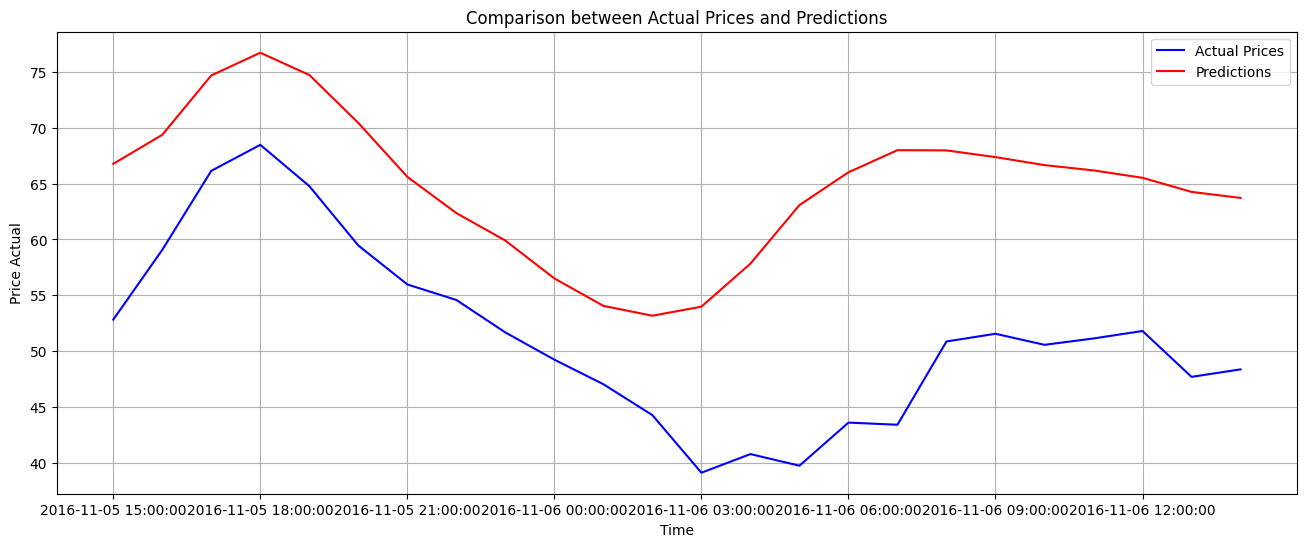

MAPE for iteration 2: 26.21%


c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\state

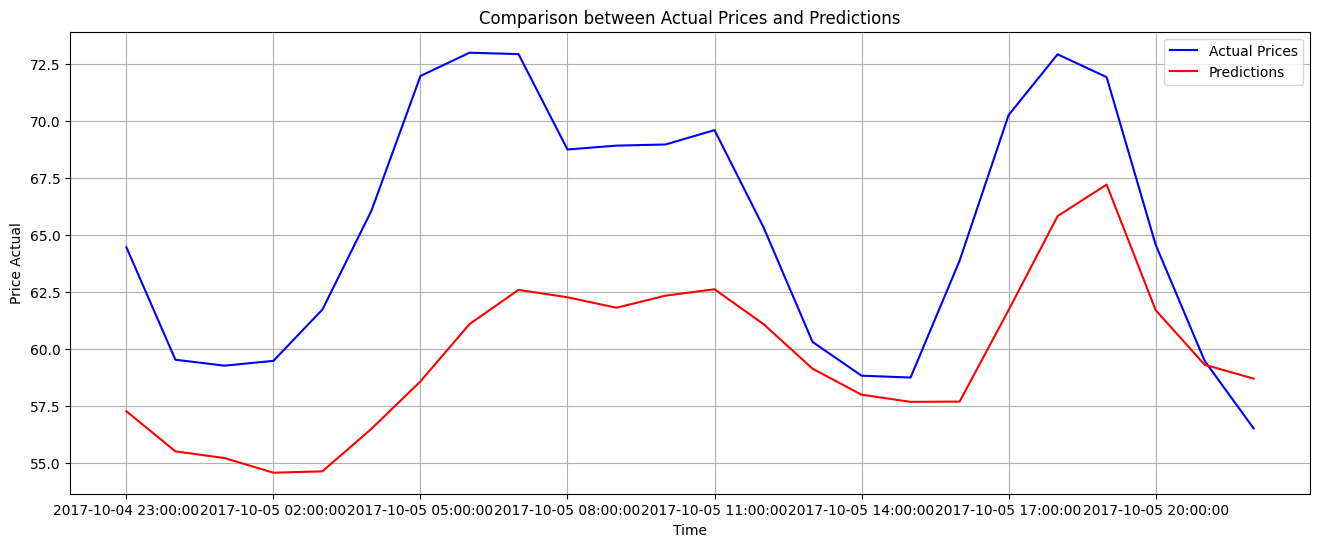

MAPE for iteration 3: 8.84%


c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\statsmodels\tsa\state

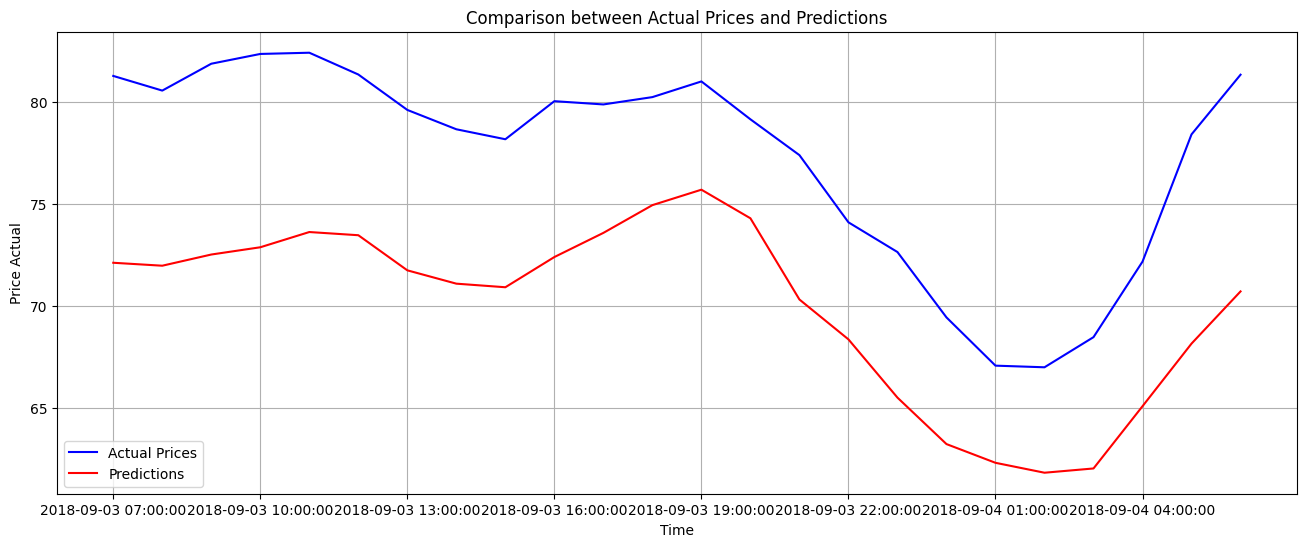

MAPE for iteration 4: 9.50%
Average MAPE: 11.99%


In [116]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Define the sliding window size
window_size = 8000

# Create empty lists to store MAPE values and predictions
mapes = []
all_predictions = []

# Iterate through the dataset with the sliding window approach
for i in range(0, len(energy_weather_label_model) - window_size, window_size):
    # Define the start and end index for the sliding window
    start_index = i
    end_index = i + window_size

    # Extract the training and testing data for the current window
    train_data = energy_weather_label_model['price actual'].iloc[start_index:end_index]

    # Fit the ARIMA model using autoarima
    model = ARIMA(train_data, order=(3, 0, 3), seasonal_order=(1, 0, 1, 24))
    model_fit = model.fit()

    # Generate predictions for the next 48 hours
    predictions = model_fit.forecast(steps=48)
    all_predictions.extend(predictions)

    # Extract the actual prices for the next 48 hours
    actual_prices = energy_weather_label_model['price actual'].iloc[end_index:end_index+48]

    # Calculate MAPE
    mape = mean_absolute_error(actual_prices[-24:], predictions[-24:]) / actual_prices[-24:].mean() * 100
    mapes.append(mape)

    # Plot the comparison between true values and predictions
    plt.figure(figsize=(16, 6))
    plt.plot(actual_prices[-24:].index, actual_prices[-24:].values, label='Actual Prices', color='blue')
    plt.plot(actual_prices[-24:].index, predictions[-24:], label='Predictions', color='red')
    plt.title('Comparison between Actual Prices and Predictions')
    plt.xlabel('Time')
    plt.ylabel('Price Actual')
    plt.legend()
    

    # Set x-axis ticks
    num_ticks = 8  # Number of ticks to show
    plt.xticks(actual_prices[-24:].index[::len(actual_prices[-24:]) // num_ticks])

    plt.show()

    # Print MAPE for the current iteration
    print(f'MAPE for iteration {i // window_size + 1}: {mape:.2f}%')

# Print the average MAPE over all iterations
print(f'Average MAPE: {sum(mapes) / len(mapes):.2f}%')


In [117]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       price actual   No. Observations:                 8000
Model:             ARIMA(3, 0, 3)x(1, 0, [1], 24)   Log Likelihood              -18442.477
Date:                            Tue, 12 Mar 2024   AIC                          36904.954
Time:                                    19:54:14   BIC                          36974.826
Sample:                                10-03-2017   HQIC                         36928.870
                                     - 09-02-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.4350      6.957      8.830      0.000      47.799      75.071
ar.L1          0.7746      0.207   

The ARIMA model seems to be very erractic on its predictions and even tough it has a lower MAPE than the benchmark, it does not generalize well. Because it only consider information regarding the price, when this is stable the ARIMA model performs well, but as soon it start seeing more variability the model is not strong enough to capture the underlying patterns of the data.

In [181]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Assuming 'price actual' is the column containing hourly electricity prices
prices_actual = energy_weather_ohe_model['price actual']

# Predict using the ARIMA model
predicted_prices = model_fit.predict(start=0, end=len(prices_actual)-1)

# Compute MAPE
def calculate_mape(actual, predicted):
    return (abs(actual - predicted) / actual).mean() * 100

mape = calculate_mape(prices_actual, predicted_prices)

print("MAPE:", mape)

MAPE: nan


In [182]:
predicted_prices

2017-10-03 23:00:00    61.434989
2017-10-04 00:00:00    55.745631
2017-10-04 01:00:00    55.647555
2017-10-04 02:00:00    55.611582
2017-10-04 03:00:00    55.652017
                         ...    
2021-10-03 18:00:00    61.453131
2021-10-03 19:00:00    61.454077
2021-10-03 20:00:00    61.452215
2021-10-03 21:00:00    61.446995
2021-10-03 22:00:00    61.444417
Freq: H, Name: predicted_mean, Length: 35064, dtype: float64

In [ ]:
import pickle

In [ ]:
# Save the trained model to a file
with open('arima_model.pickle', 'wb') as f:
    pickle.dump(model_fit, f)

## **2.2 XGboost**

Now we will try with XGBoost which is known to be very strong dealing with time series

In [201]:
energy_weather_ohe_model.to_csv('energy_weather_ohe_model.csv')

In [202]:
energy_weather_ohe_model.head()

total load forecast  total load actual_168  \
time                                                              
2014-12-31 23:00:00              26118.0                    NaN   
2015-01-01 00:00:00              24934.0                    NaN   
2015-01-01 01:00:00              23515.0                    NaN   
2015-01-01 02:00:00              22642.0                    NaN   
2015-01-01 03:00:00              21785.0                    NaN   

                     total_non_renewable_168  price actual_48  \
time                                                            
2014-12-31 23:00:00                      NaN              NaN   
2015-01-01 00:00:00                      NaN              NaN   
2015-01-01 01:00:00                      NaN              NaN   
2015-01-01 02:00:00                      NaN              NaN   
2015-01-01 03:00:00                      NaN              NaN   

                     price actual_72  price actual_168  price actual  
time                                                                  
2014-12-31 23:00:00              NaN               NaN         65.41  
2015-01-01 00:00:00              NaN               NaN         64.92  
2015-01-01 01:00:00              NaN               NaN         64.48  
2015-01-01 02:00:00              NaN               NaN         59.32  
2015-01-01 03:00:00              NaN               NaN         56.04

In [203]:
from sklearn.model_selection import TimeSeriesSplit

In [224]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*200*1, gap=24)

In [221]:
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd

# Convert the index to a DateTimeIndex if it's not already
energy_weather_ohe_model.index = pd.to_datetime(energy_weather_ohe_model.index)

# Sort the DataFrame by the datetime index to ensure correct plotting
energy_weather_ohe_model = energy_weather_ohe_model.sort_index()

The logic for training an XGBoost time series is explained below, where we take the data from the begining and test over the last part of the data set. Then we retrain the model over the train dataset + the previous trainig, so incrementally we are adding more and more data until finishing the training.

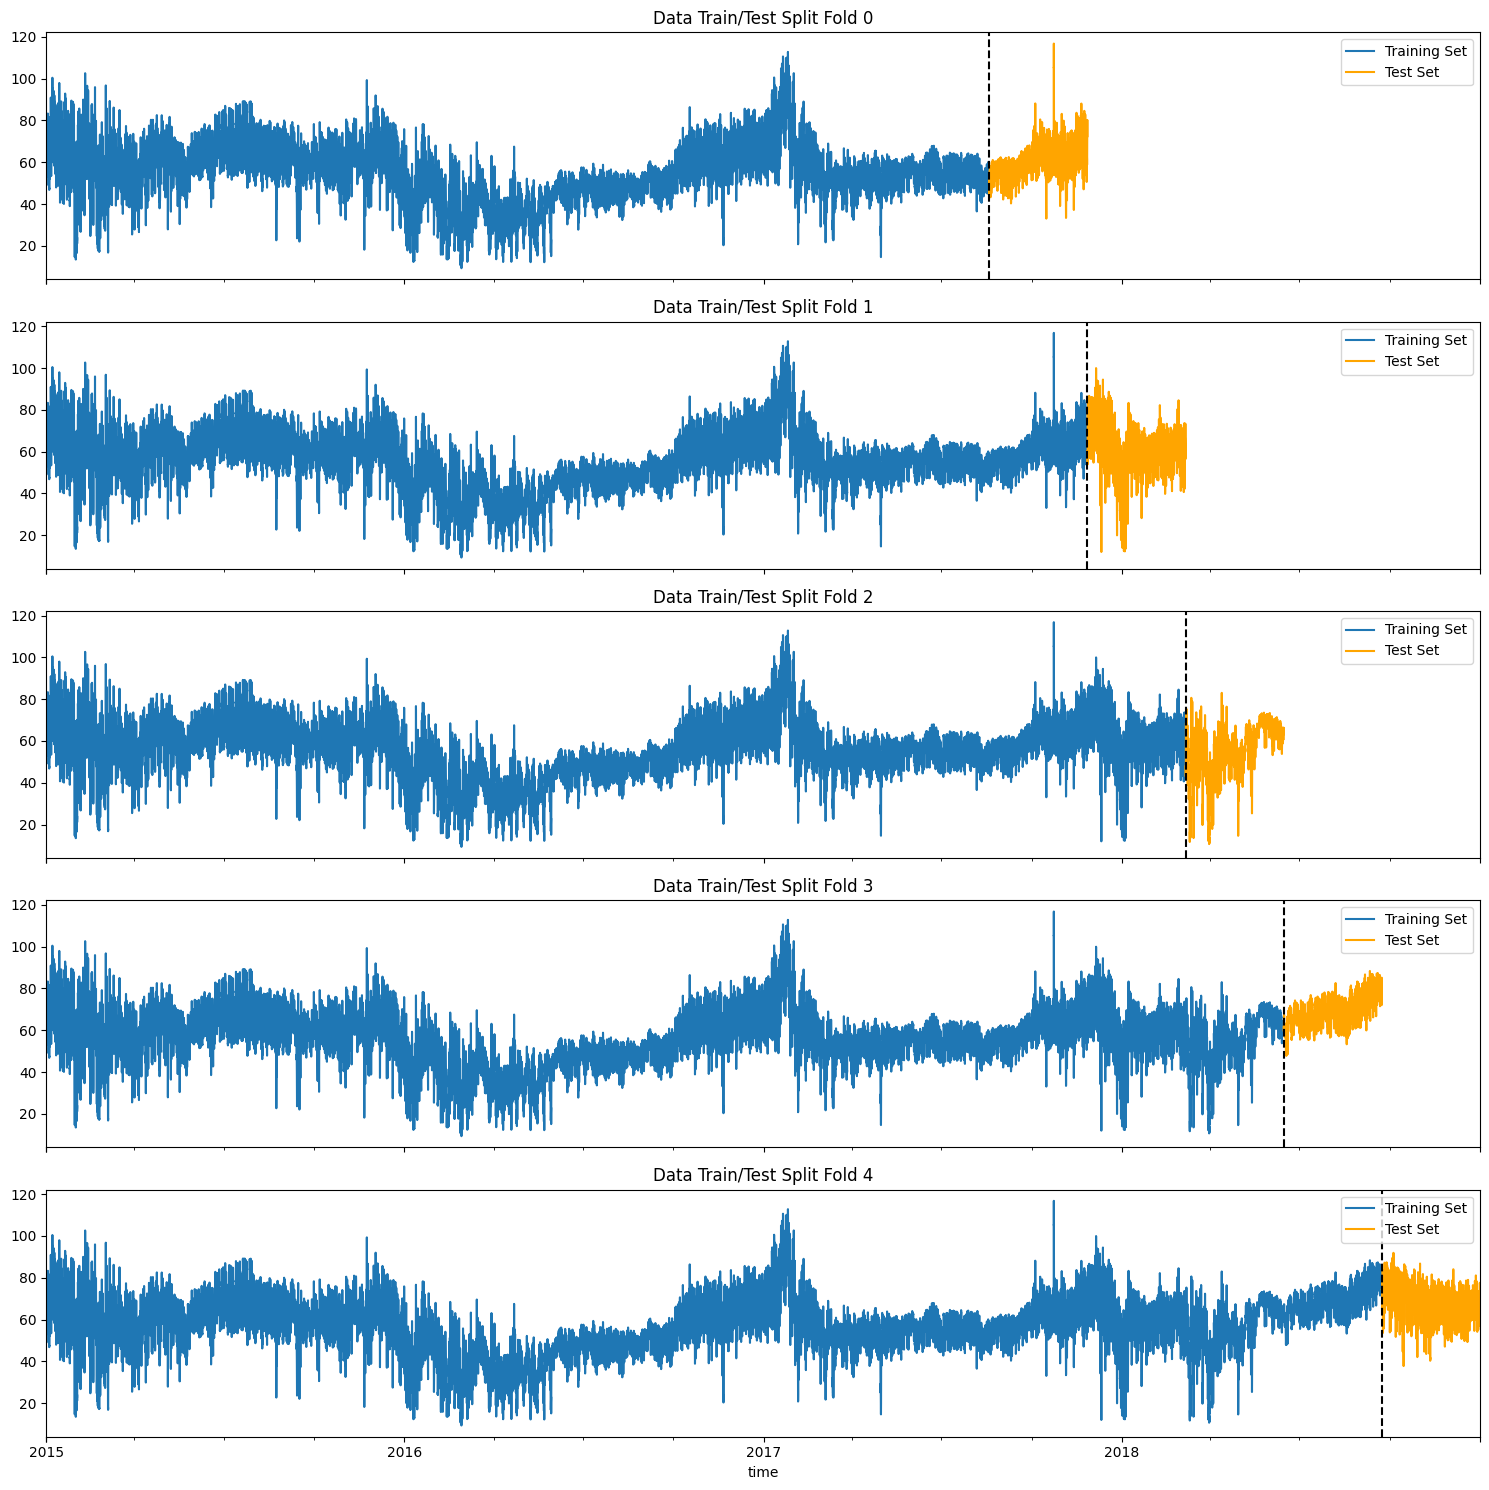

In [222]:
# Your plotting code with the modifications
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(energy_weather_ohe_model):
    train = energy_weather_ohe_model.iloc[train_idx]
    test = energy_weather_ohe_model.iloc[val_idx]
   
    # Print the min and max of each train and test set
    #print(f"Fold {fold}: Train min {train.index.min()}, max {train.index.max()}")
    #print(f"Fold {fold}: Test min {test.index.min()}, max {test.index.max()}")

    # Plot the training set
    train["price actual"].plot(ax=axs[fold], label="Training Set", title=f'Data Train/Test Split Fold {fold}')
    # Plot the test set
    test["price actual"].plot(ax=axs[fold], label="Test Set", color='orange')
    
    # Draw a vertical line where the test set begins
    axs[fold].axvline(test.index.min(), color="black", ls="--")
    fold += 1

for ax in axs:
    # This will ensure that the plot fits the data
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.legend()

plt.tight_layout()
plt.show()

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
import matplotlib.pyplot as plt

tss = TimeSeriesSplit(n_splits=5, test_size=24*100*1, gap=24)

fold = 0
preds= []
scores = []

for train_idx, val_idx in tss.split(energy_weather_ohe_model):
    train = energy_weather_ohe_model.iloc[train_idx]
    test = energy_weather_ohe_model.iloc[val_idx]
    X_train = train.drop(columns="price actual")
    y_train = train["price actual"]
    X_test = test.drop(columns="price actual")
    y_test = test["price actual"]
    model_xgb = xgb.XGBRegressor(base_score=0.5, booster="gbtree",
                         n_estimators=1000,
                         objective="reg:linear",
                         max_depth=3,
                         learning_rate=0.01)
    model_xgb.fit(X_train, y_train)
    preds.append(model_xgb.predict(X_test))
    score = mean_absolute_percentage_error(y_test, preds[-1])
    scores.append(score)
    fold+=1

print(f"Mean MAPE: {np.mean(scores)}")
print(f"Standard Deviation MAPE: {np.std(scores)}")

c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now depre

Mean MAPE: 0.056706375661802866
Standard Deviation MAPE: 0.008646671422170354


In [132]:
print(model_xgb.get_params())

{'objective': 'reg:linear', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 1000, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [140]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Define the TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5, test_size=24*10*1, gap=24)

fold = 0
preds = []
scores = []

for train_idx, val_idx in tss.split(energy_weather_ohe_model):
    # Split the data into train and validation sets
    train = energy_weather_ohe_model.iloc[train_idx]
    test = energy_weather_ohe_model.iloc[val_idx]
    X_train = train.drop(columns="price actual")
    y_train = train["price actual"]
    X_test = test.drop(columns="price actual")
    y_test = test["price actual"]
    
    # Define the parameter distribution for RandomizedSearchCV
    param_dist = {
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'alpha': np.linspace(0, 0.5, 5),  # L1 regularization parameter
        'lambda': np.linspace(0, 0.5, 5)  # L2 regularization parameter
    }
    
    # Perform RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(estimator=model_xgb,
                                       param_distributions=param_dist,
                                       scoring='neg_mean_absolute_error',
                                       cv=TimeSeriesSplit(n_splits=5),
                                       n_iter=20,
                                       random_state=42,
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    # Get the best model and its hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on the test set
    preds.append(best_model.predict(X_test))
    
    # Compute the MAPE
    score = mean_absolute_percentage_error(y_test, preds[-1])
    scores.append(score)
    
    fold += 1


c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:24:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:24:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:24:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now depre

Average MAPE: 0.06%


c:\Users\alfon\anaconda3\envs\Capstone\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:25:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [146]:
# Compute the average MAPE
avg_mape = (sum(scores) / len(scores))*100
print(f'Average MAPE: {avg_mape:.2f}%')

# Predictions for the last 24 hours of each iteration
last_preds = [pred[-24:] for pred in preds]

Average MAPE: 5.79%


In [147]:
X_all = energy_weather_ohe_model.drop(columns="price actual")
y_all = energy_weather_ohe_model["price actual"]

In [160]:
# Assuming you have your best model named 'best_model'
# Make predictions on the entire dataset
predictions_all = best_model.predict(X_all)

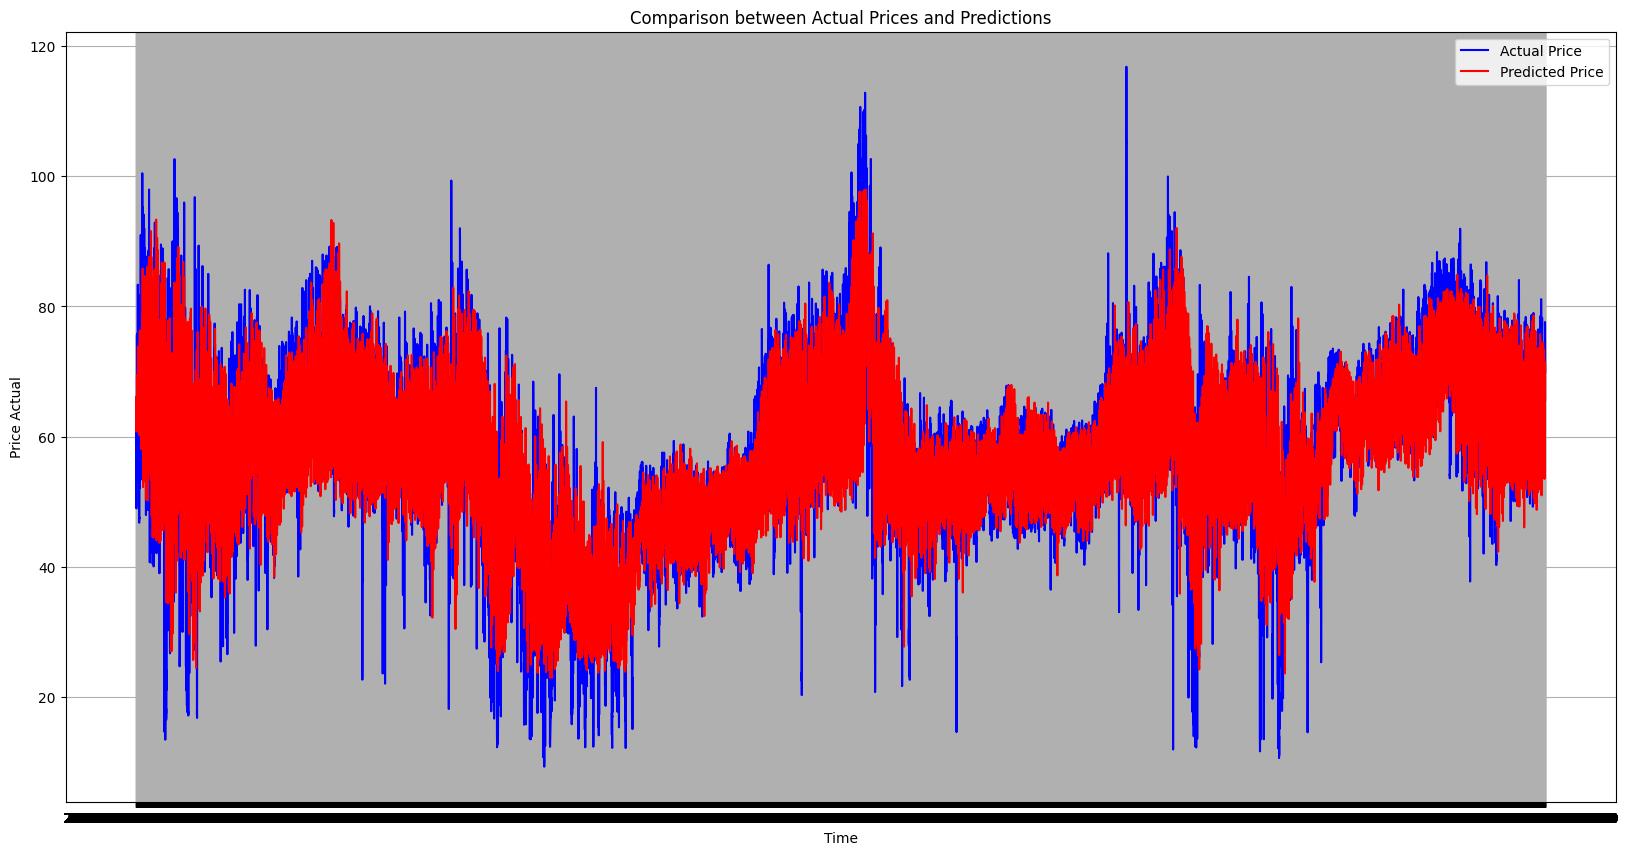

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(y_all.index, y_all.values, label='Actual Price', color='blue')
plt.plot(y_all.index, predictions_all, label='Predicted Price', color='red')
plt.title('Comparison between Actual Prices and Predictions')
plt.xlabel('Time')
plt.ylabel('Price Actual')
plt.legend()
plt.grid(True)
plt.show()

Let's analyze a few plots to see how the XGBoost model performs. Ploting 20 random charts we can see that the model performs pretty well, but sometimes its MAPE goes super high (ie. when the price has abrupt changes and reaches values such as 20 eur/MWh)

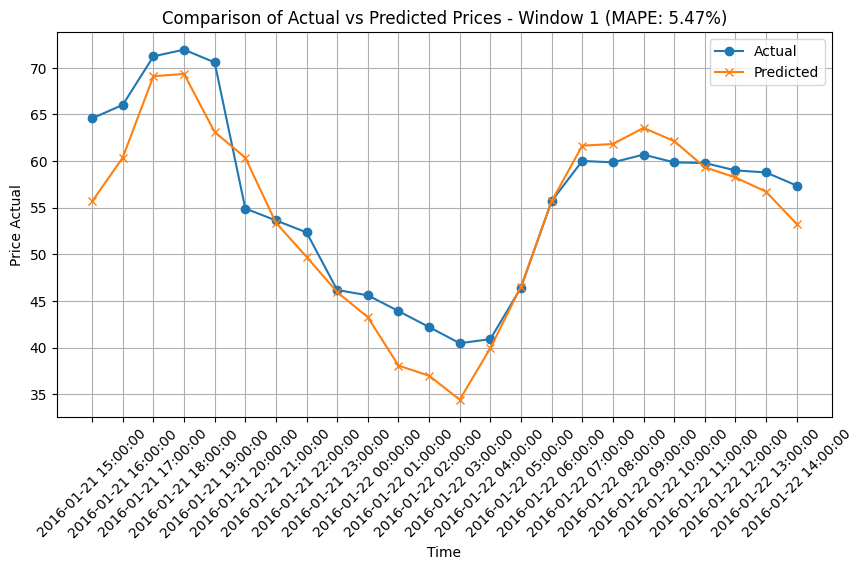

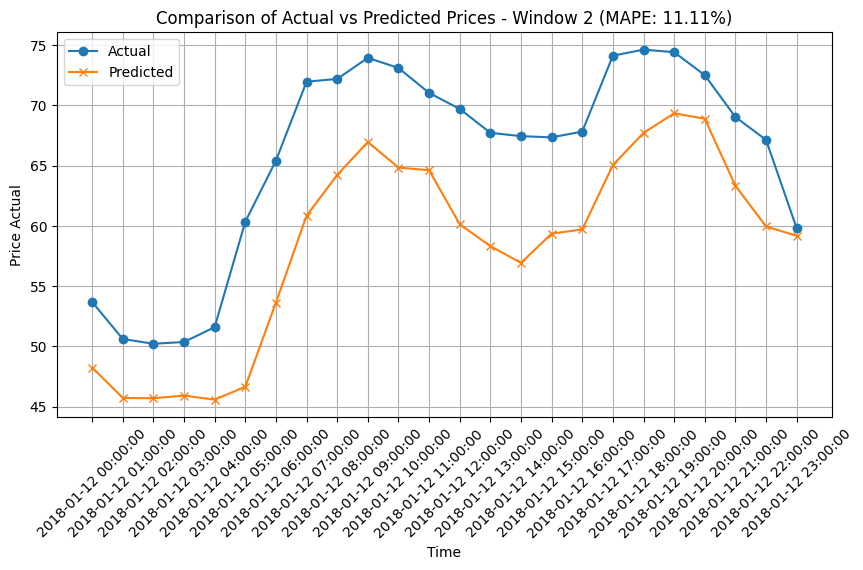

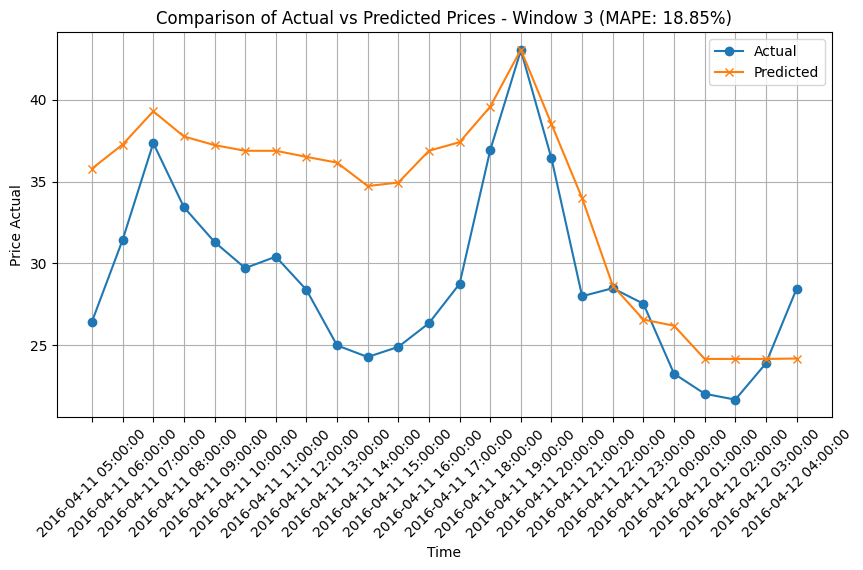

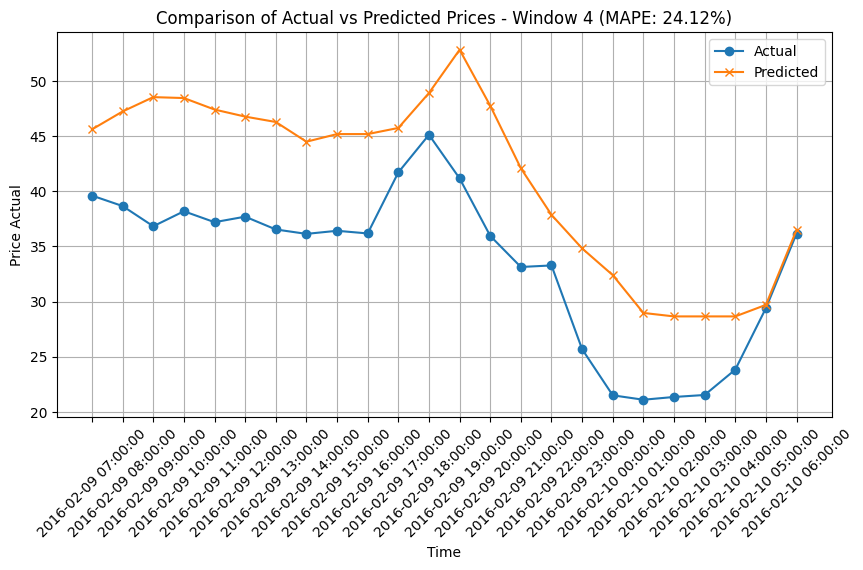

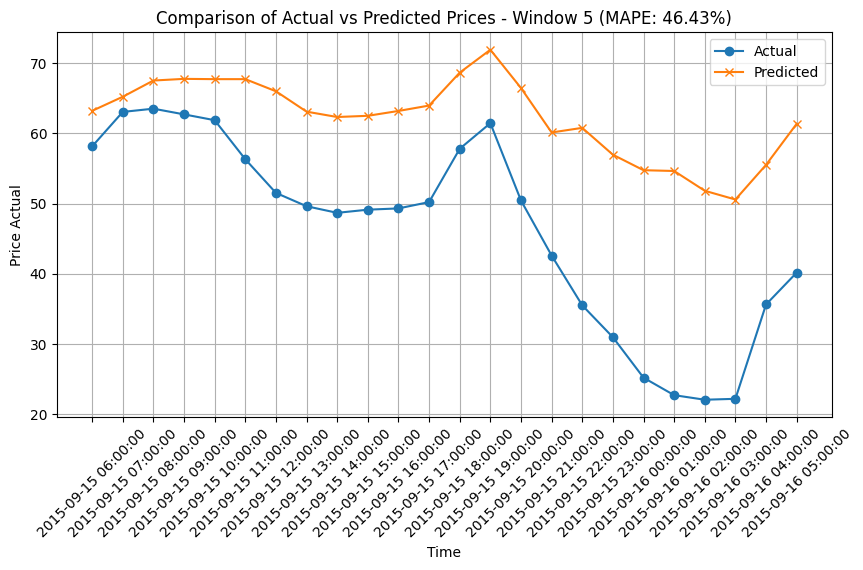

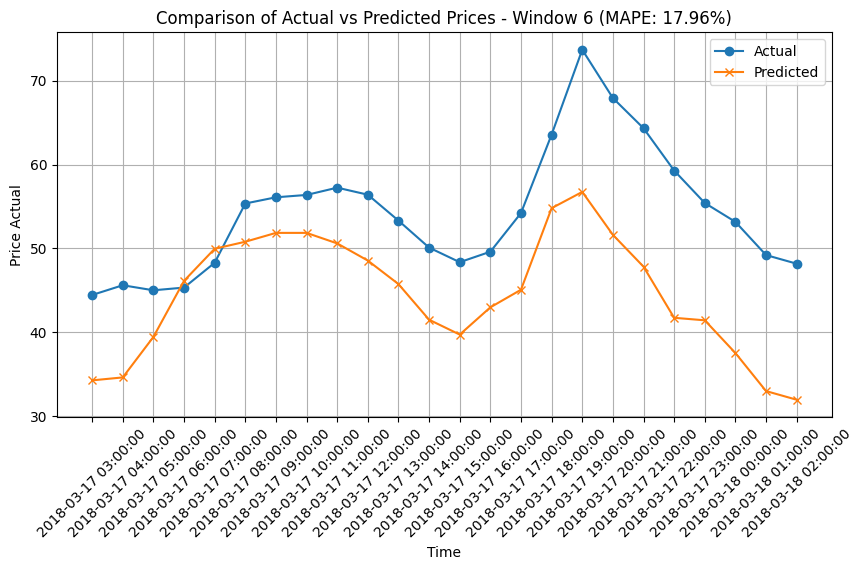

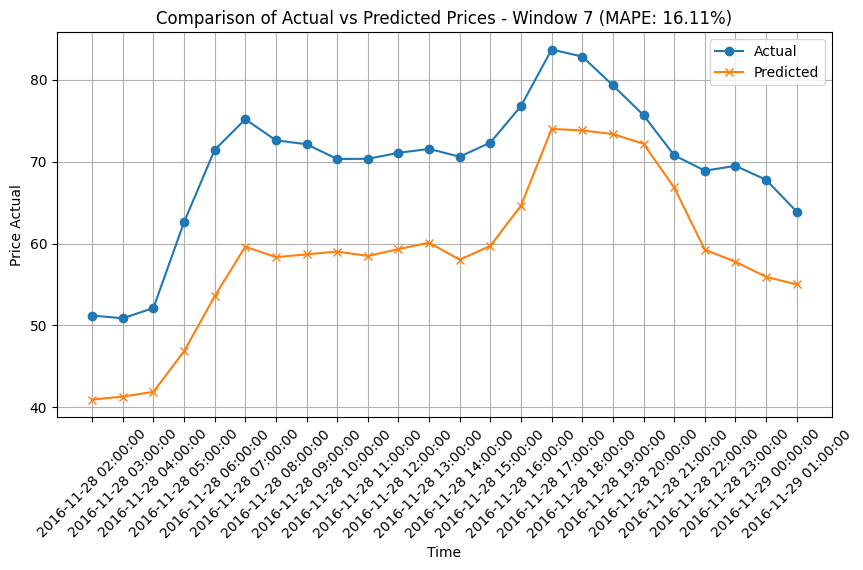

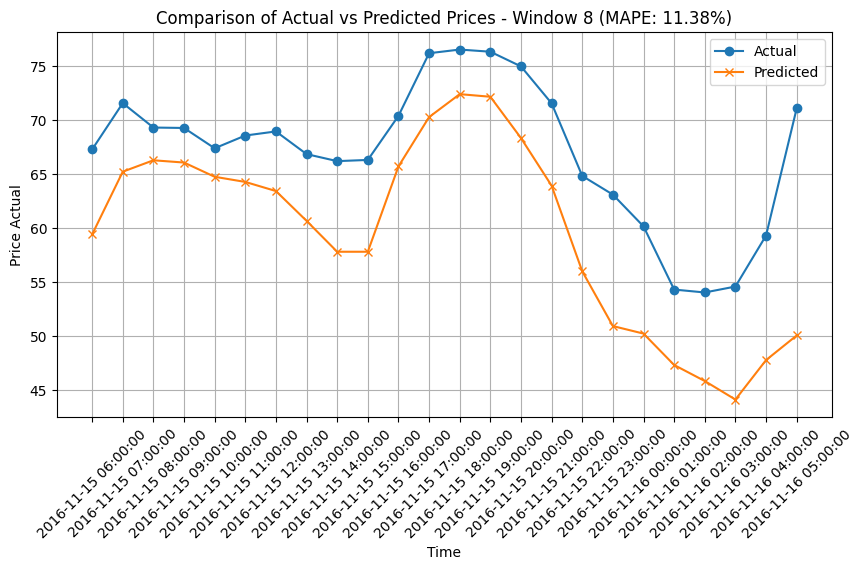

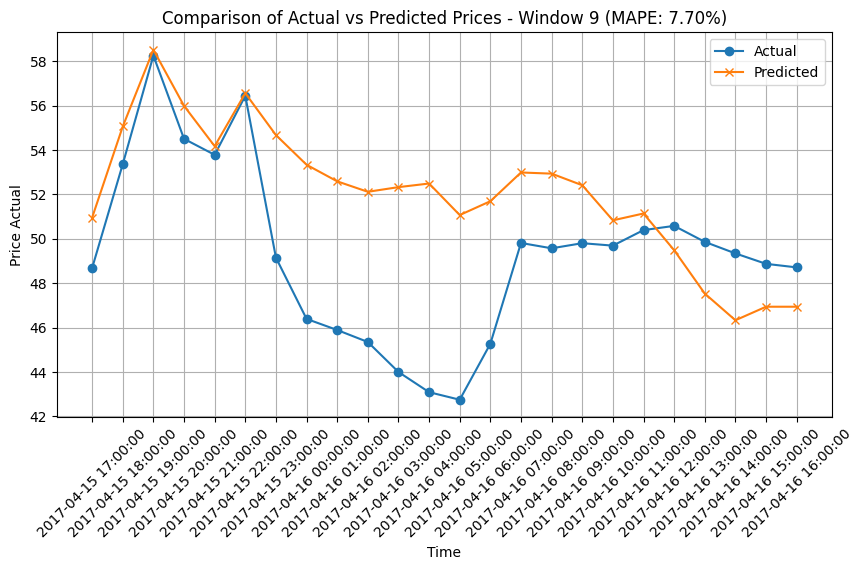

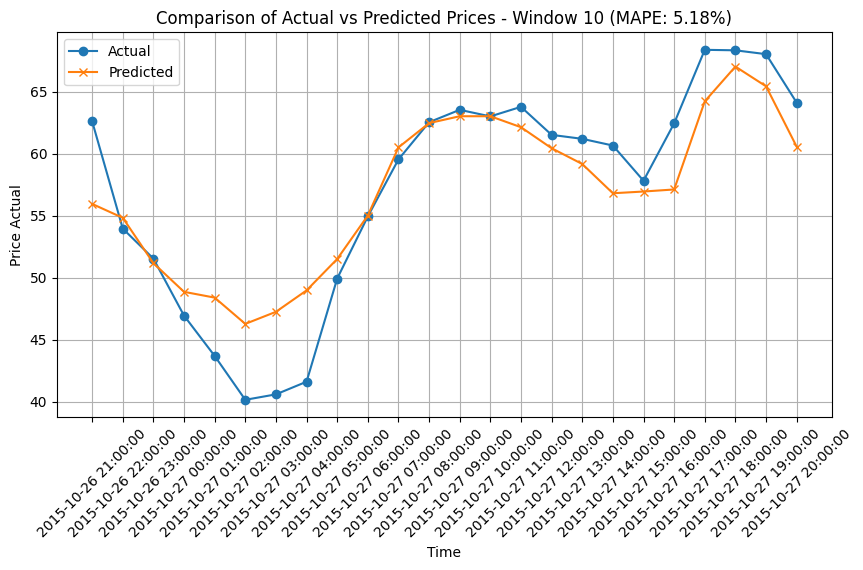

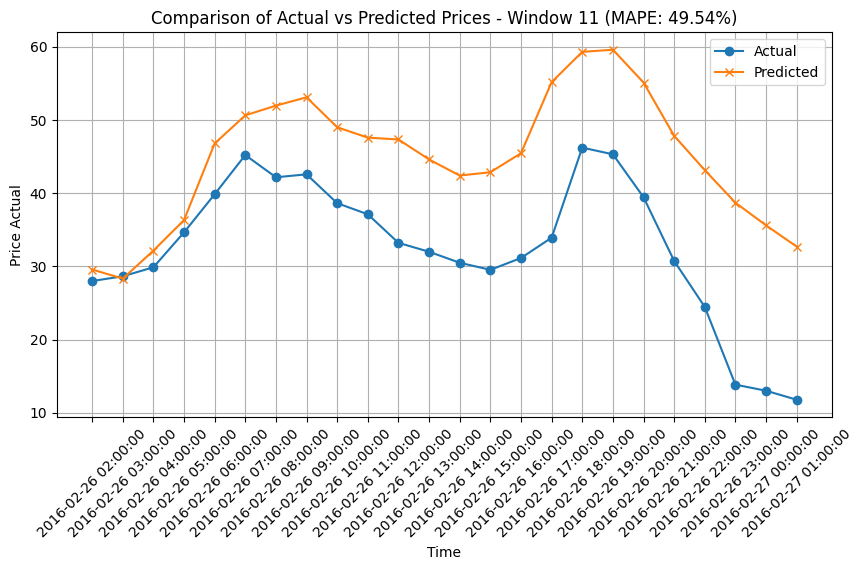

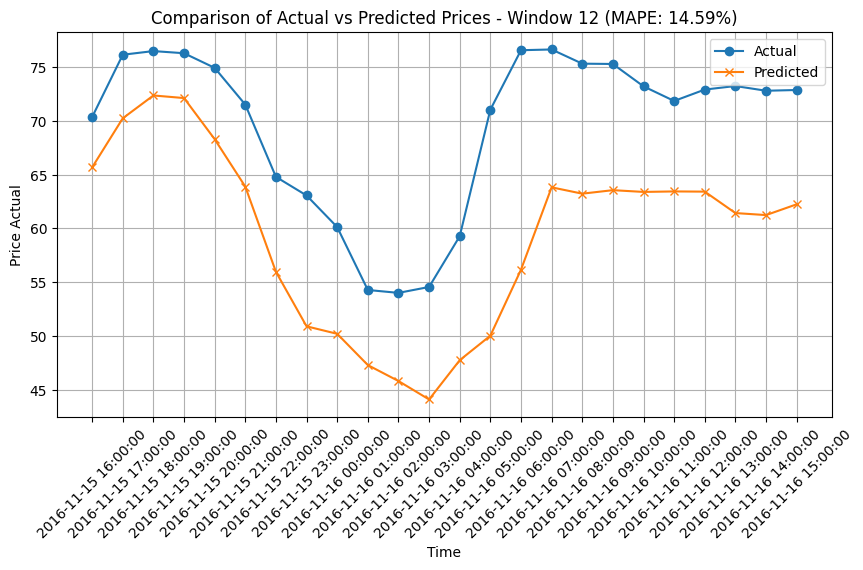

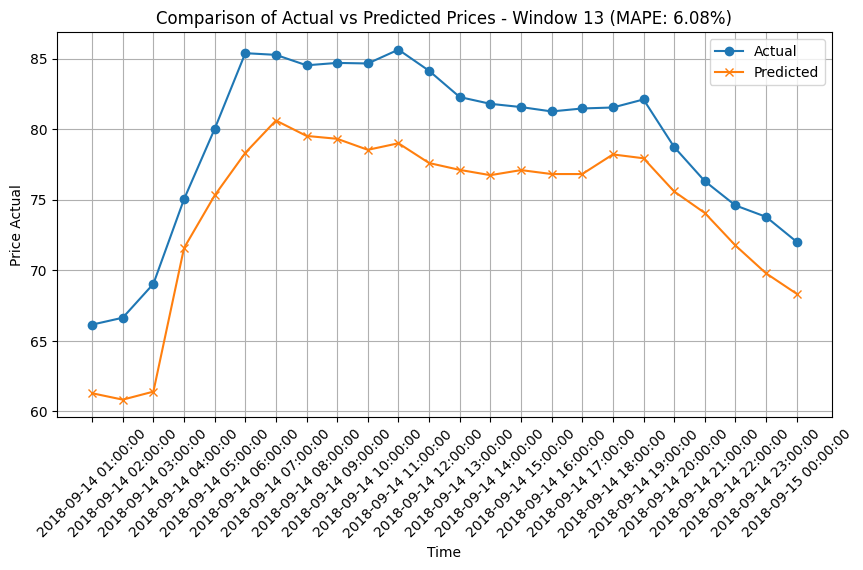

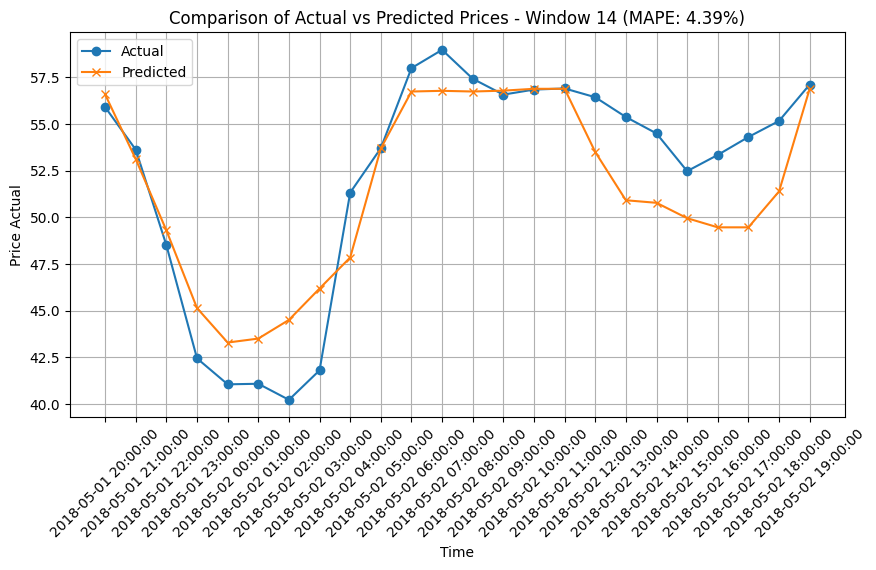

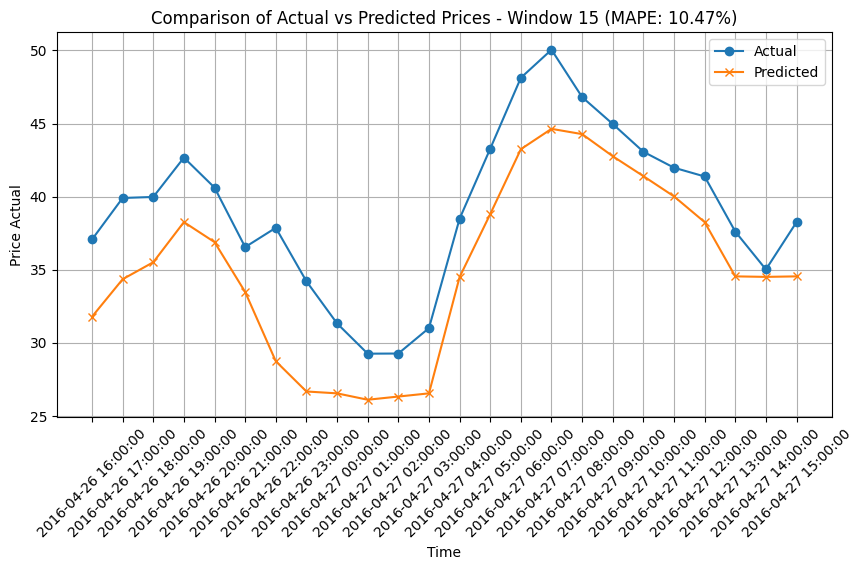

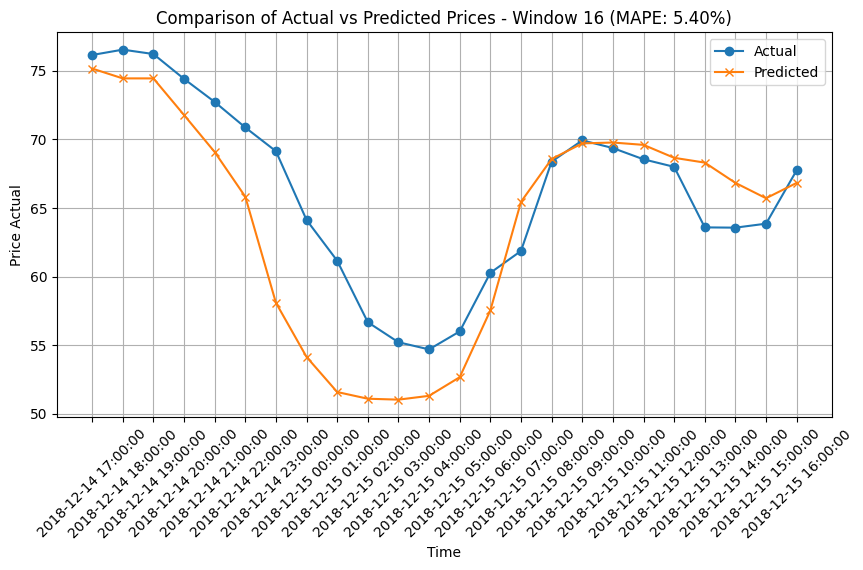

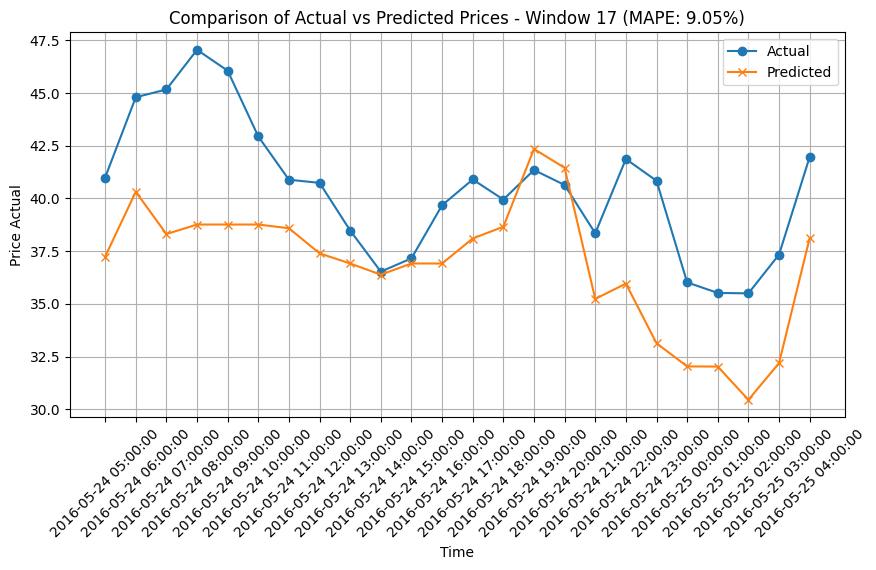

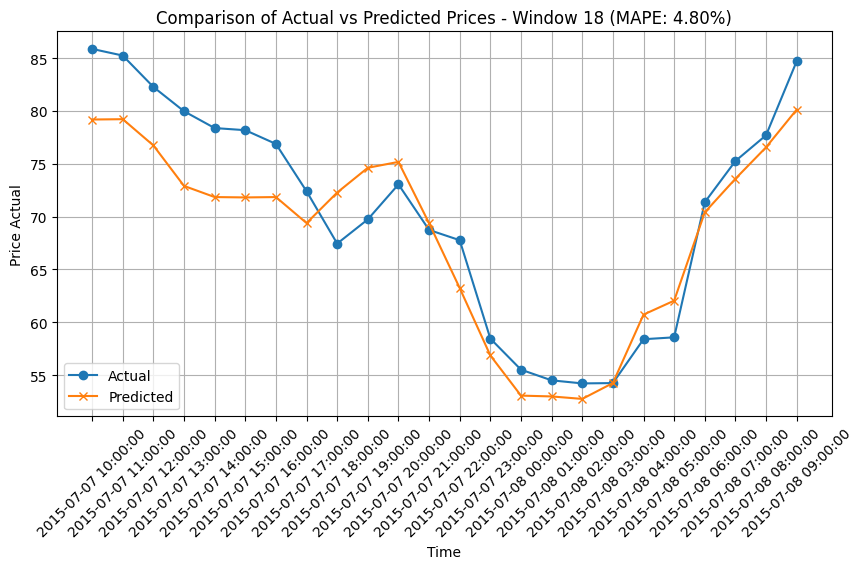

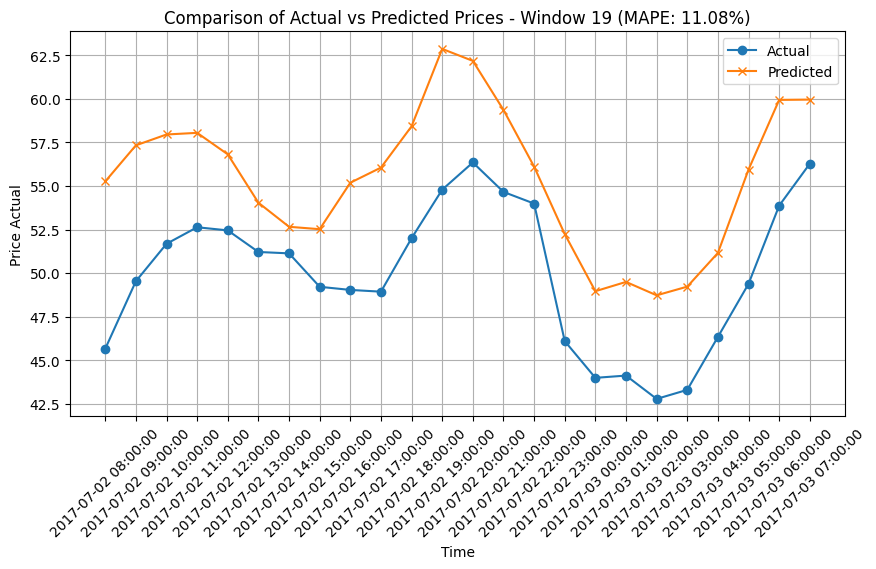

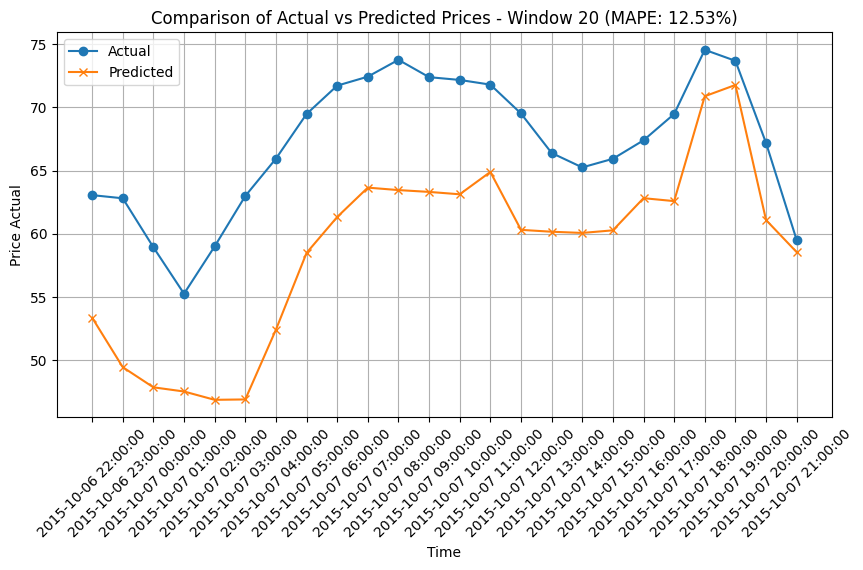

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of plots
num_plots = 20

# Define the window size
window_size = 24

# Generate random indices for 5 different sets of 24 points
np.random.seed(23)  # For reproducibility
random_indices = [np.random.randint(0, len(energy_weather_ohe_model) - window_size) for _ in range(num_plots)]

# Initialize list to store MAPE values for each window
mape_values = []

# Generate plots
for i, start_idx in enumerate(random_indices):
    end_idx = start_idx + window_size
    X_window = energy_weather_ohe_model.drop(columns="price actual").iloc[start_idx:end_idx]
    y_actual = energy_weather_ohe_model["price actual"].iloc[start_idx:end_idx]
    y_pred = best_model.predict(X_window)
    
    # Calculate MAPE for the window
    mape_window = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
    mape_values.append(mape_window)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(y_actual.index, y_actual, label='Actual', marker='o')
    plt.plot(y_actual.index, y_pred, label='Predicted', marker='x')
    plt.title(f'Comparison of Actual vs Predicted Prices - Window {i+1} (MAPE: {mape_window:.2f}%)')
    plt.xlabel('Time')
    plt.ylabel('Price Actual')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


In [168]:
import pickle
# Save the trained model to a file
with open('xgboost_model_final.pickle', 'wb') as f:
    pickle.dump(best_model, f)

## **2.3 Recurrent Neural Net (RNN)**

To acces the trainning of the RNN acces the other notebook in the repository
